In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ROOT import TVector3, TLorentzVector
import math, os

topos = ['LL', 'DD', 'None']
caloVars = [#'calog_CaloHypo_HypoE'
#,'calog_CaloHypo_HypoEt'
#,'calog_CaloHypo_HypoPrsE'
#,'calog_CaloHypo_HypoPrsM'
#,'calog_CaloHypo_HypoSpdM'
#,'calog_CaloHypo_ClusterE'
#,'calog_CaloHypo_E1'
#,'calog_CaloHypo_E9'
#,'calog_CaloHypo_E19'
#,'calog_CaloHypo_E1Hypo'
#,'calog_CaloHypo_E4'
#,'calog_CaloHypo_E49'
#,'calog_CaloHypo_CellID'
#,'calog_CaloHypo_Hcal2Ecal'
#,'calog_CaloHypo_ClusterMatch'
#,'calog_CaloHypo_NeutralID'
#,'calog_CaloHypo_Spread'
#,'calog_CaloHypo_PrsE19'
#,'calog_CaloHypo_PrsE49'
#,'calog_CaloHypo_PrsE4Max'
#,'calog_CaloHypo_PrsE1'
#,'calog_CaloHypo_PrsE2'
#,'calog_CaloHypo_PrsE3'
#,'calog_CaloHypo_PrsE4'
#,'calog_CaloHypo_PrsE5'
#,'calog_CaloHypo_PrsE6'
#,'calog_CaloHypo_PrsE7'
#,'calog_CaloHypo_PrsE8'
#,'calog_CaloHypo_PrsE9'
#,'calog_CaloHypo_isPhoton'
#,'calog_CaloHypo_isPhoton_Ecl'
#,'calog_CaloHypo_isPhoton_Fr2'
#,'calog_CaloHypo_isPhoton_Fr2r4'
#,'calog_CaloHypo_isPhoton_Asym'
#,'calog_CaloHypo_isPhoton_Kappa'
#,'calog_CaloHypo_isPhoton_Eseed'
#,'calog_CaloHypo_isPhoton_E2'
#,'calog_CaloHypo_isPhoton_PrsFr2'
#,'calog_CaloHypo_isPhoton_PrsAsym'
#,'calog_CaloHypo_isPhoton_PrsM'
#,'calog_CaloHypo_isPhoton_PrsM15'
#,'calog_CaloHypo_isPhoton_PrsM30'
#,'calog_CaloHypo_isPhoton_PrsM45'
#,'calog_CaloHypo_isPhoton_PrsEmax'
#,'calog_CaloHypo_isPhoton_PrsE2'
#,'calog_CaloHypo_isNotH'
#,'calog_CaloHypo_isNotE'
#,'calog_CaloHypo_ClusterCode'
#,'calog_CaloHypo_ClusterFrac'
'calog_PT'
,'calog_Converted'
,'calog_Prs'
,'calog_CL'
,'calog_ShowerShape'
,'calog_LOKI_BremPIDe'
,'calog_LOKI_CaloBremChi2'
,'calog_LOKI_CaloBremMatch'
,'calog_LOKI_CaloClusChi2'
,'calog_LOKI_CaloClusterCode'
,'calog_LOKI_CaloClusterFrac'
,'calog_LOKI_CaloDepositID'
,'calog_LOKI_CaloEcalChi2'
,'calog_LOKI_CaloEcalE'
,'calog_LOKI_CaloHcalE'
,'calog_LOKI_CaloNeutralE49'
,'calog_LOKI_CaloNeutralEcal'
,'calog_LOKI_CaloNeutralHcal2Ecal'
,'calog_LOKI_CaloNeutralID'
,'calog_LOKI_CaloNeutralPrs'
,'calog_LOKI_CaloNeutralPrsM'
,'calog_LOKI_CaloNeutralSpd'
,'calog_LOKI_CaloPrsE'
,'calog_LOKI_CaloPrsM'
,'calog_LOKI_CaloPrsM15'
,'calog_LOKI_CaloPrsM30'
,'calog_LOKI_CaloPrsM45'
,'calog_LOKI_CaloPrsShapeAsym'
,'calog_LOKI_CaloPrsShapeE2'
,'calog_LOKI_CaloPrsShapeEmax'
,'calog_LOKI_CaloPrsShapeFr2'
,'calog_LOKI_CaloShapeAsym'
,'calog_LOKI_CaloShapeE1'
,'calog_LOKI_CaloShapeE2'
,'calog_LOKI_CaloShapeFr2r4'
,'calog_LOKI_CaloShapeKappa'
,'calog_LOKI_CaloSpdE'
,'calog_LOKI_CaloTrMatch'
,'calog_LOKI_ClusterMass'
,'calog_LOKI_CombDLLe'
,'calog_LOKI_CombDLLk'
,'calog_LOKI_CombDLLmu'
,'calog_LOKI_CombDLLp'
,'calog_LOKI_CombDLLpi'
,'calog_LOKI_EcalPIDe'
,'calog_LOKI_EcalPIDmu'
,'calog_LOKI_HcalPIDe'
,'calog_LOKI_HcalPIDmu'
,'calog_LOKI_IsNotE'
,'calog_LOKI_IsNotH'
,'calog_LOKI_IsPhoton'
,'calog_LOKI_PrsPIDe'
,'calog_LOKI_ShowerShape'
]
convVars=[
'photon_conv_P'
,'photon_conv_PT'
,'photon_conv_MM'
,'photon_conv_MMERR'
,'photon_conv_M'
,'photon_conv_LOKI_BPVIP'
,'photon_conv_LOKI_BPVIPCHI2'
,'photon_conv_LOKI_DIRA'
,'photon_conv_LOKI_ENDVERTEX_CHI2DOF'
,'photon_conv_LOKI_FD'
,'pos_P'
,'pos_PT'
,'pos_M'
,'pos_ID'
,'pos_PIDe'
,'pos_PIDmu'
,'pos_PIDK'
,'pos_PIDp'
,'pos_ProbNNe'
,'pos_ProbNNk'
,'pos_ProbNNp'
,'pos_ProbNNpi'
,'pos_ProbNNmu'
,'pos_ProbNNghost'
,'pos_TRACK_Type'
,'pos_TRACK_Key'
,'pos_TRACK_CHI2NDOF'
,'pos_TRACK_MatchCHI2'
,'pos_TRACK_GhostProb'
,'pos_LOKI_BremPIDe'
,'pos_LOKI_CaloBremChi2'
,'pos_LOKI_CaloBremMatch'
,'pos_LOKI_CaloClusChi2'
,'pos_LOKI_CaloClusterCode'
,'pos_LOKI_CaloClusterFrac'
,'pos_LOKI_CaloDepositID'
,'pos_LOKI_CaloEcalChi2'
,'pos_LOKI_CaloEcalE'
,'pos_LOKI_CaloHcalE'
,'pos_LOKI_CaloNeutralE49'
,'pos_LOKI_CaloNeutralEcal'
,'pos_LOKI_CaloNeutralHcal2Ecal'
,'pos_LOKI_CaloNeutralID'
,'pos_LOKI_CaloNeutralPrs'
,'pos_LOKI_CaloNeutralPrsM'
,'pos_LOKI_CaloNeutralSpd'
,'pos_LOKI_CaloPrsE'
,'pos_LOKI_CaloPrsM'
,'pos_LOKI_CaloPrsM15'
,'pos_LOKI_CaloPrsM30'
,'pos_LOKI_CaloPrsM45'
,'pos_LOKI_CaloPrsShapeAsym'
,'pos_LOKI_CaloPrsShapeE2'
,'pos_LOKI_CaloPrsShapeEmax'
,'pos_LOKI_CaloPrsShapeFr2'
,'pos_LOKI_CaloShapeAsym'
,'pos_LOKI_CaloShapeE1'
,'pos_LOKI_CaloShapeE2'
,'pos_LOKI_CaloShapeFr2r4'
,'pos_LOKI_CaloShapeKappa'
,'pos_LOKI_CaloSpdE'
,'pos_LOKI_CaloTrMatch'
,'pos_LOKI_ClusterMass'
,'pos_LOKI_CombDLLe'
,'pos_LOKI_CombDLLk'
,'pos_LOKI_CombDLLmu'
,'pos_LOKI_CombDLLp'
,'pos_LOKI_CombDLLpi'
,'pos_LOKI_EcalPIDe'
,'pos_LOKI_EcalPIDmu'
,'pos_LOKI_HcalPIDe'
,'pos_LOKI_HcalPIDmu'
,'pos_LOKI_IsNotE'
,'pos_LOKI_IsNotH'
,'pos_LOKI_IsPhoton'
,'pos_LOKI_PrsPIDe'
,'pos_LOKI_ShowerShape'
]

In [11]:
# Get our data
dsets = []
dsets_mc = []
dataLoc = '/Users/sbenson/Documents/BsGammaGamma'
for t in topos:
    dsets.append(pd.read_hdf(dataLoc+'/'+'Data_%s_16_9.h5' % t))
    dsets_mc.append(pd.read_hdf(dataLoc+'/'+'Data_%s_16_MC.h5' % t))
for n, t in enumerate(topos):
    cols = list(dsets[n])
    dsets[n] = dsets[n].reindex(columns=cols)
    dsets_mc[n] = dsets_mc[n].reindex(columns=cols)

In [3]:
def prepPlot(_ax, xtitle, ytitle):
    _ax.grid(False)
    _ax.set_xlabel(xtitle)
    _ax.set_ylabel(ytitle)
    _ax.set_title("")

/Users/sbenson/anaconda3/envs/testenv/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


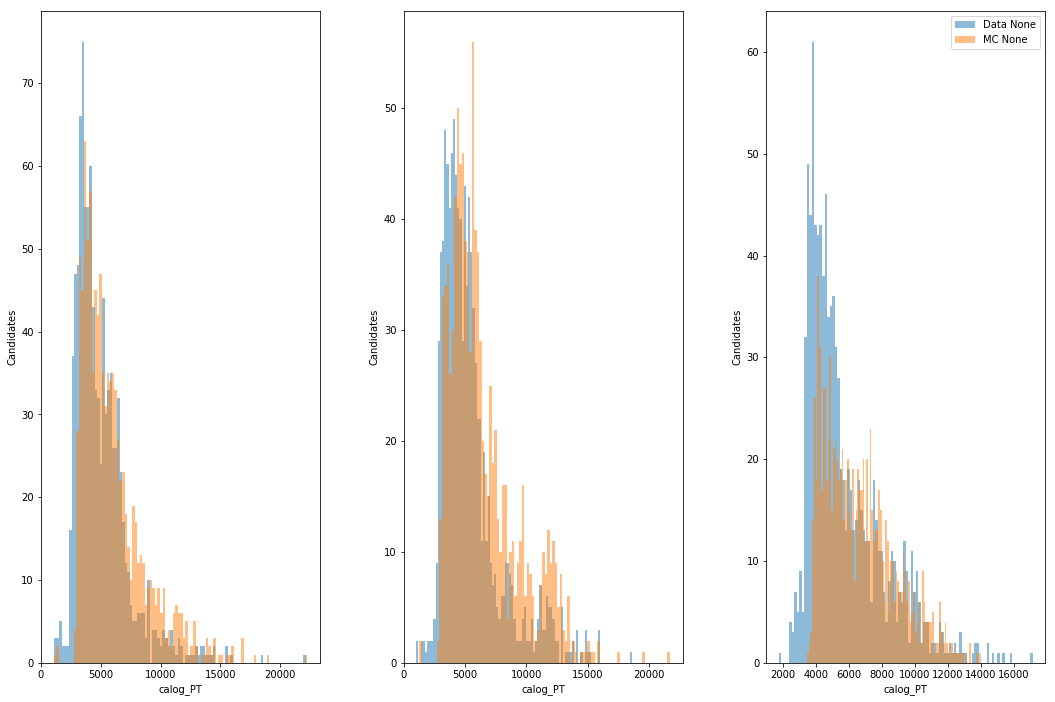

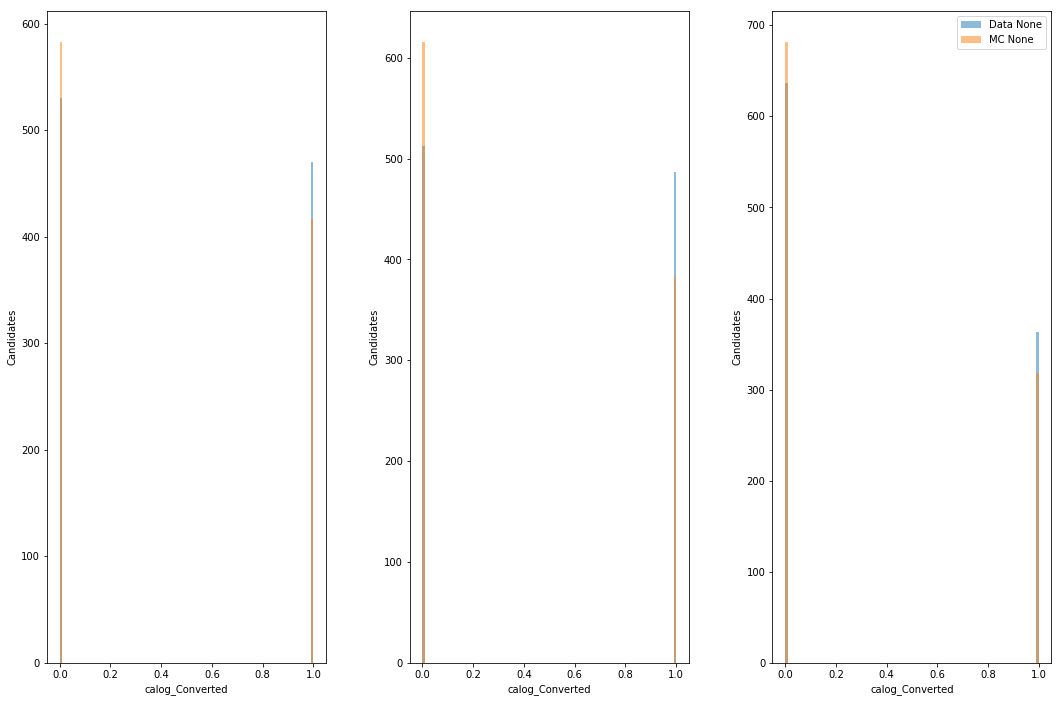

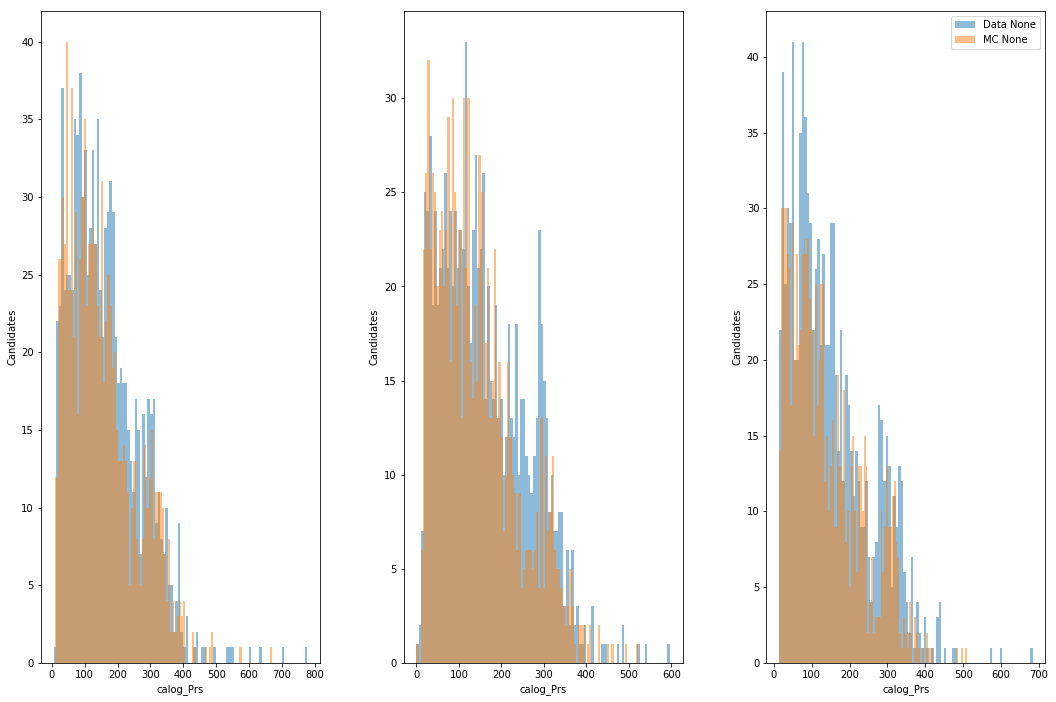

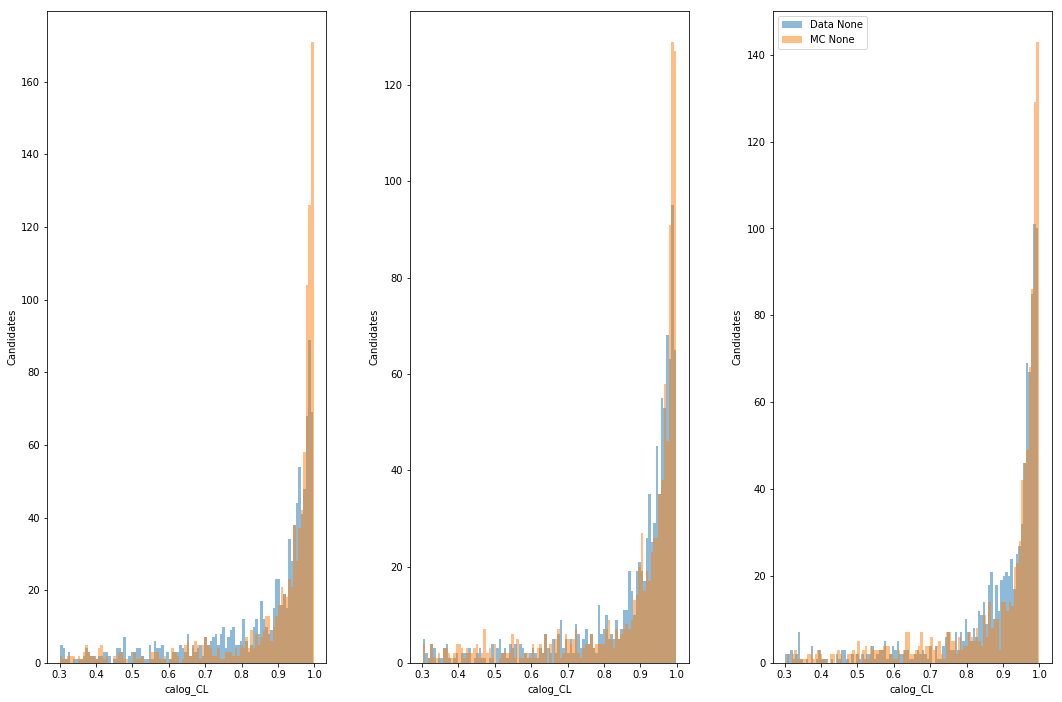

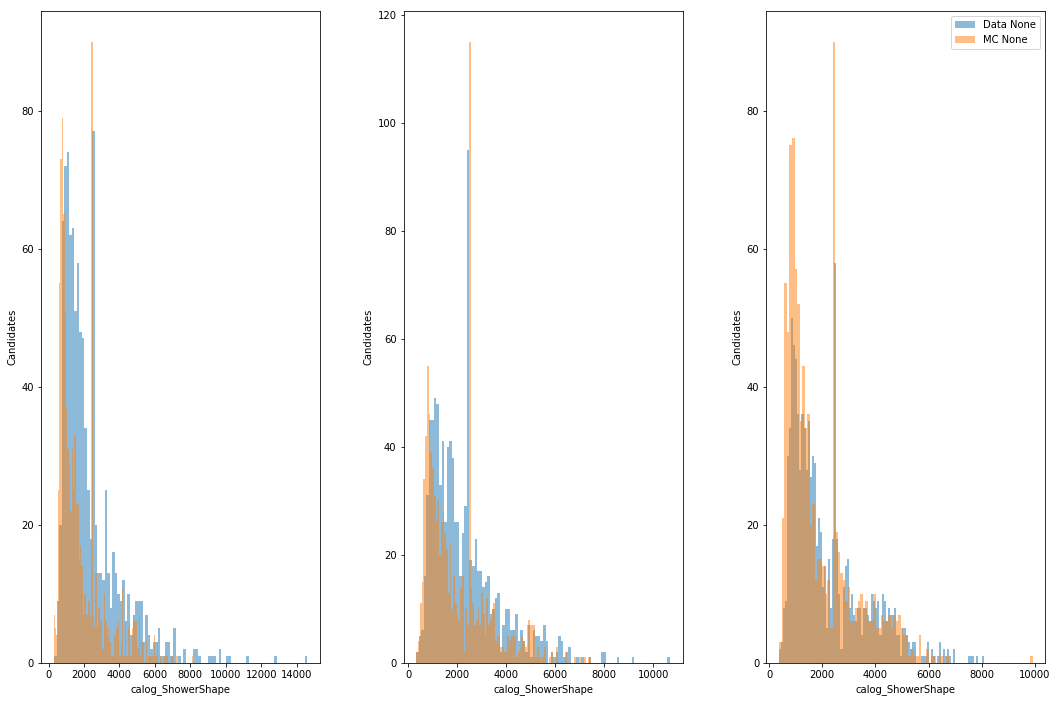

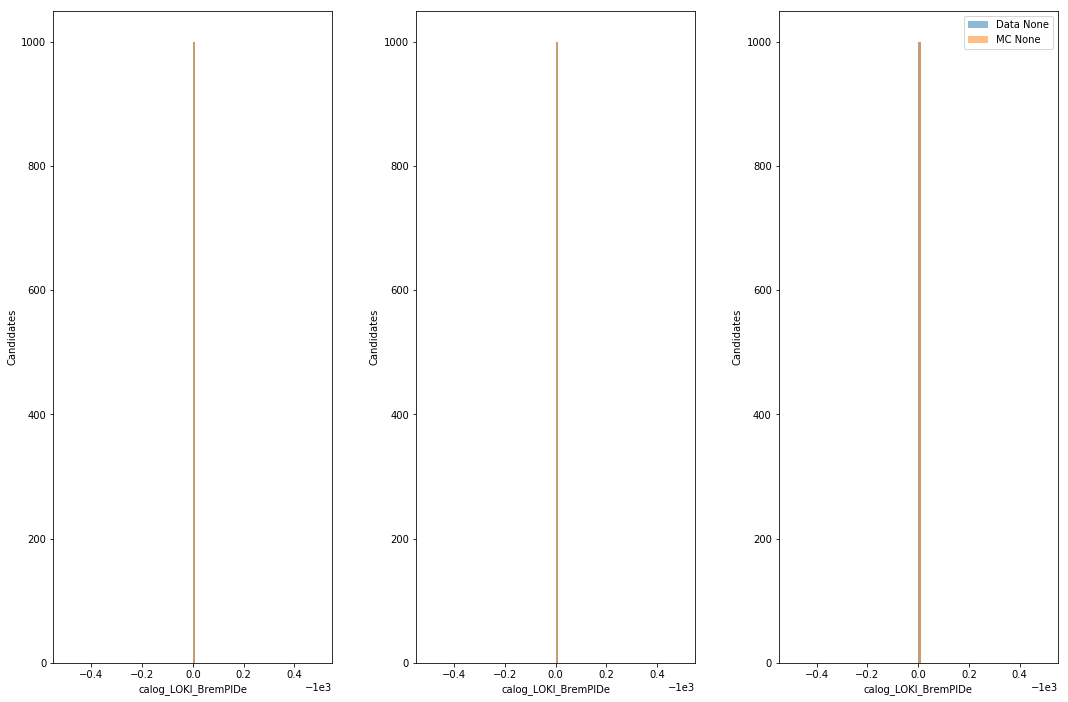

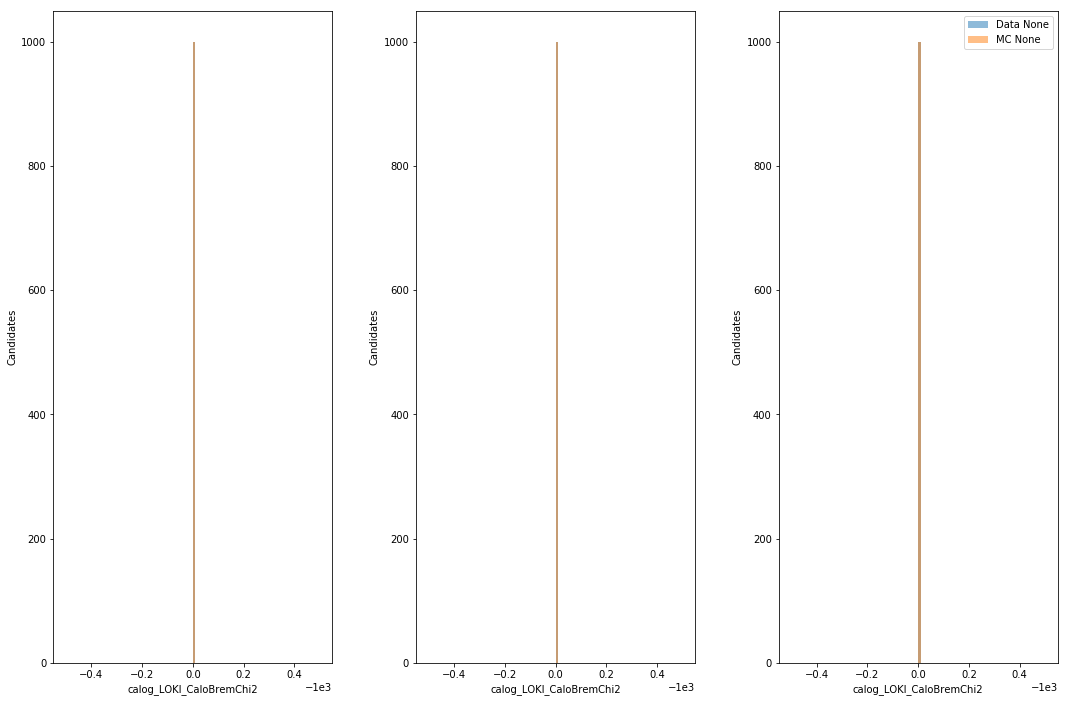

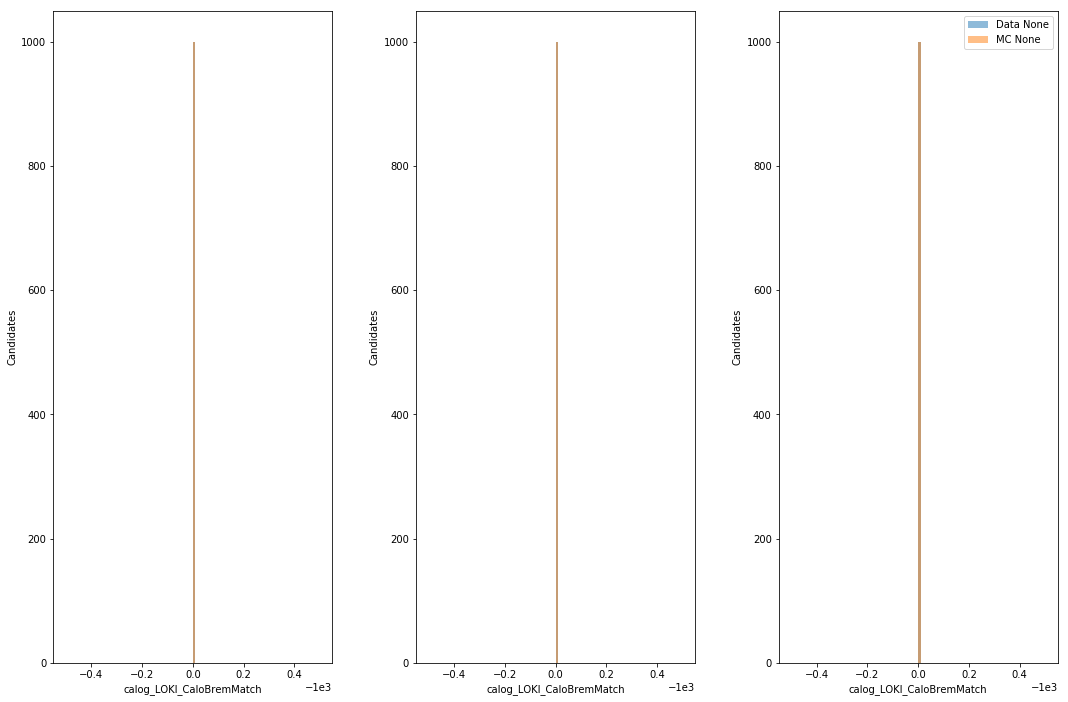

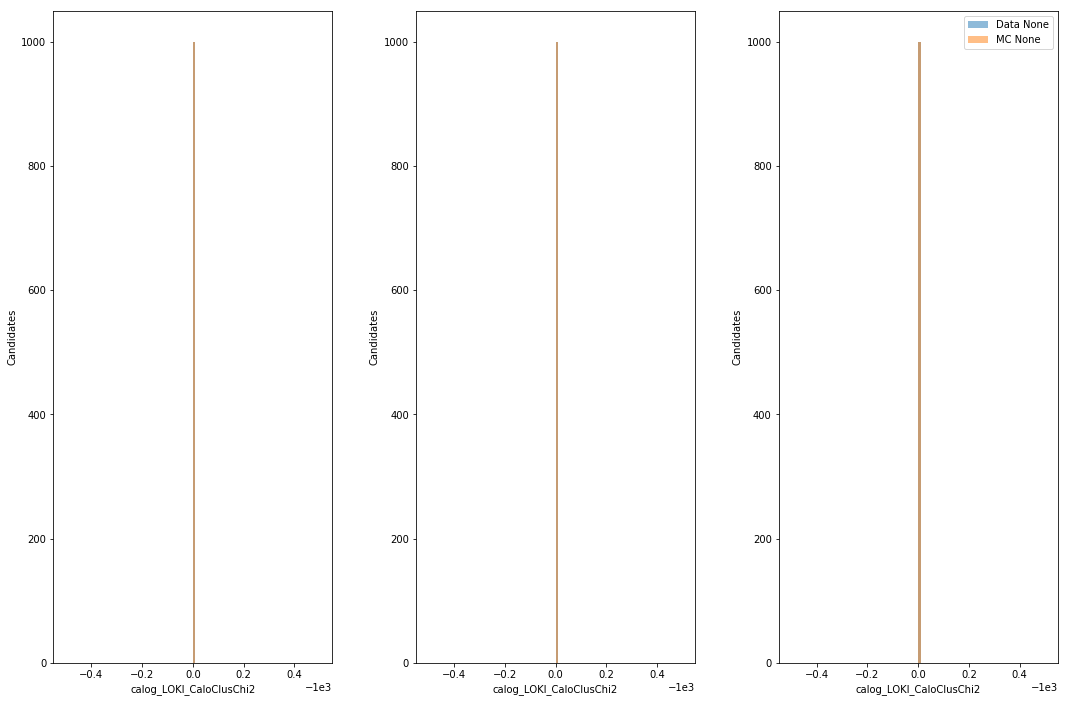

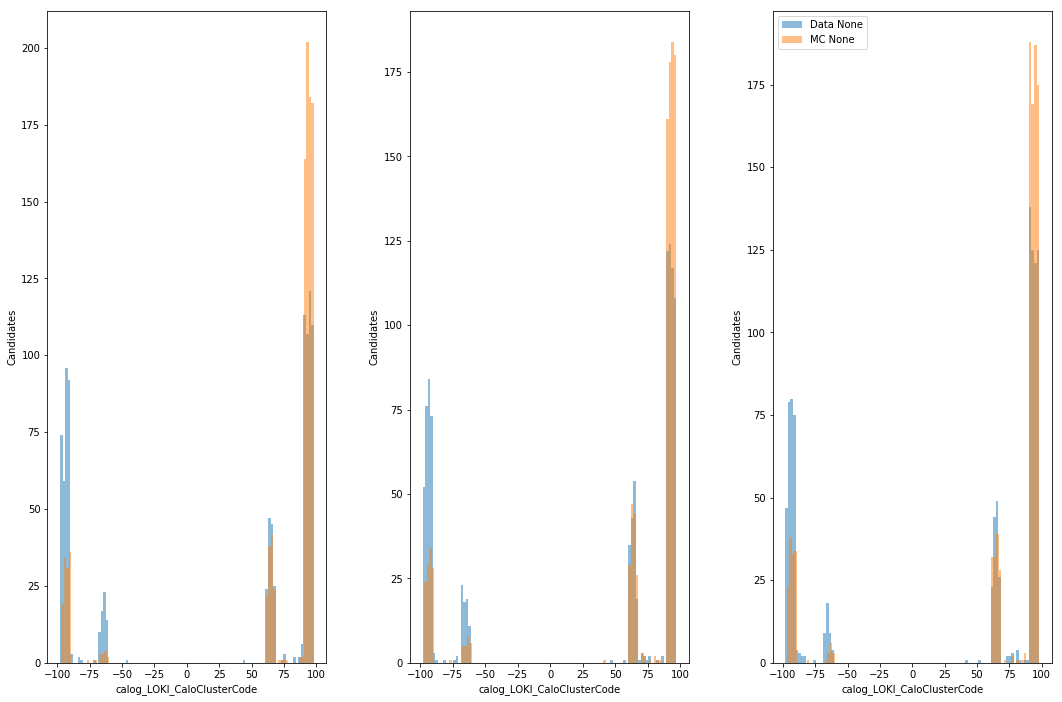

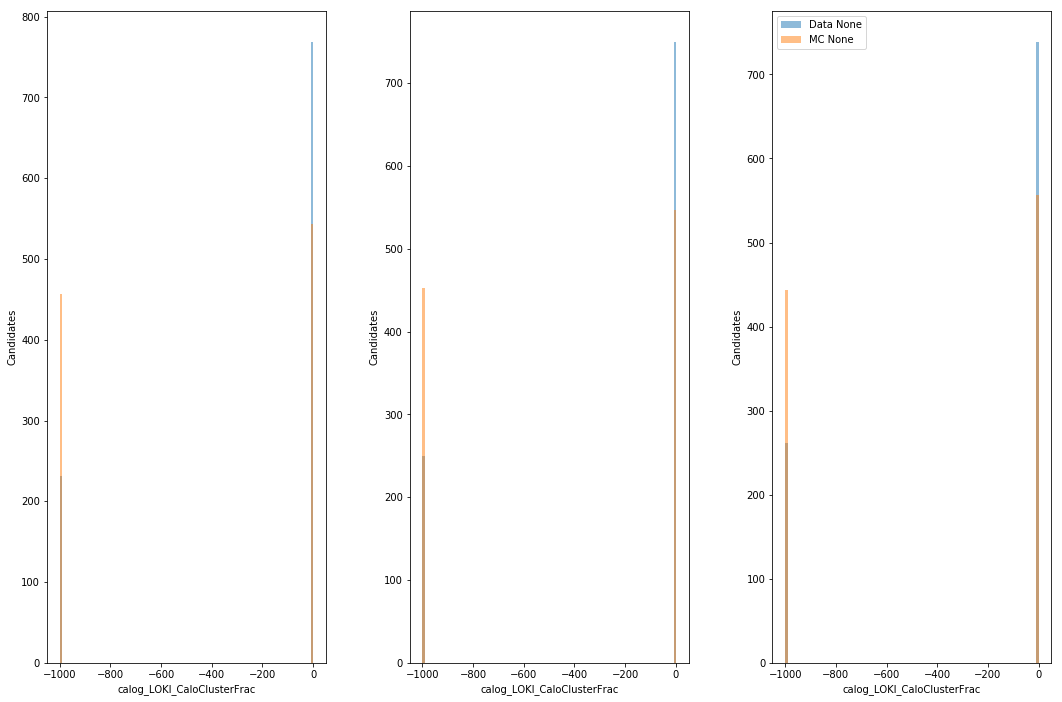

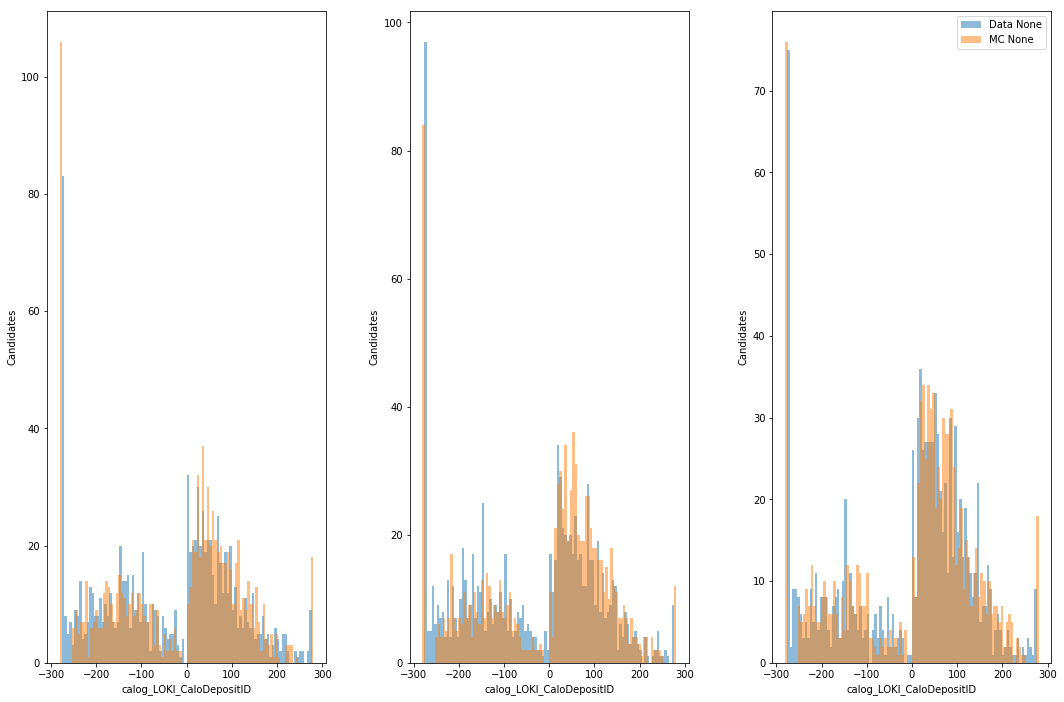

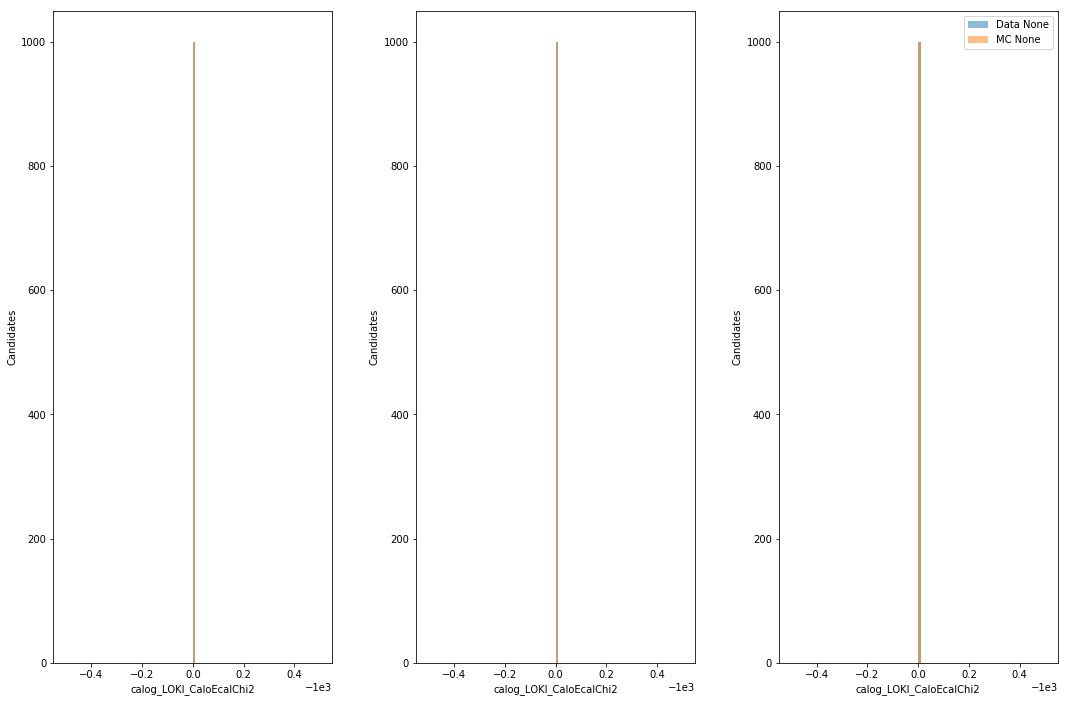

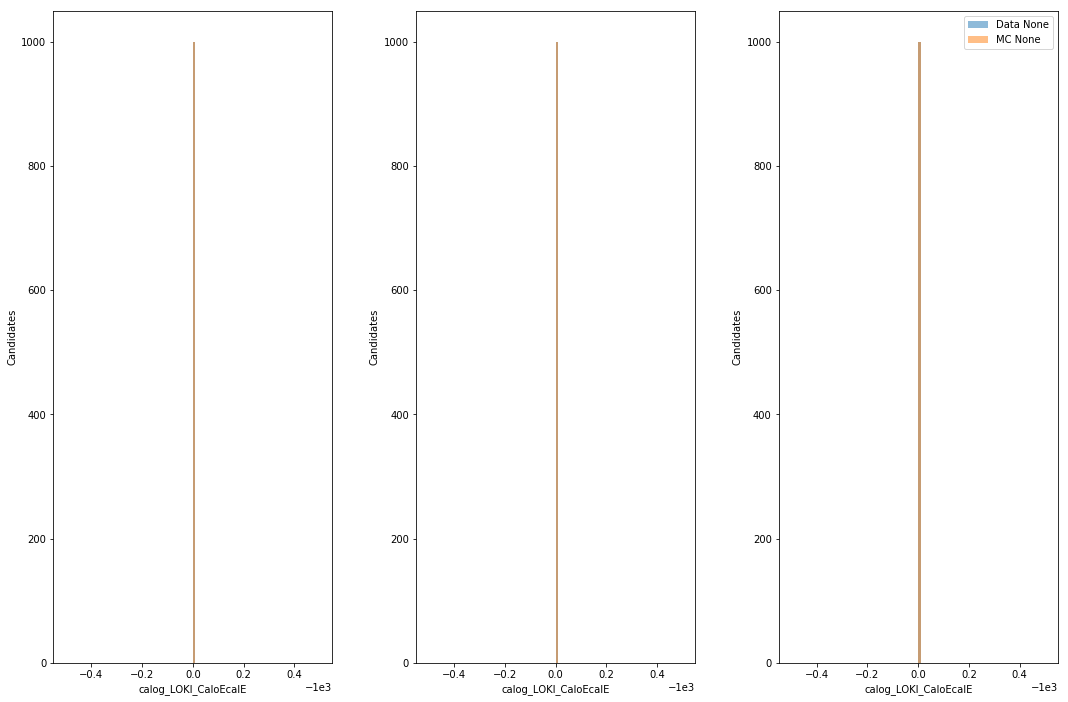

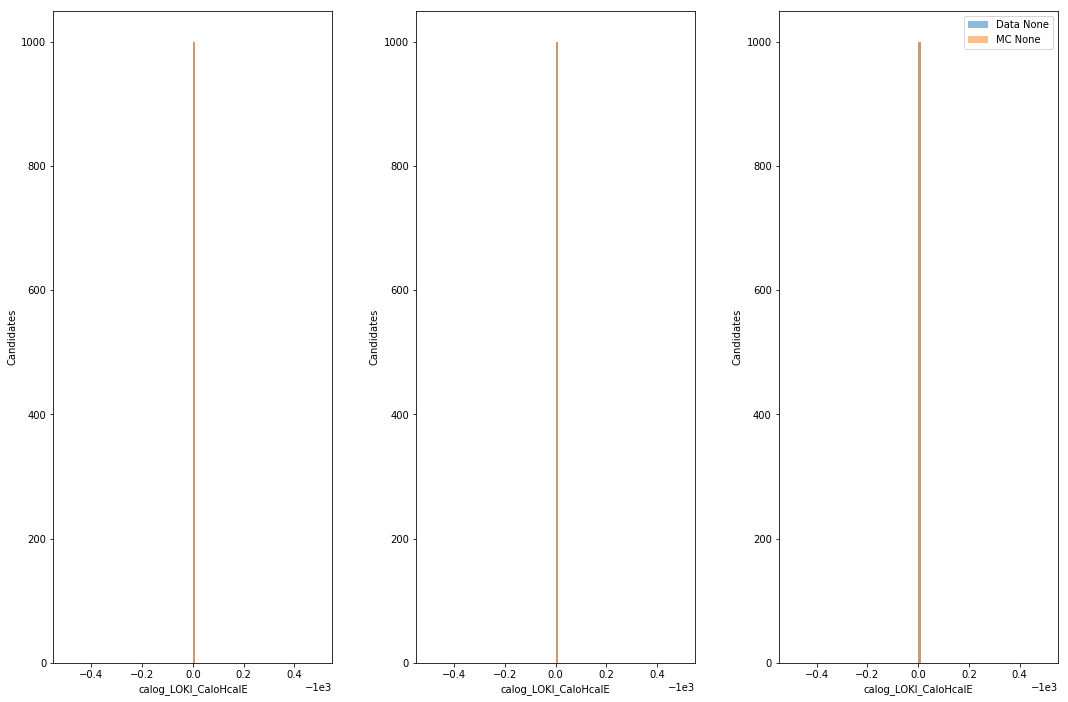

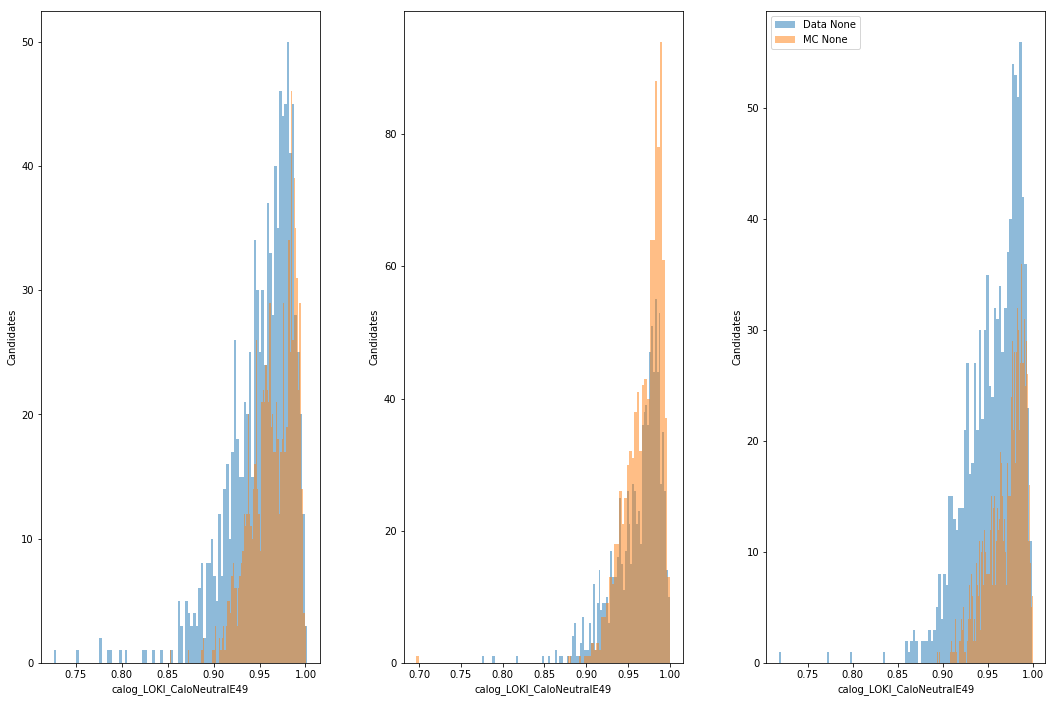

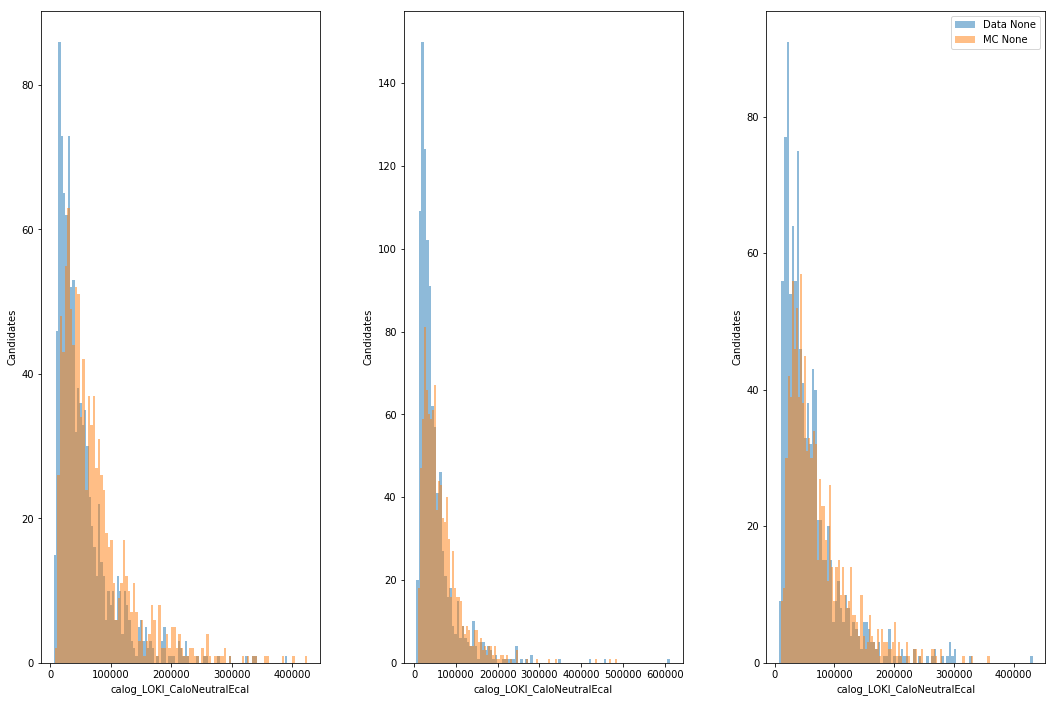

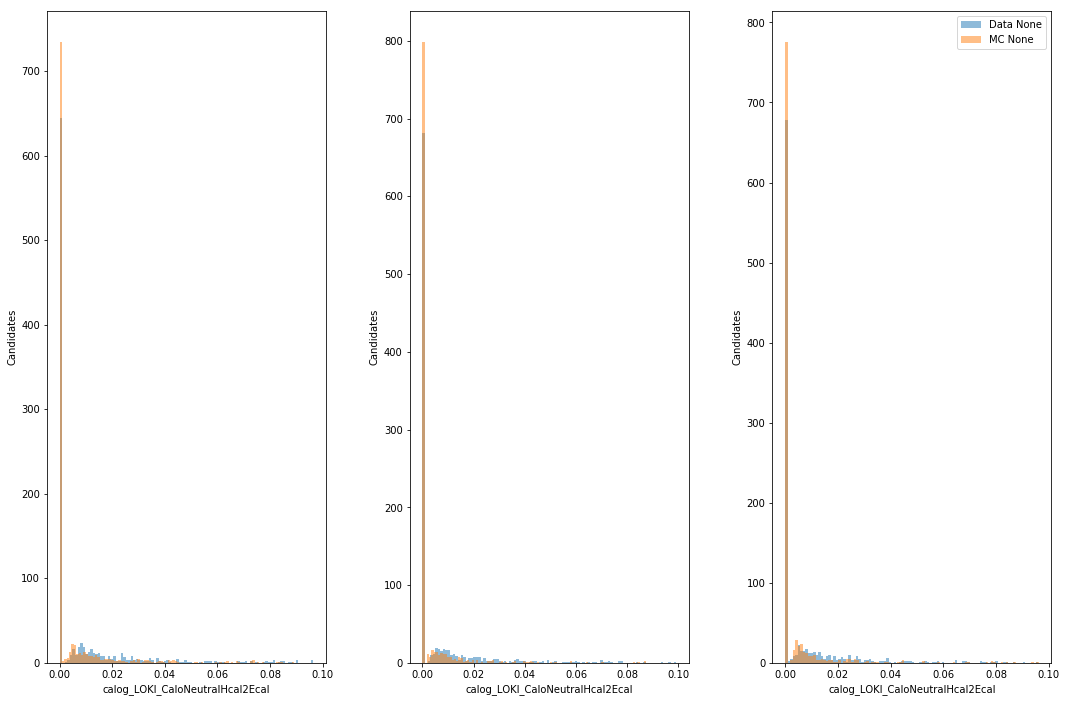

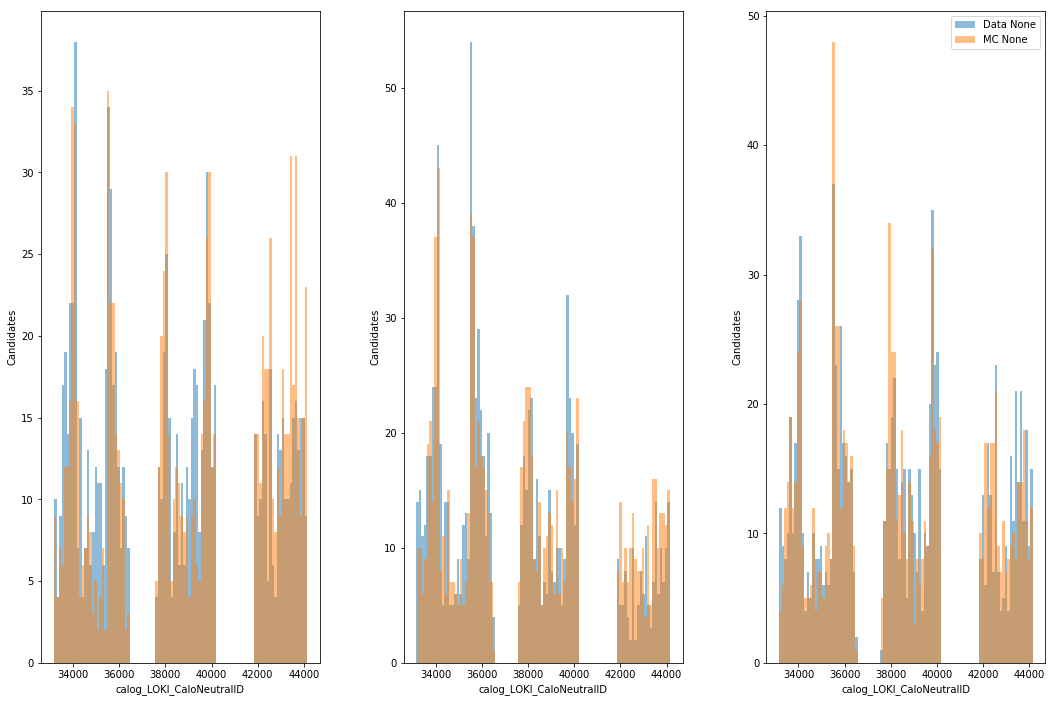

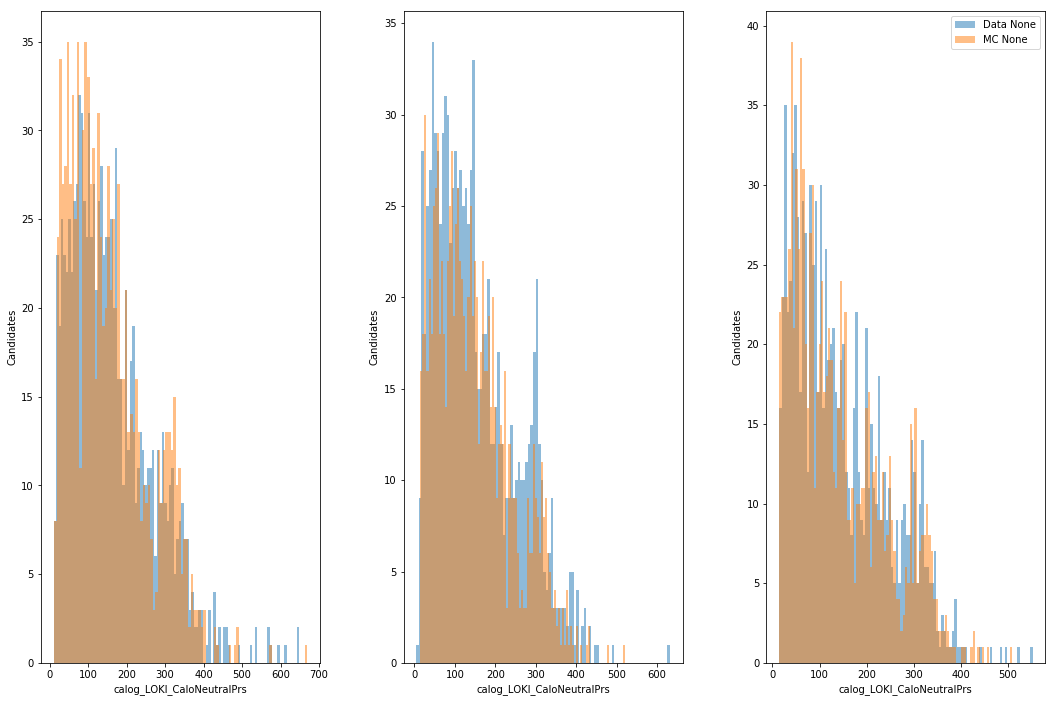

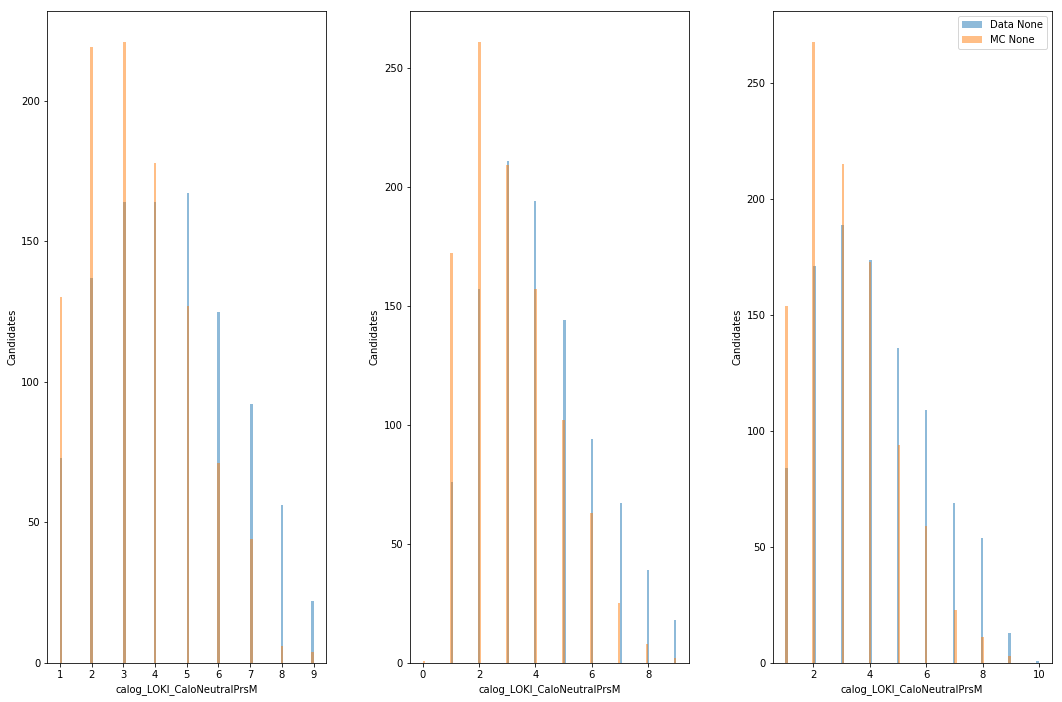

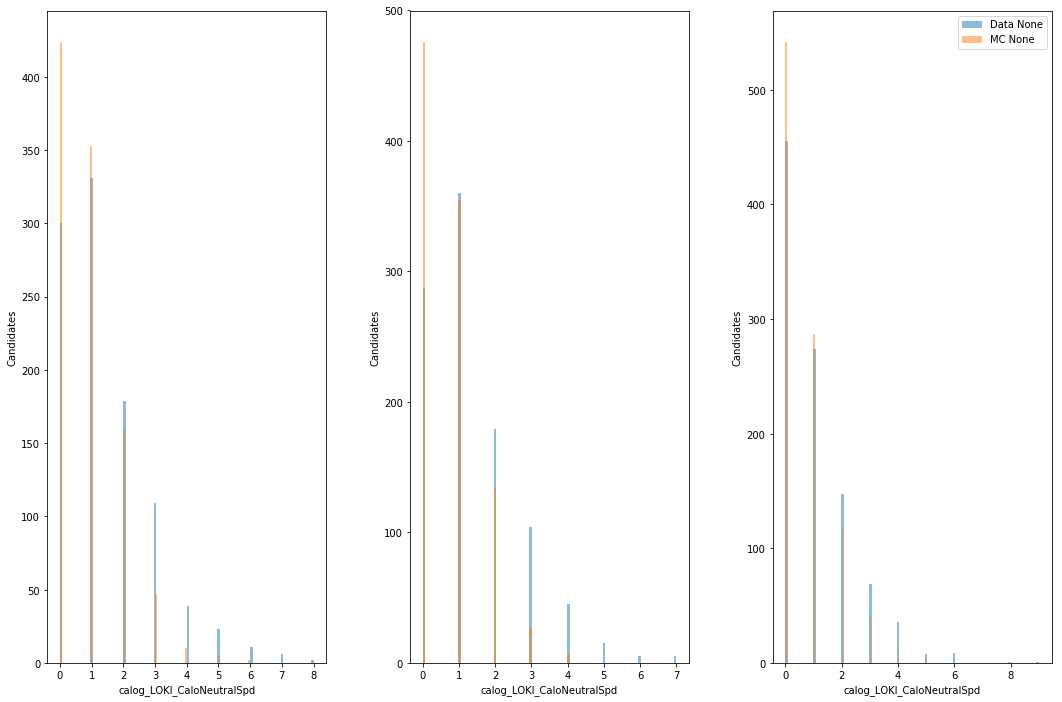

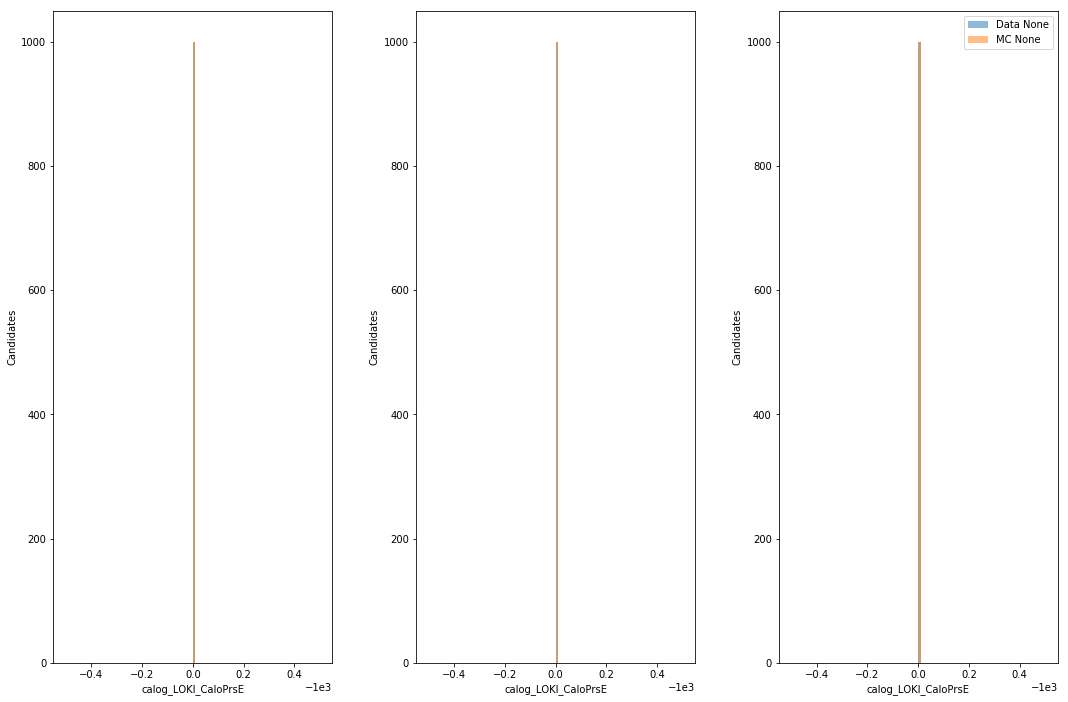

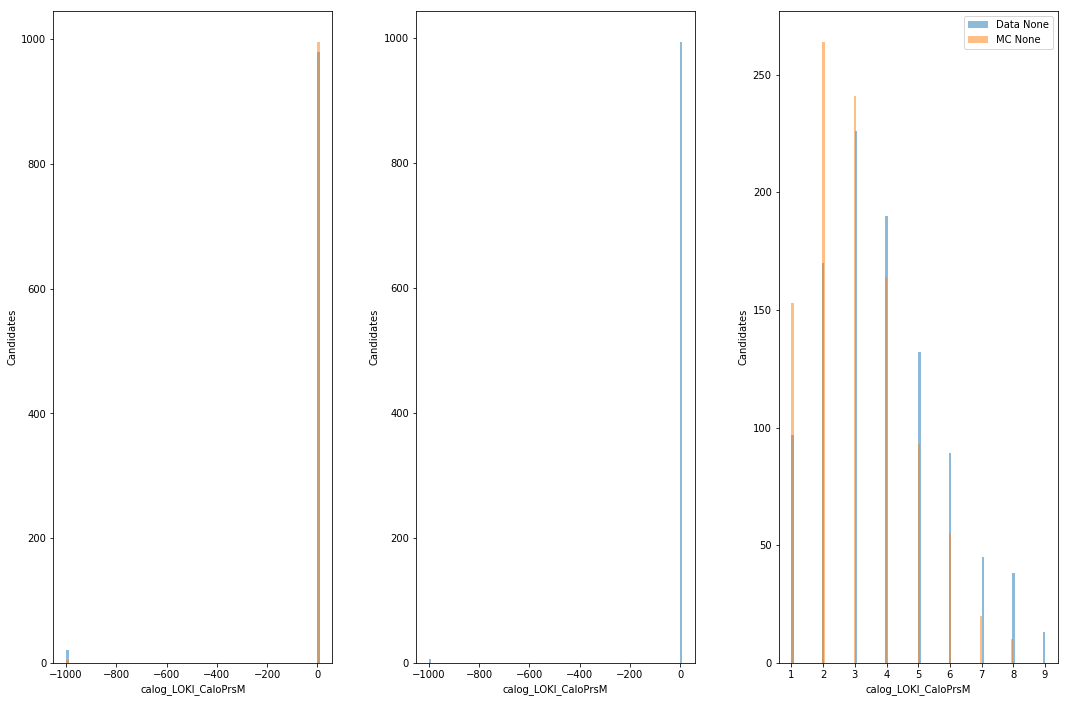

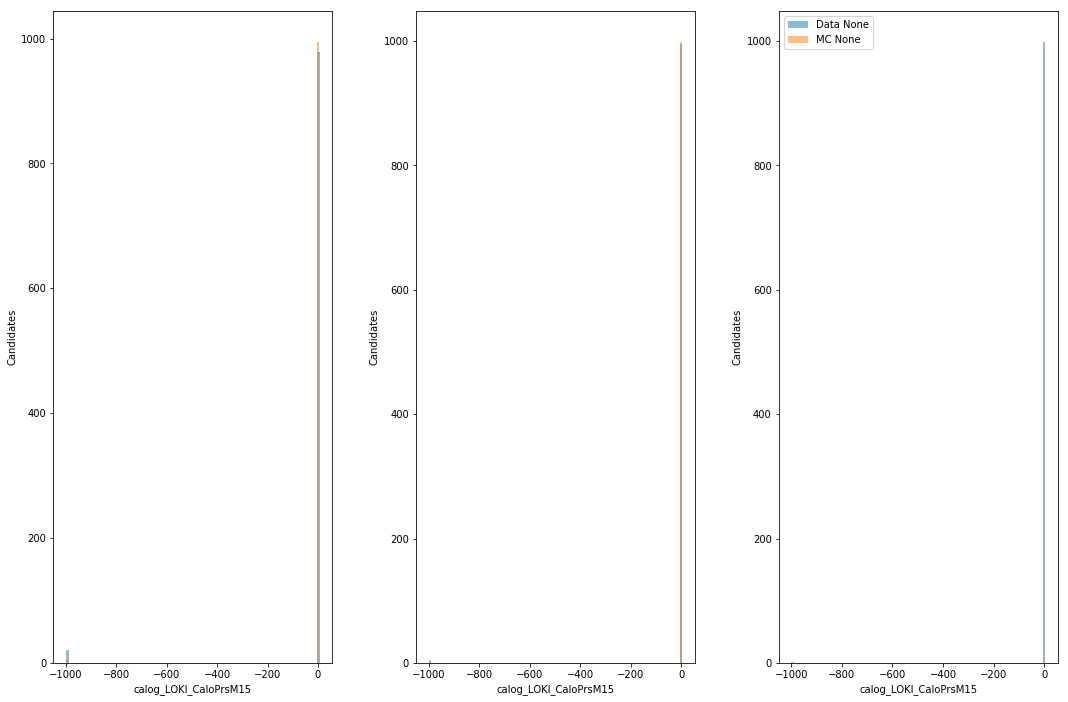

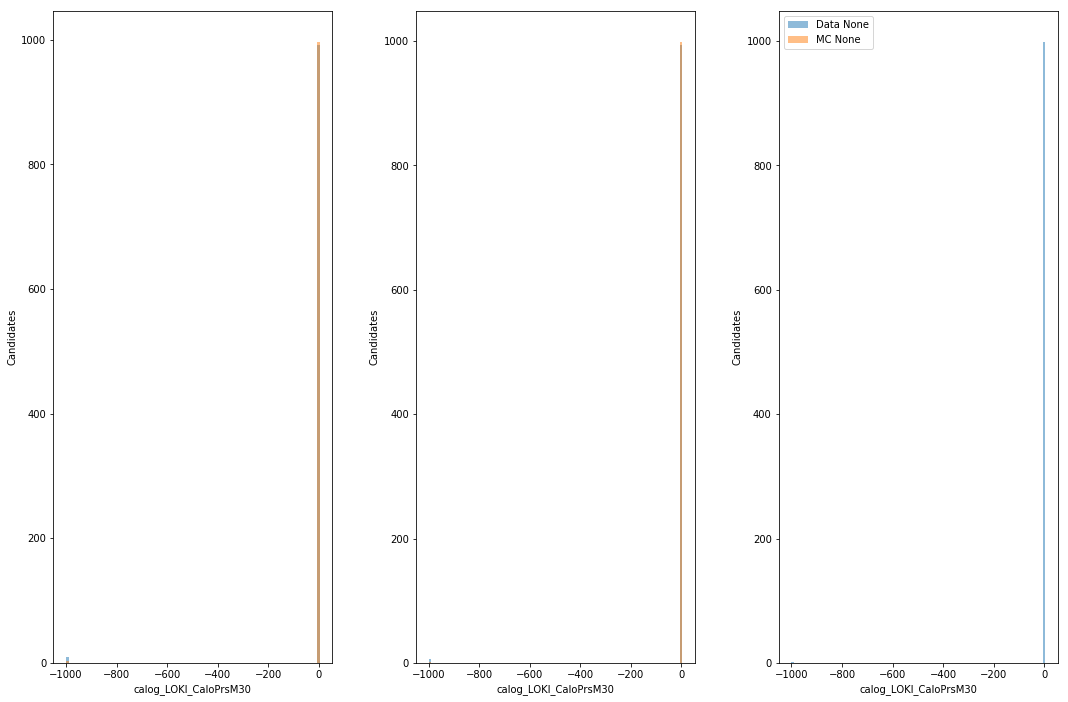

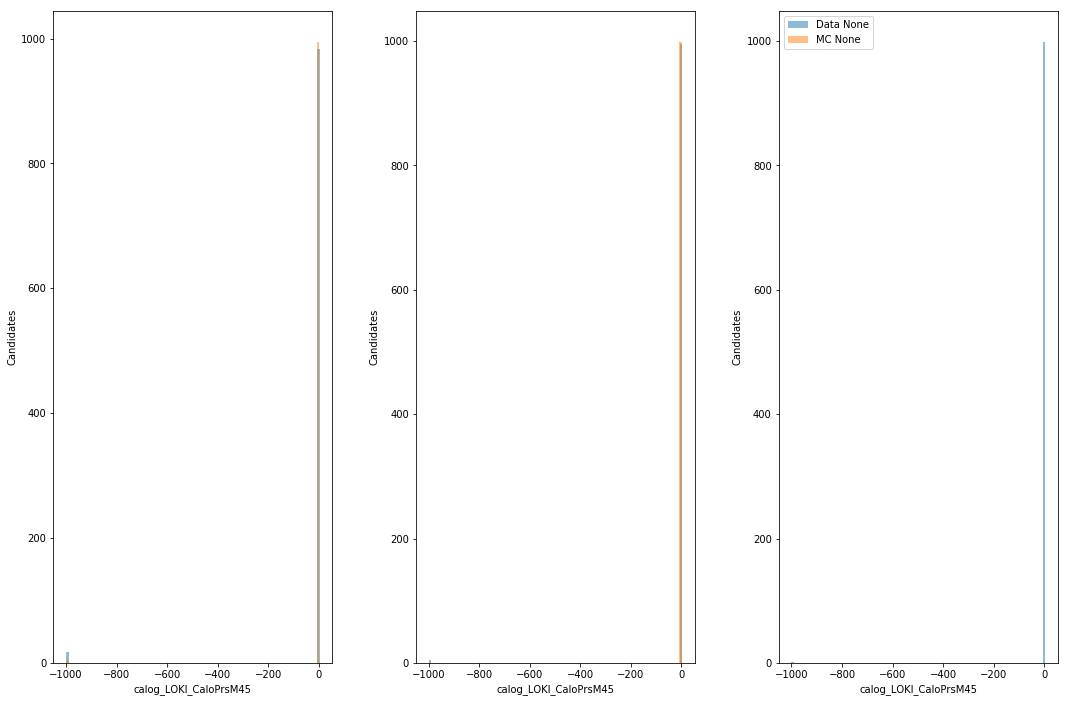

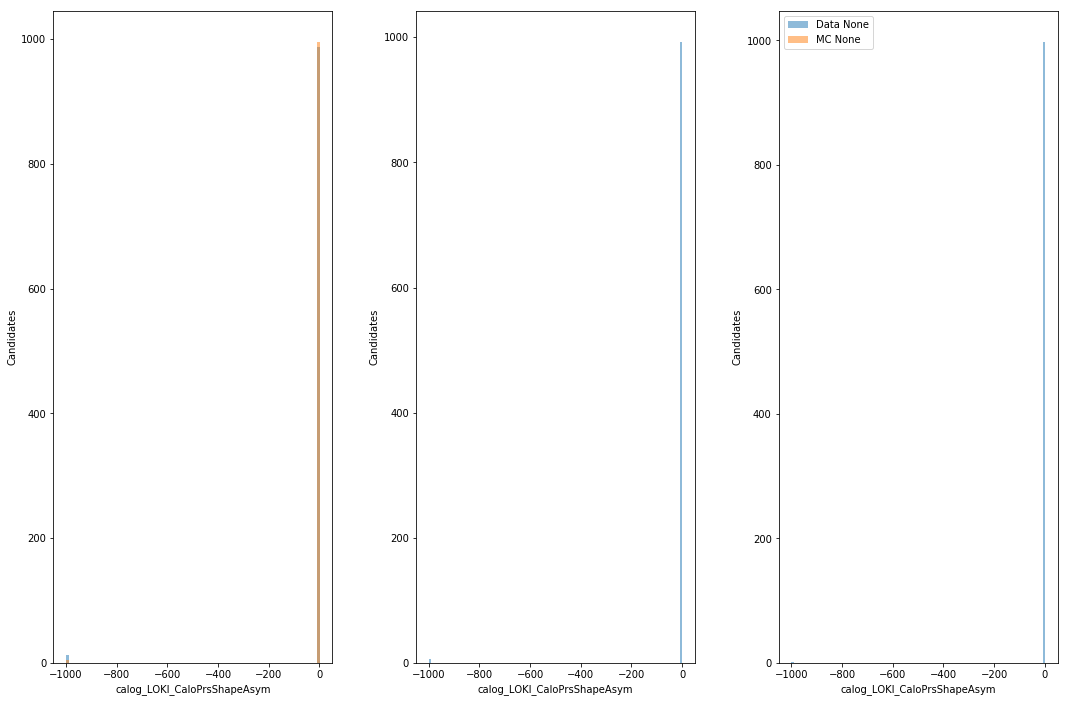

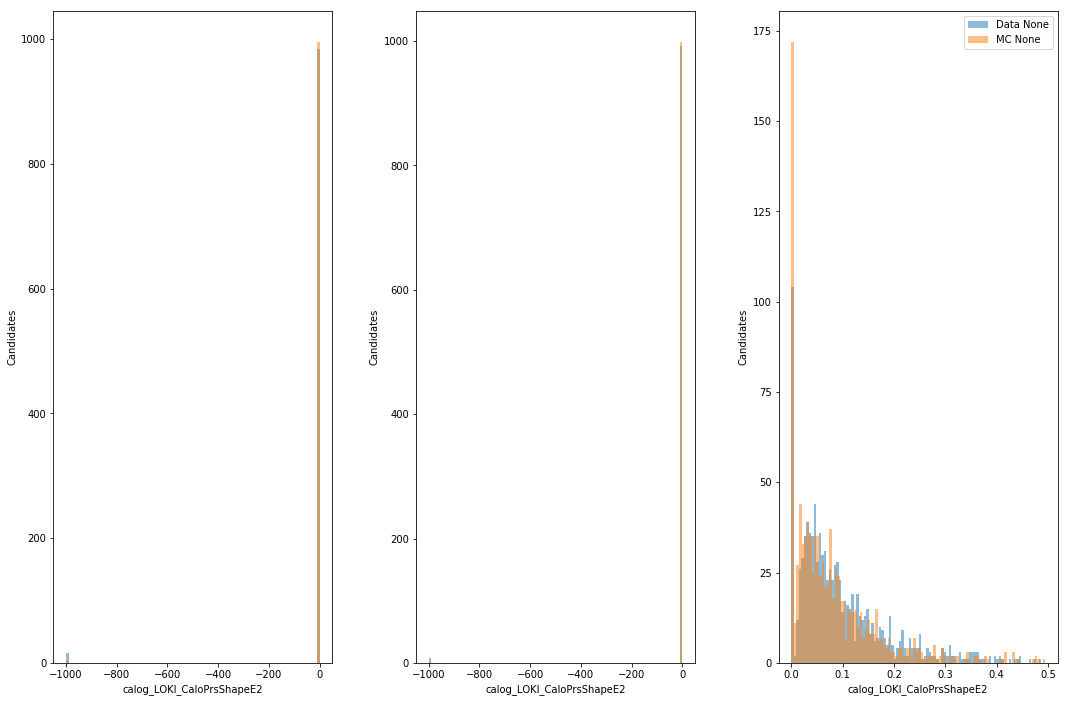

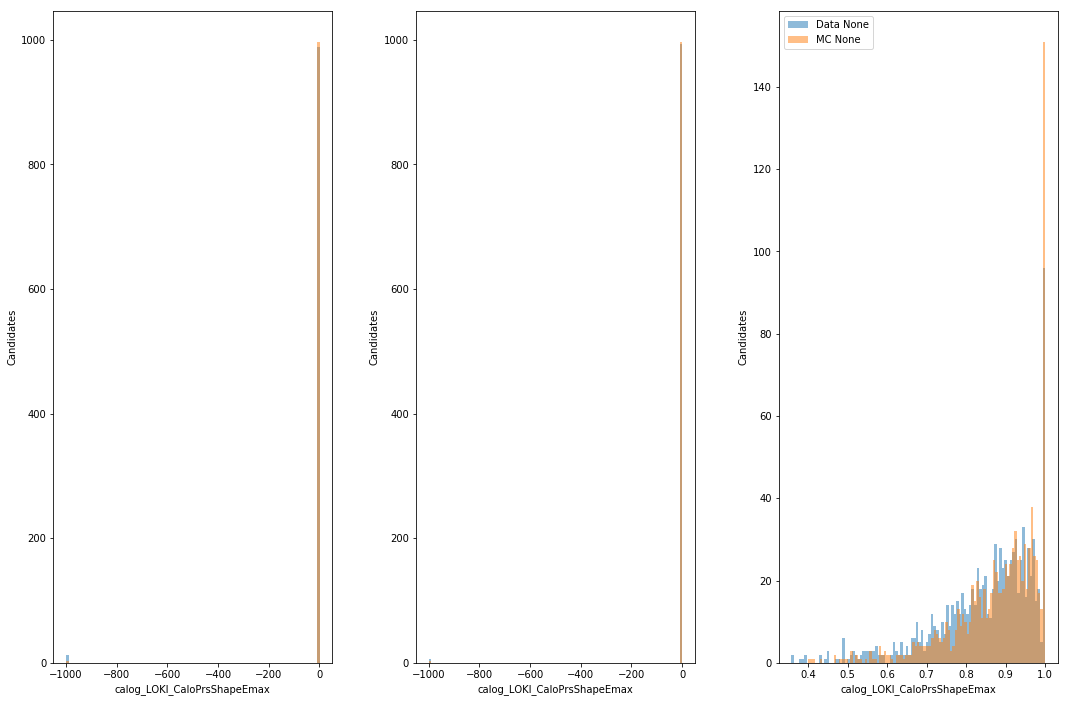

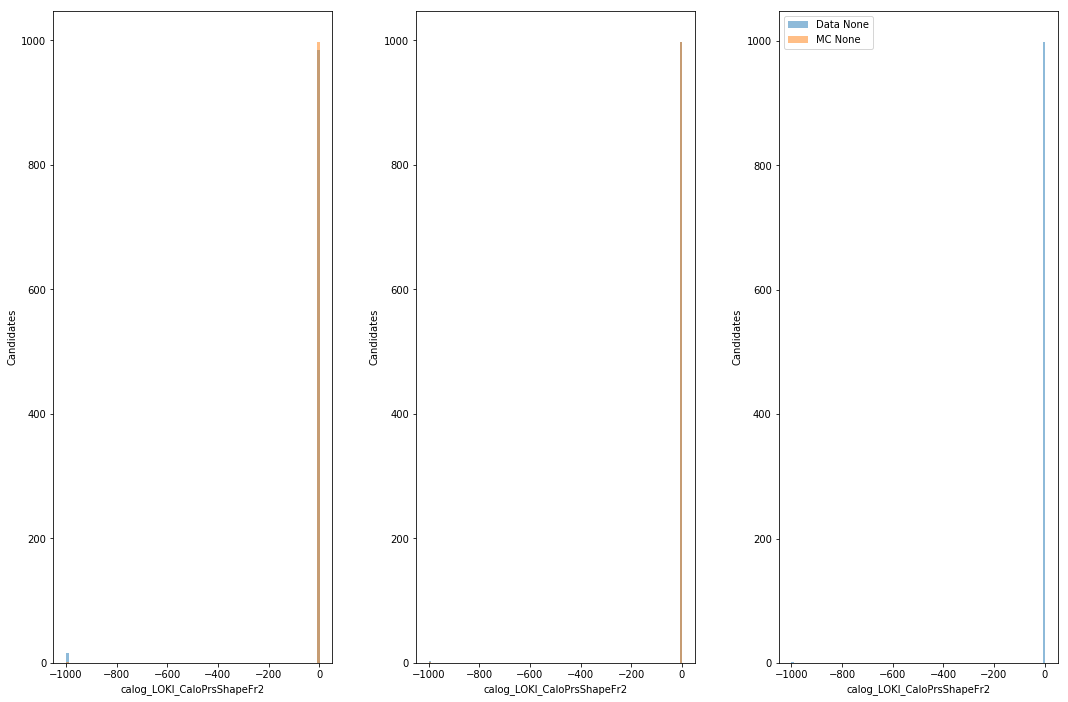

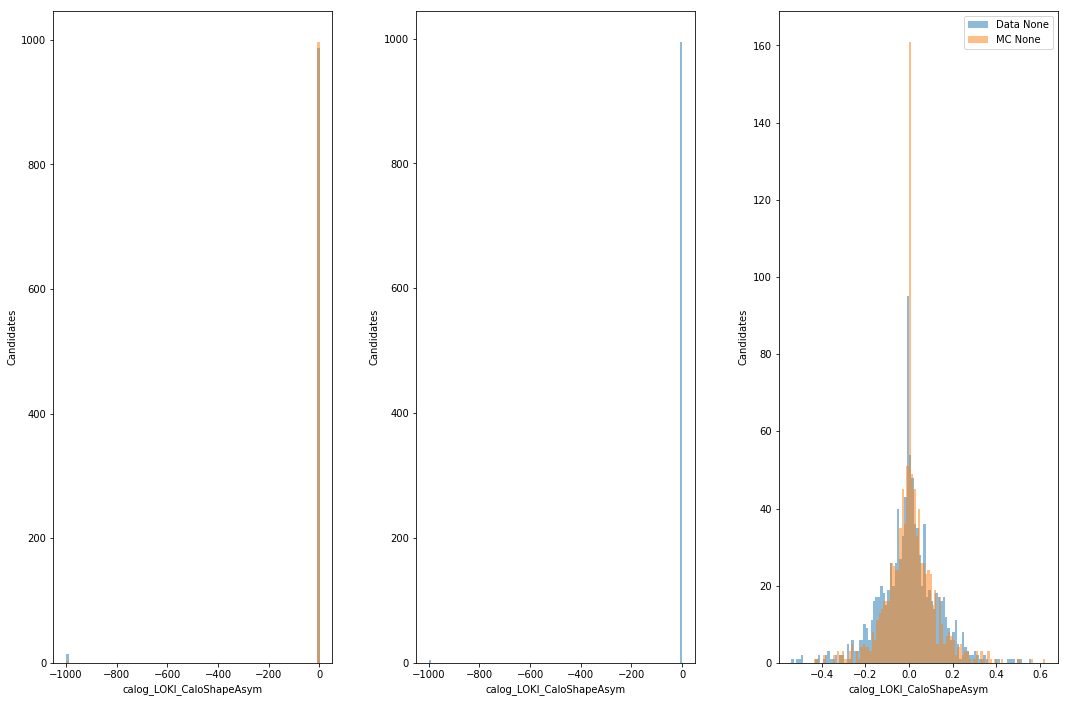

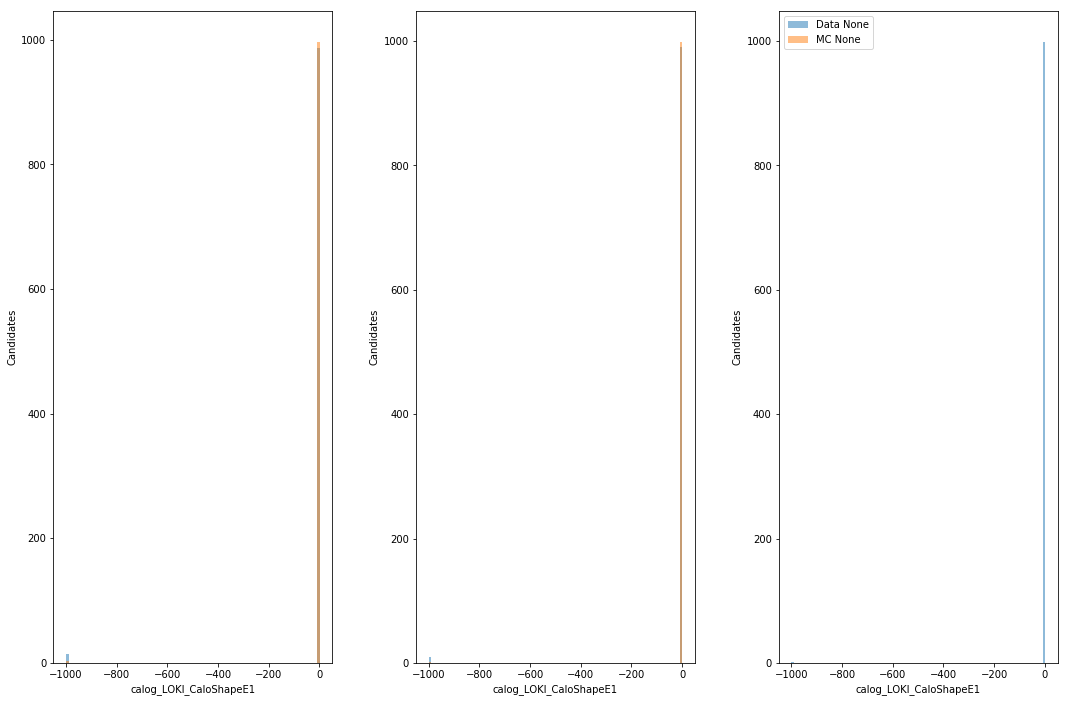

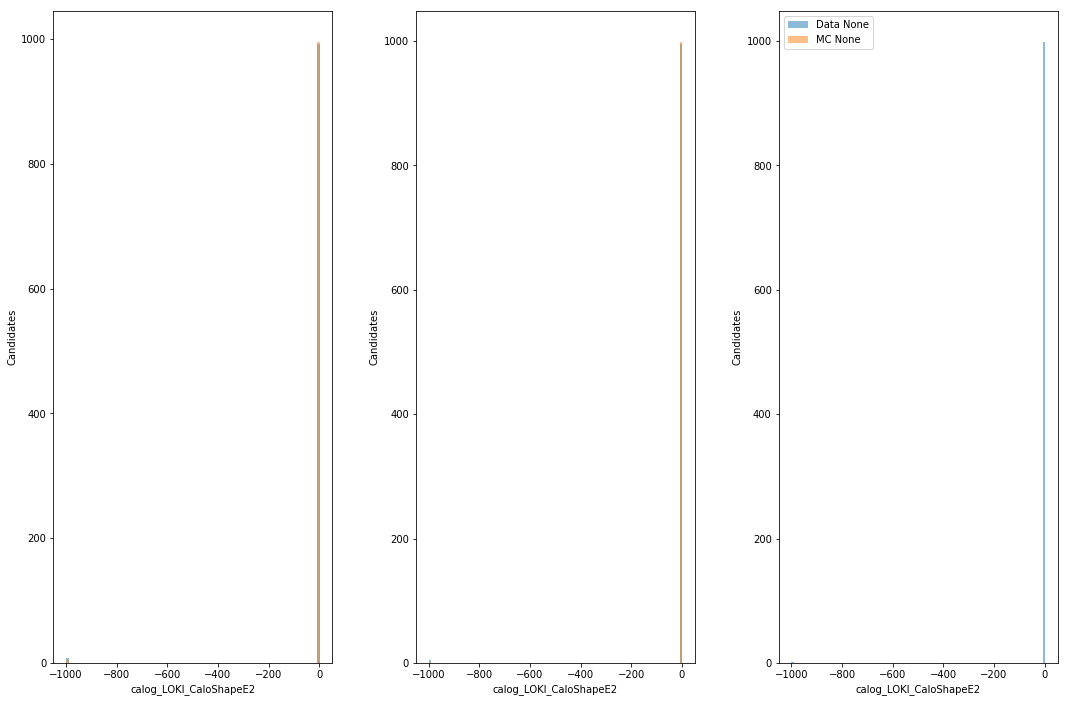

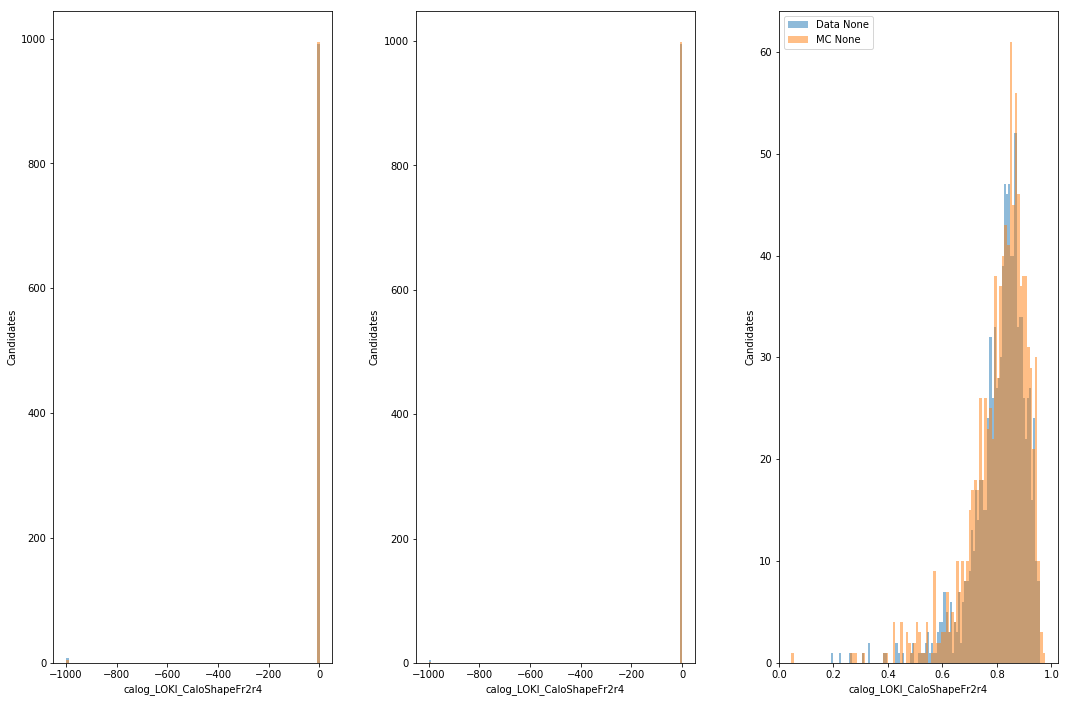

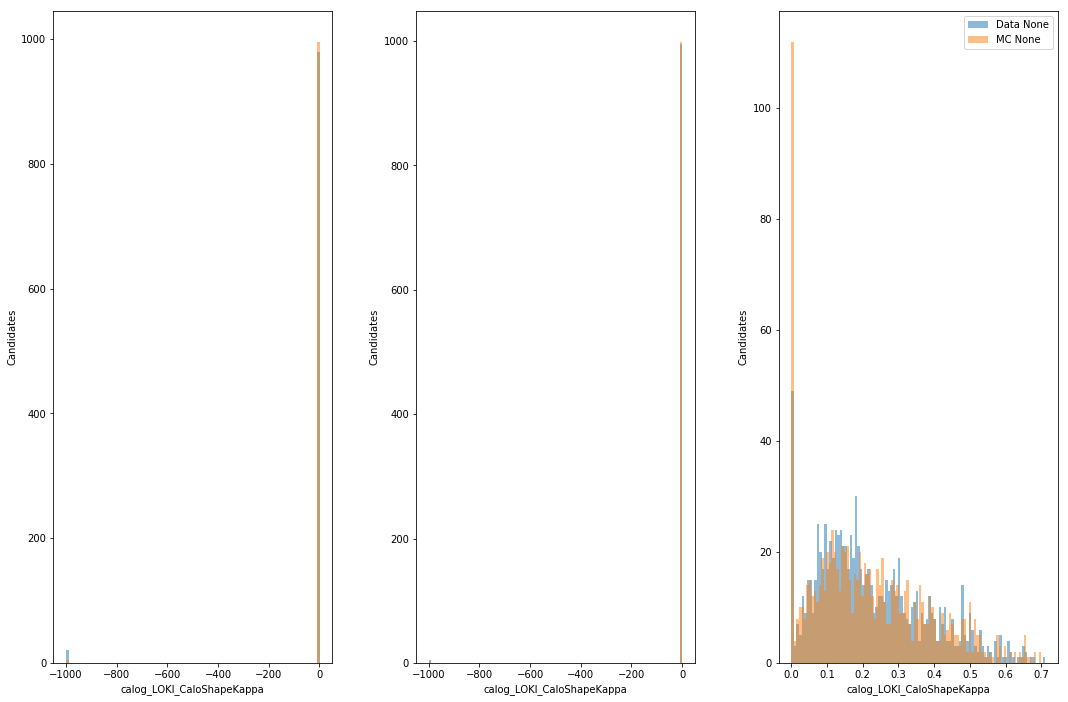

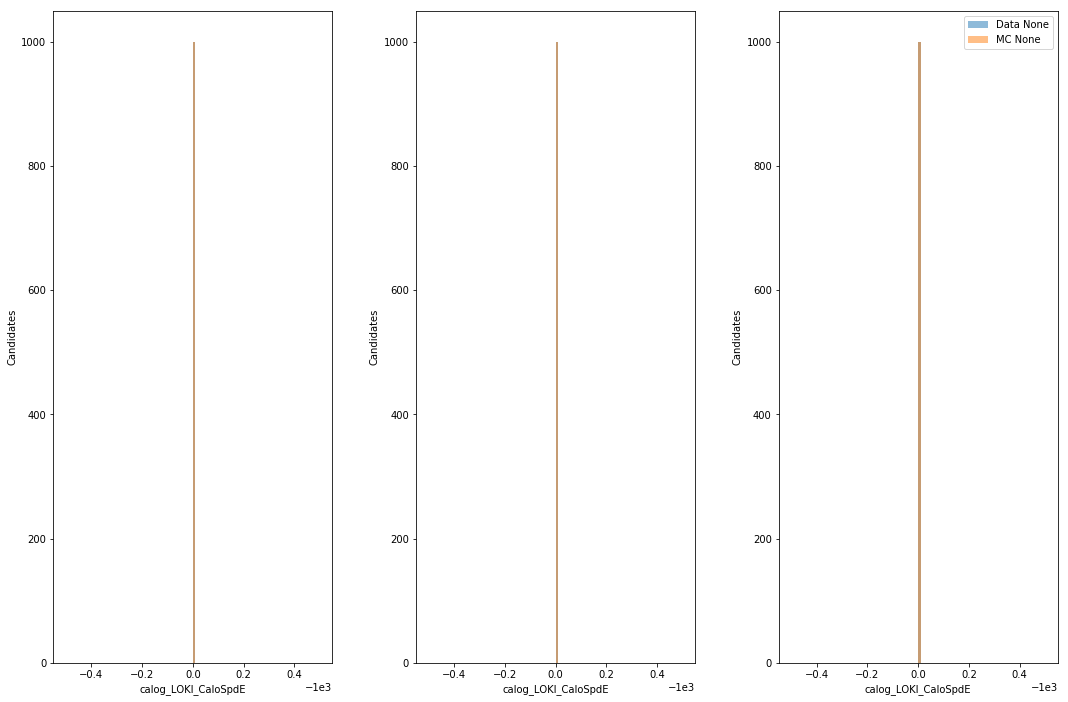

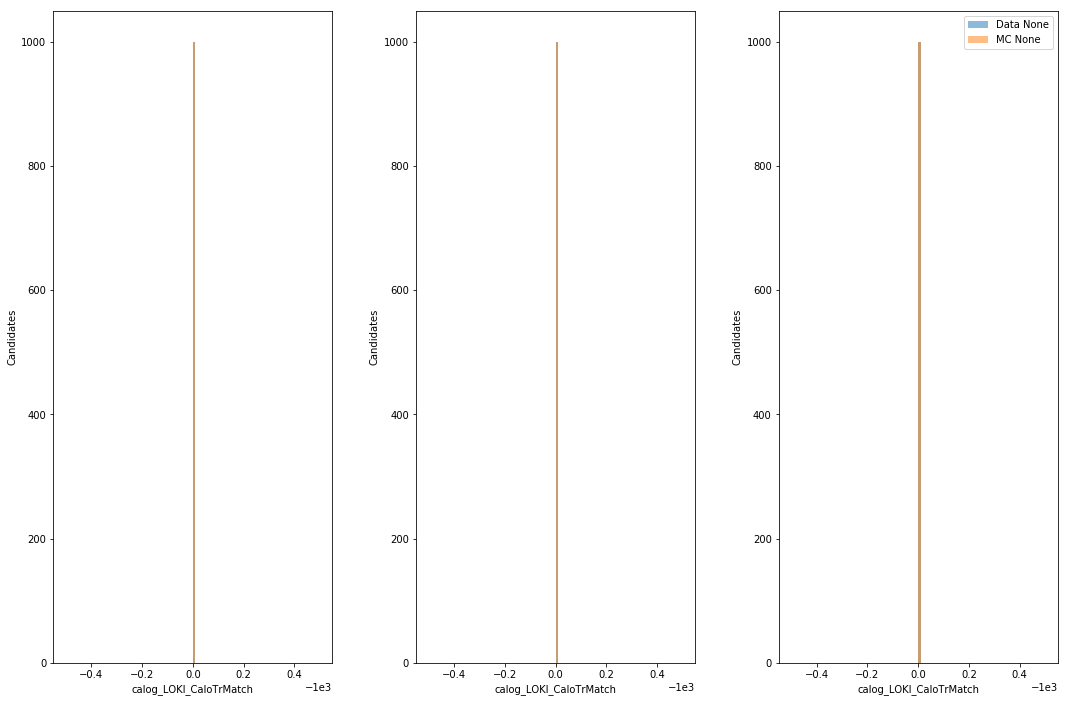

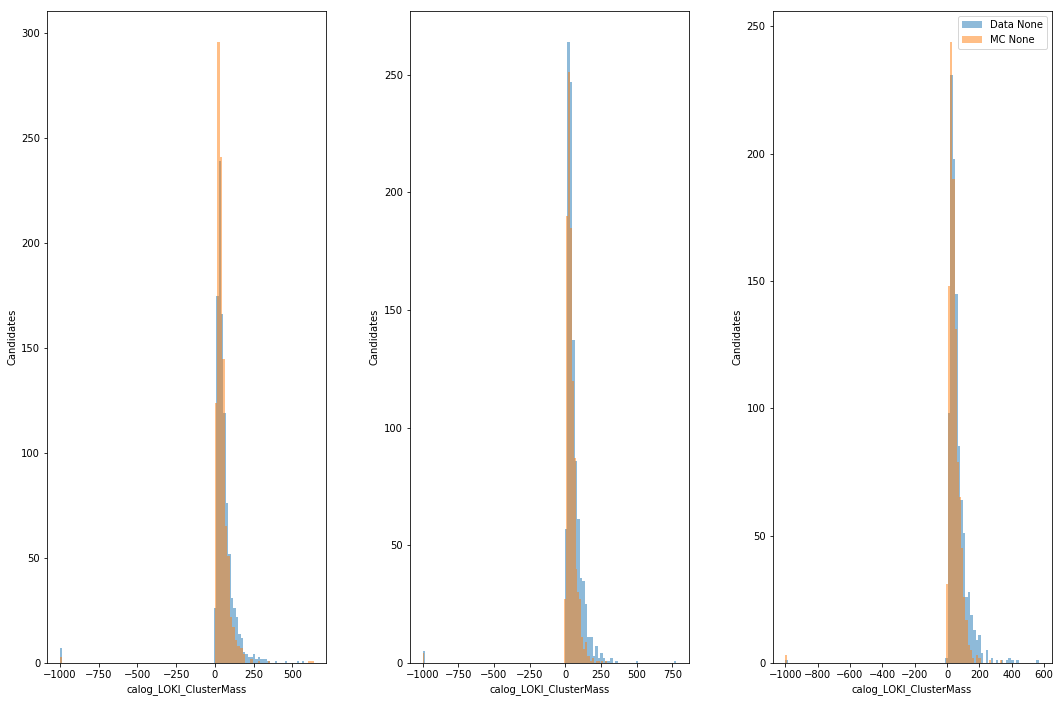

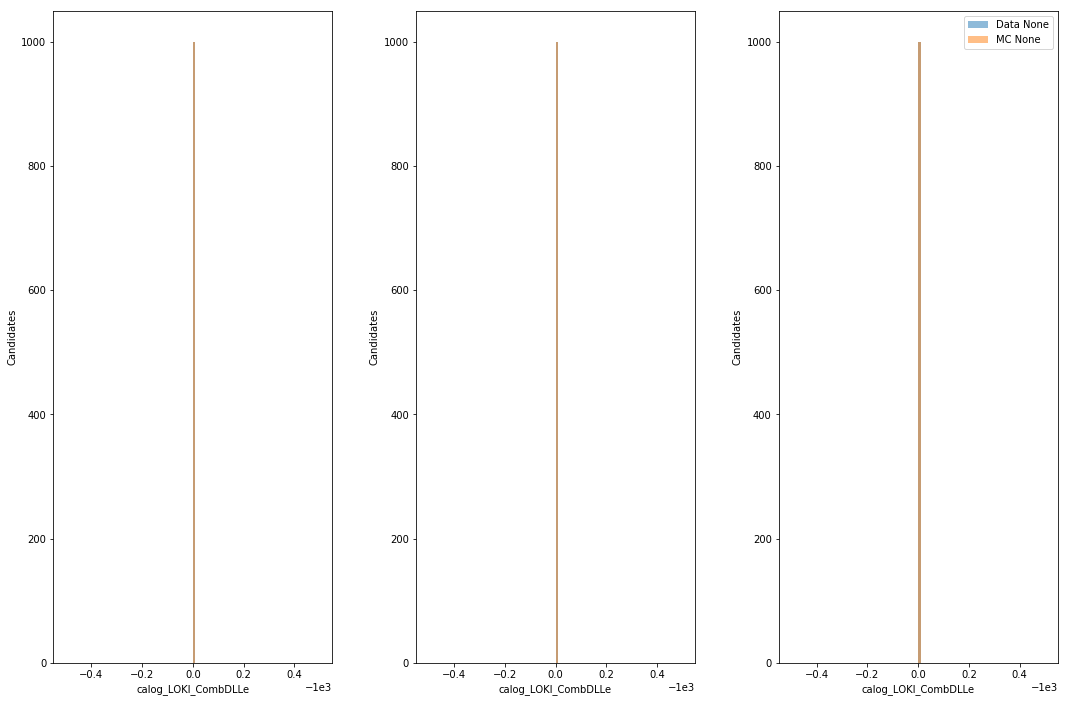

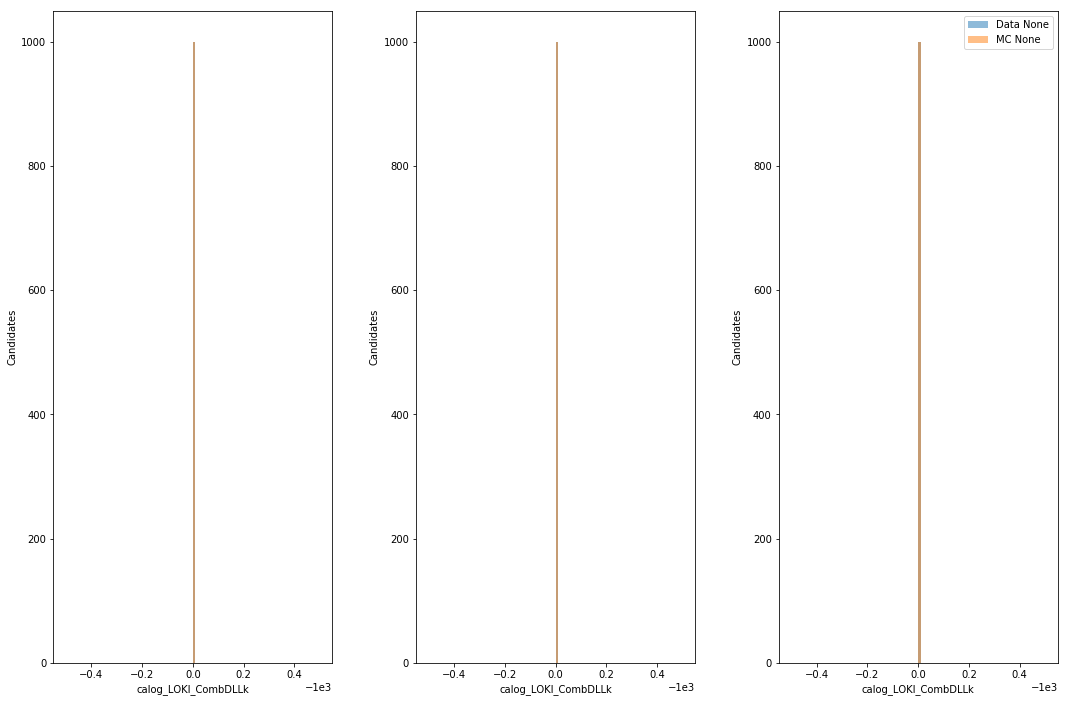

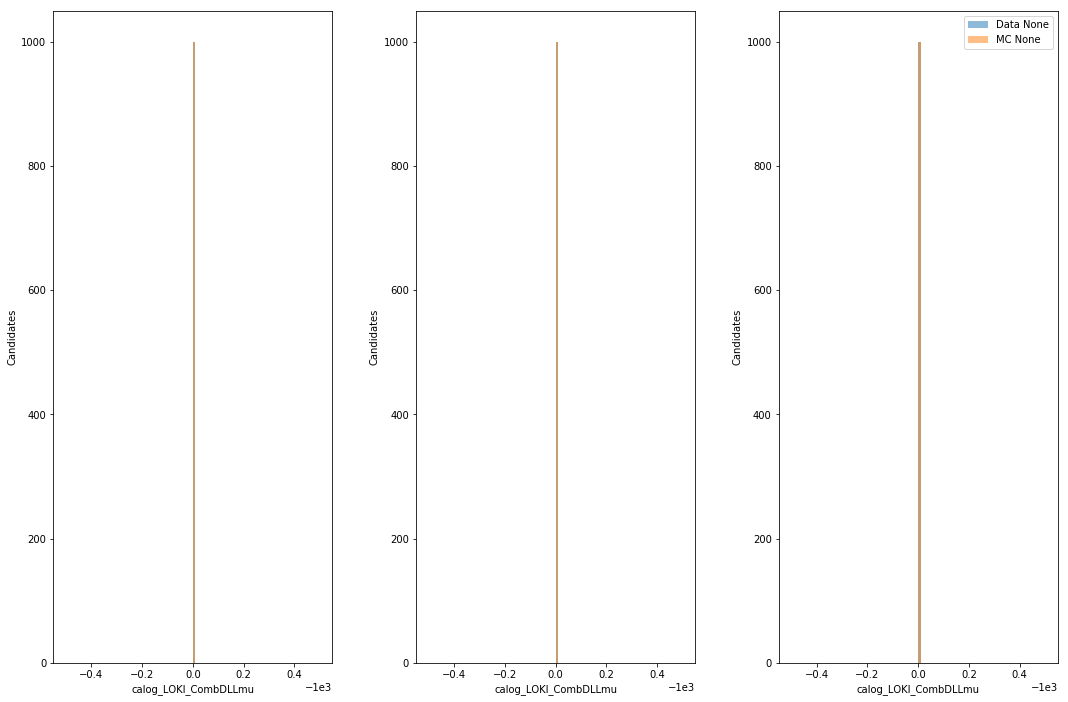

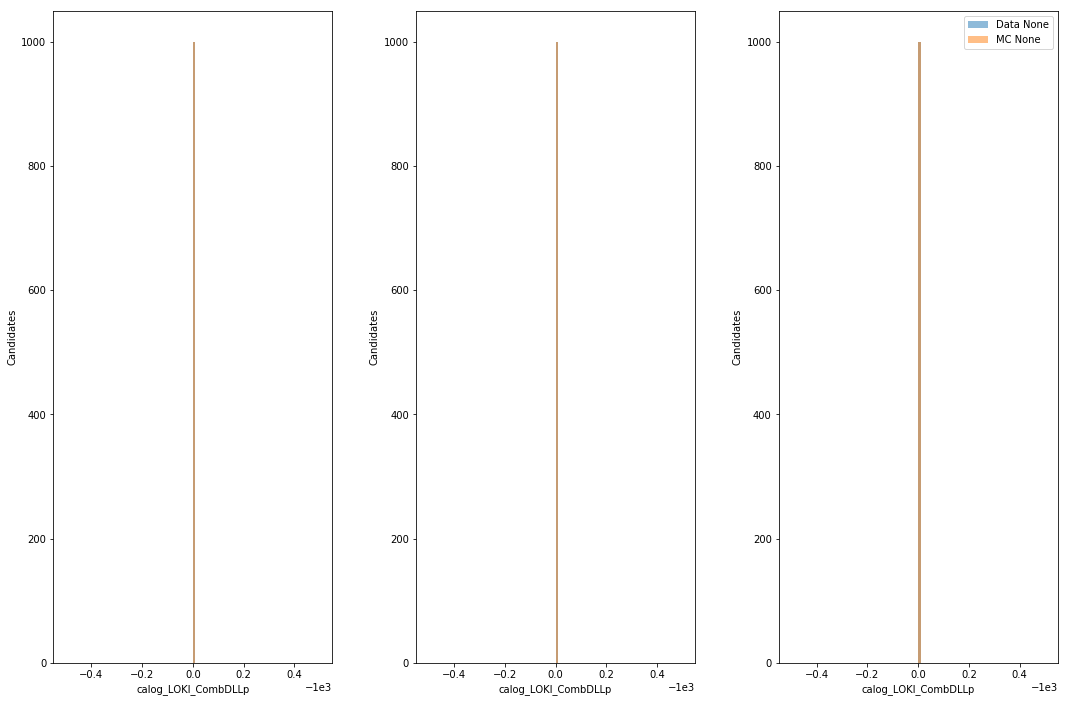

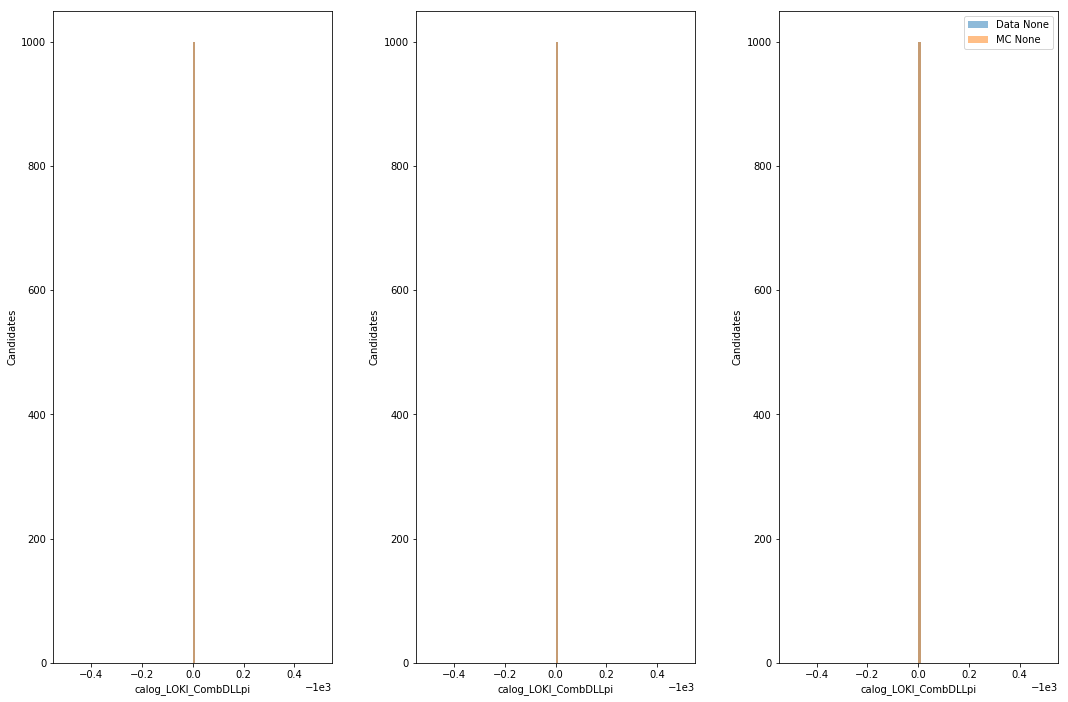

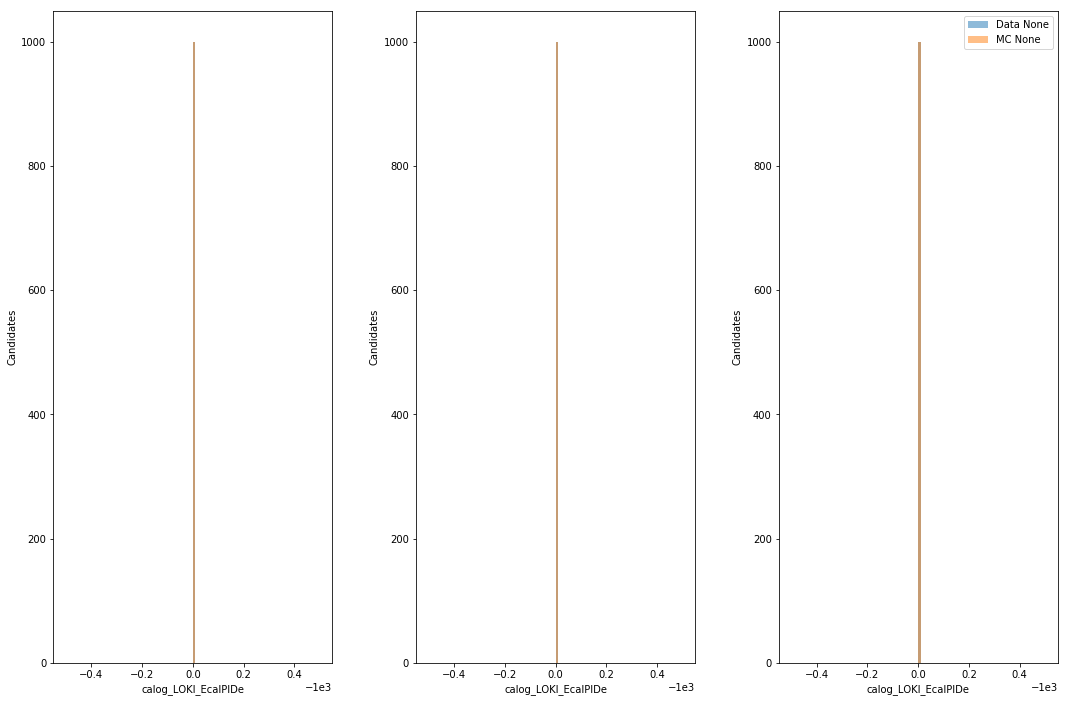

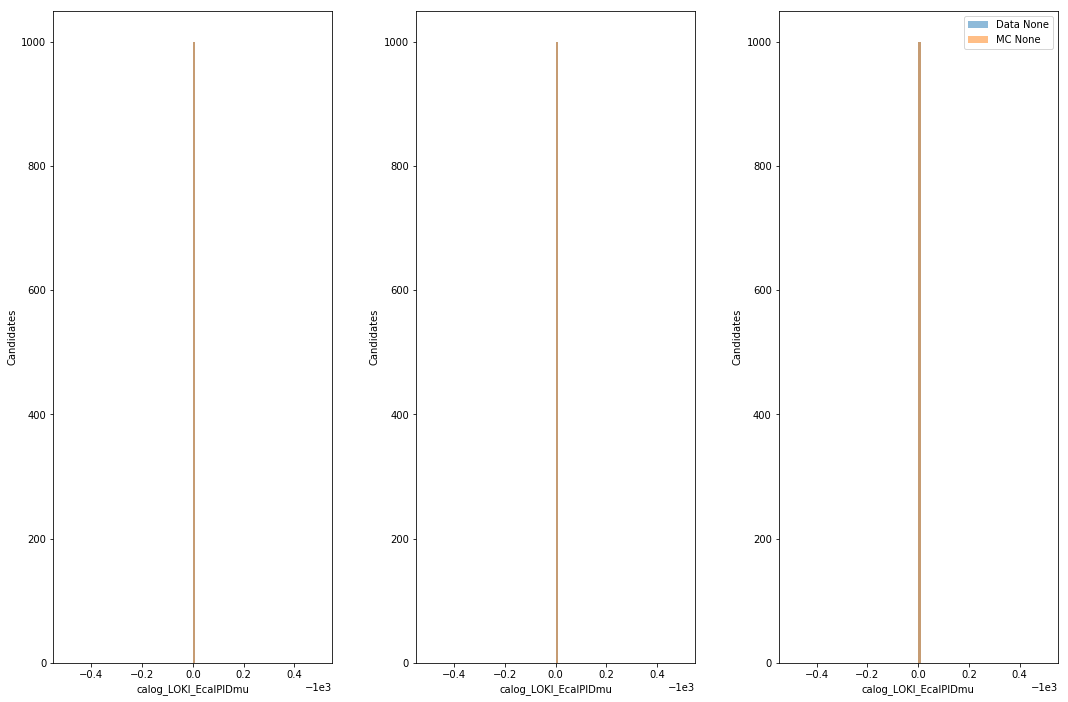

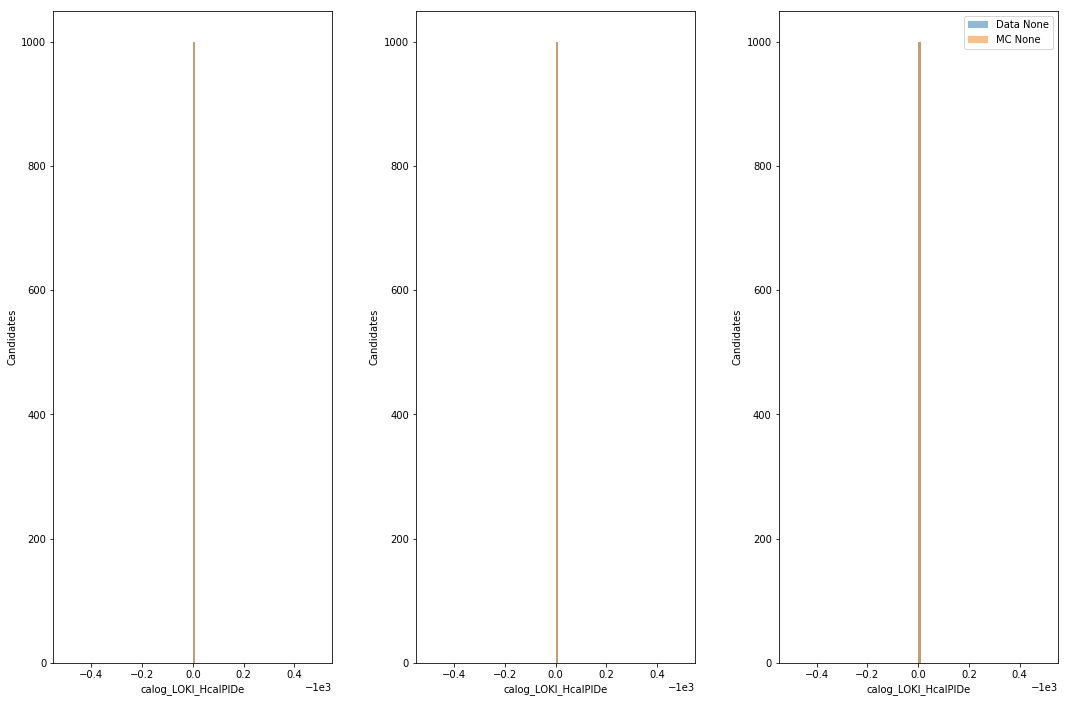

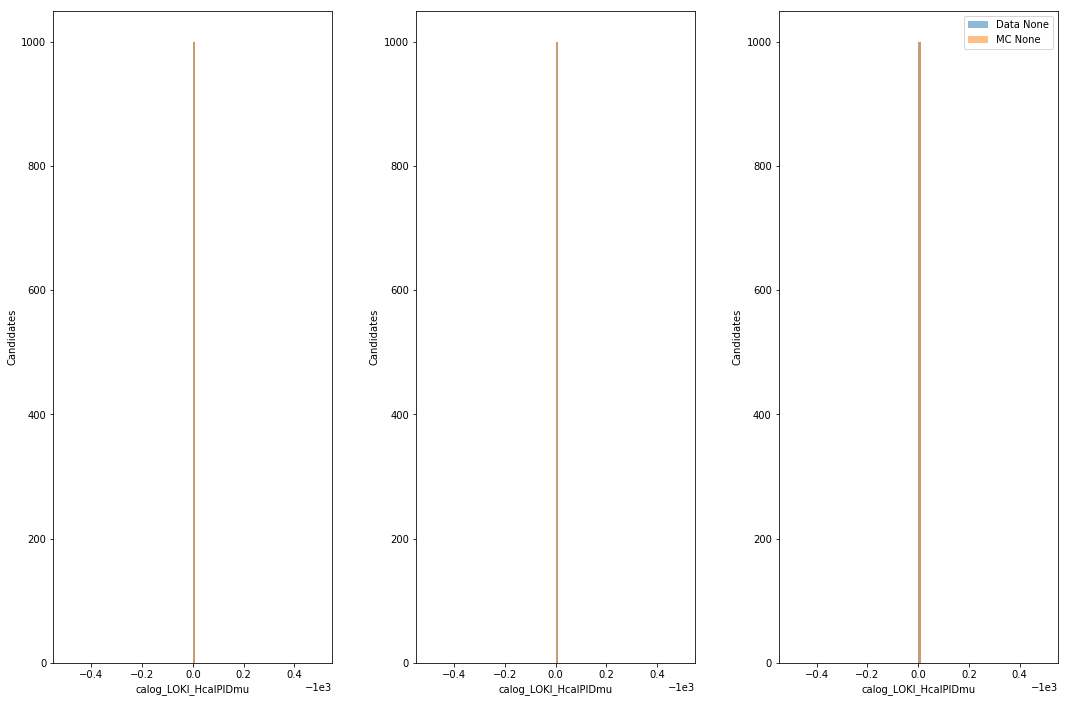

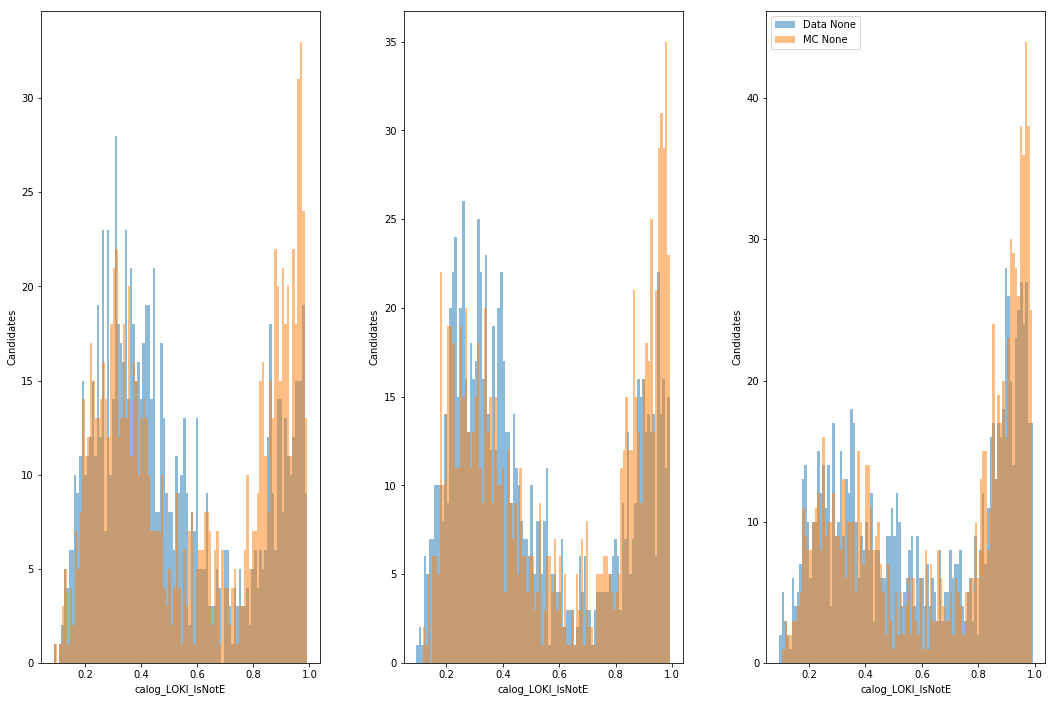

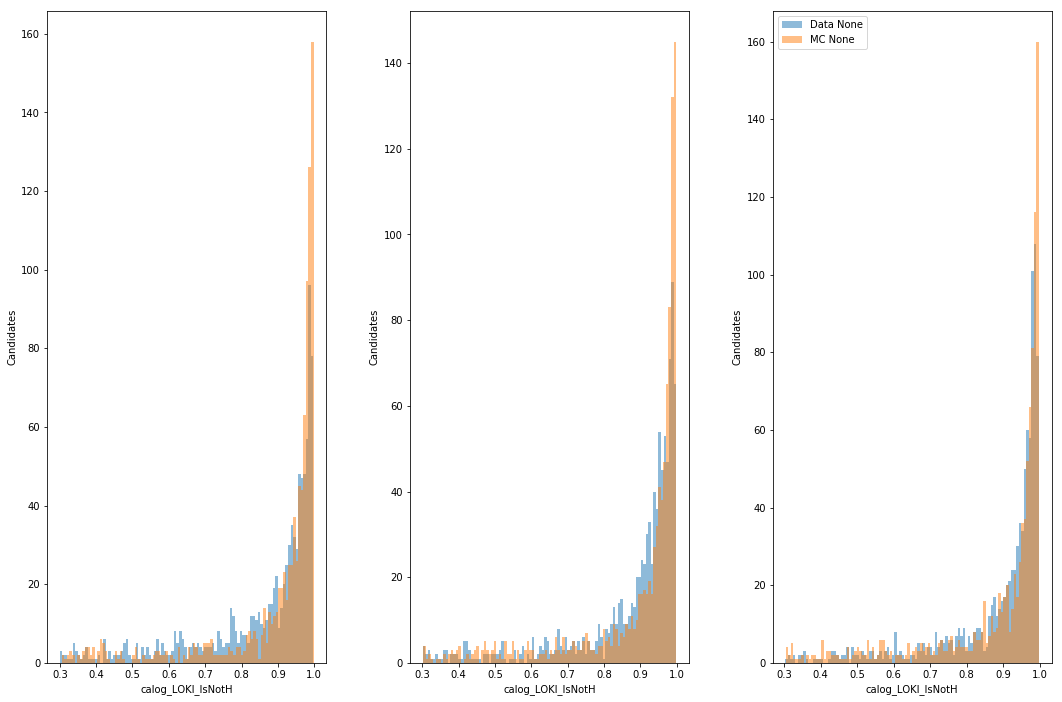

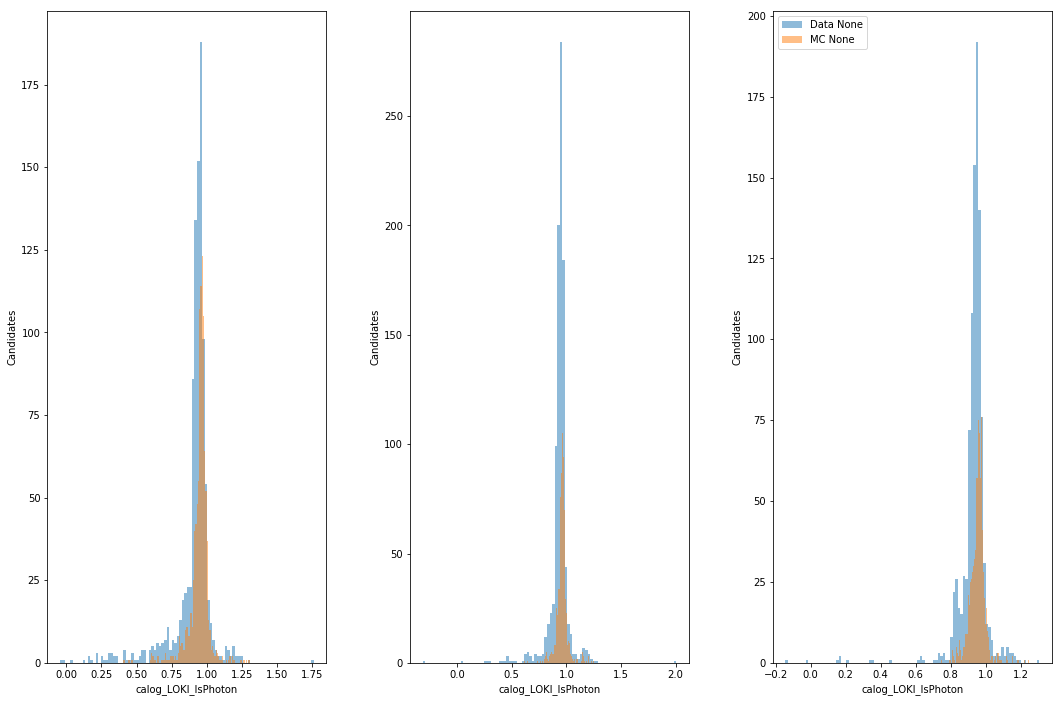

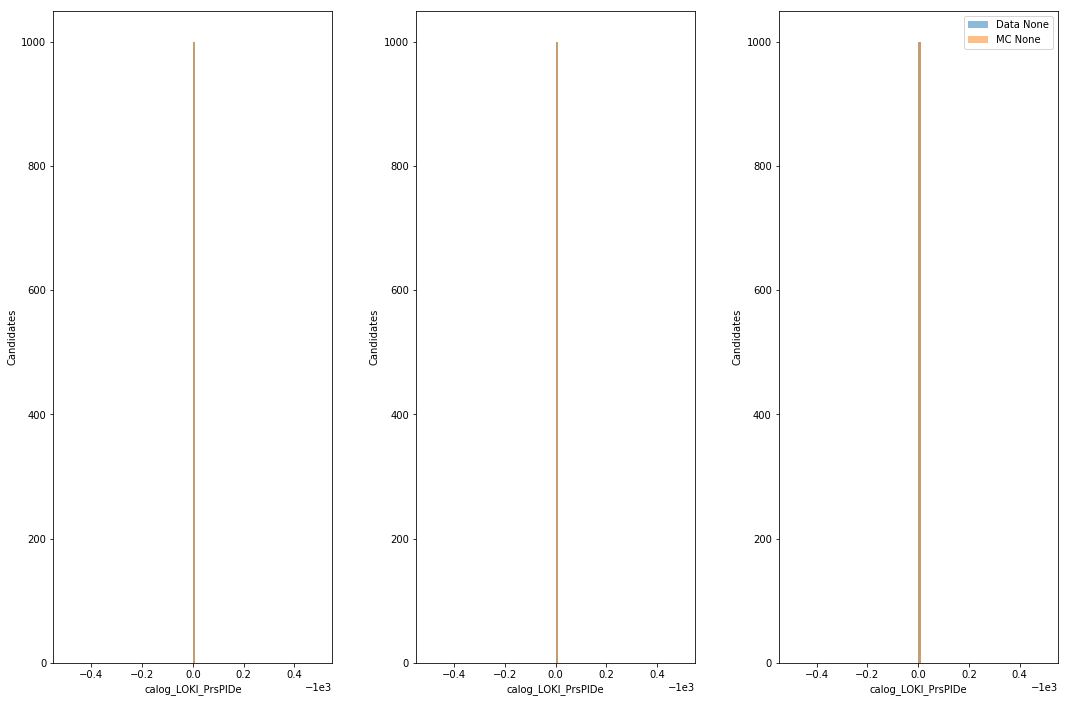

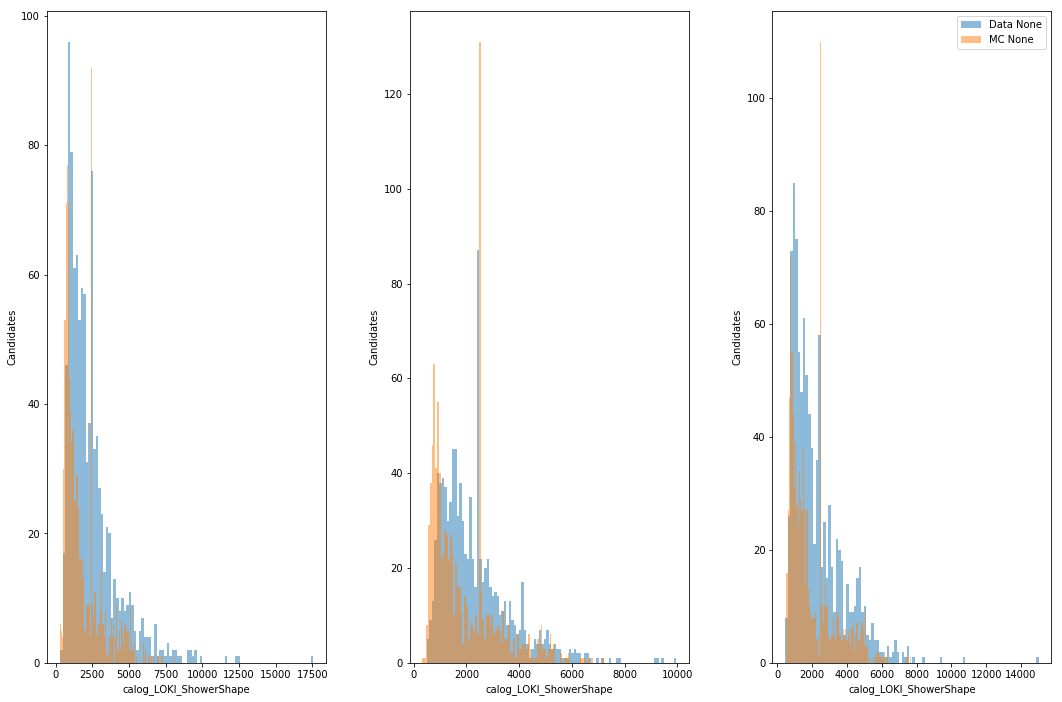

In [20]:
# Plot calo variables
for m in range(len(caloVars)):
    fig, axes = plt.subplots(1, 3, figsize=(18, 12))
    for n, t in enumerate(topos):
        vname = caloVars[m].replace('calog','photon')
        if t=='None':
            vname = caloVars[m].replace('calog','photon1')
        h_mm_data = dsets[n].sample(n=1000).hist(column=[vname], ax=axes[n], label = "Data %s" % t
                                                   , bins = 100, alpha=0.5)
        h_mm_mc = dsets_mc[n].sample(n=1000).hist(column=[vname], ax=axes[n], label = "MC %s" % t
                                                   , bins = 100, alpha=0.5)
        prepPlot(axes[n], caloVars[m], "Candidates")
        plt.legend()
    plt.show()

/Users/sbenson/anaconda3/envs/testenv/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


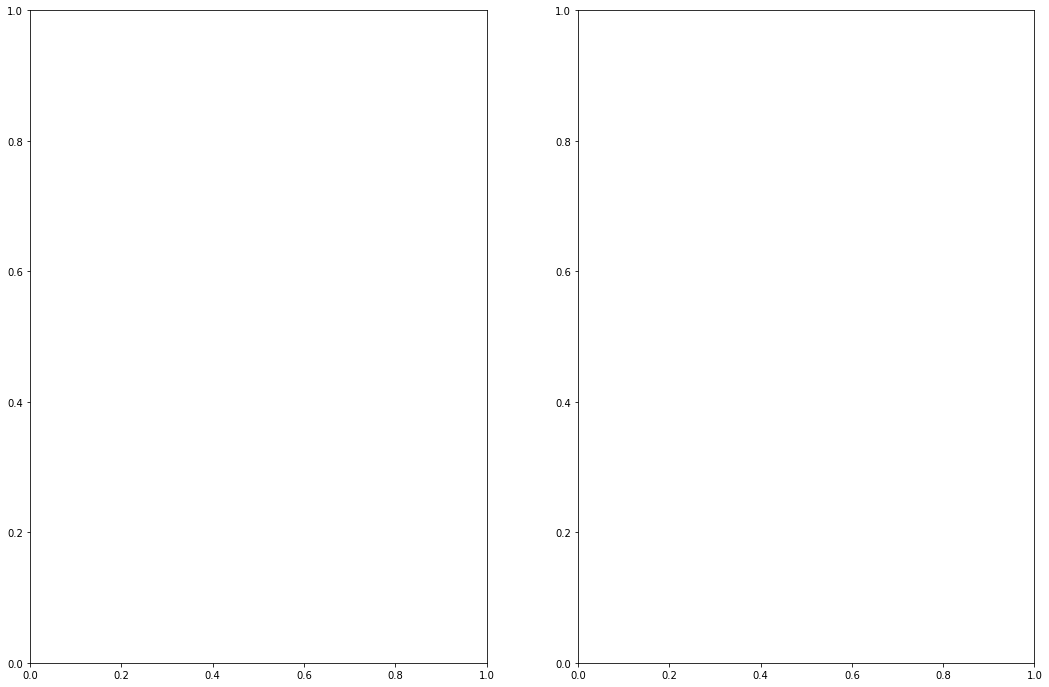

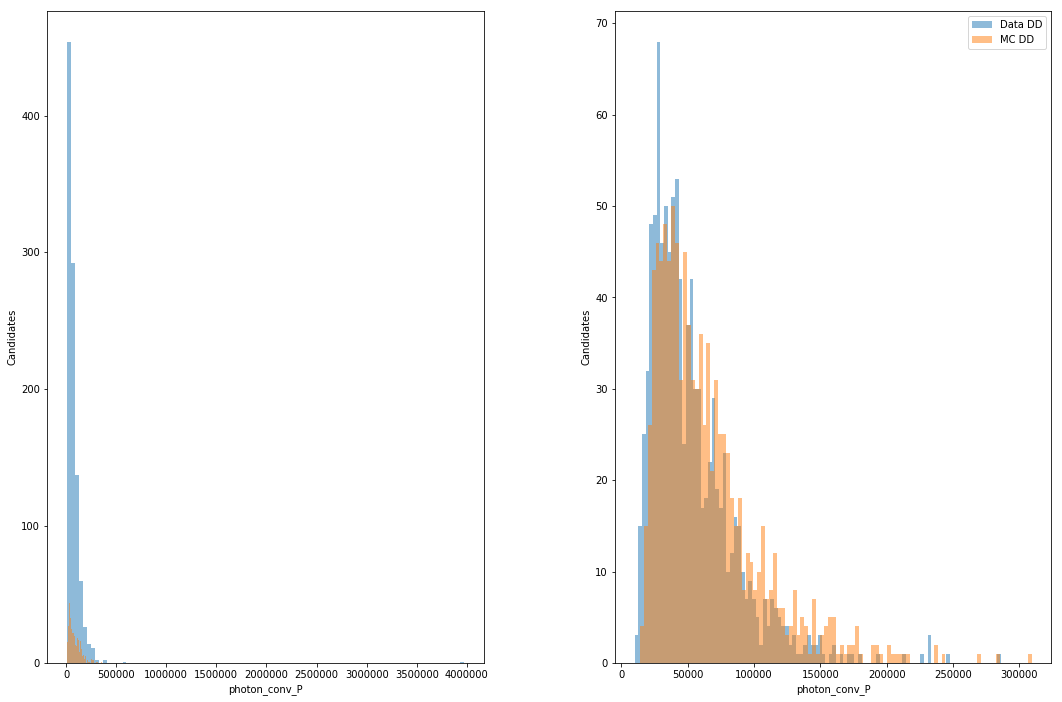

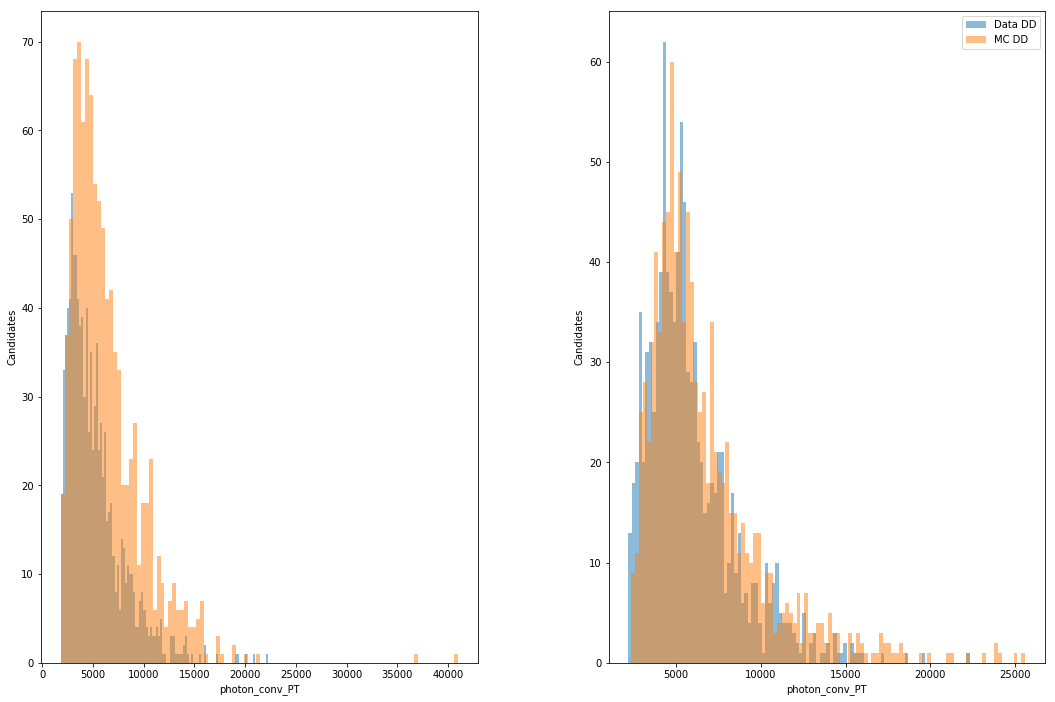

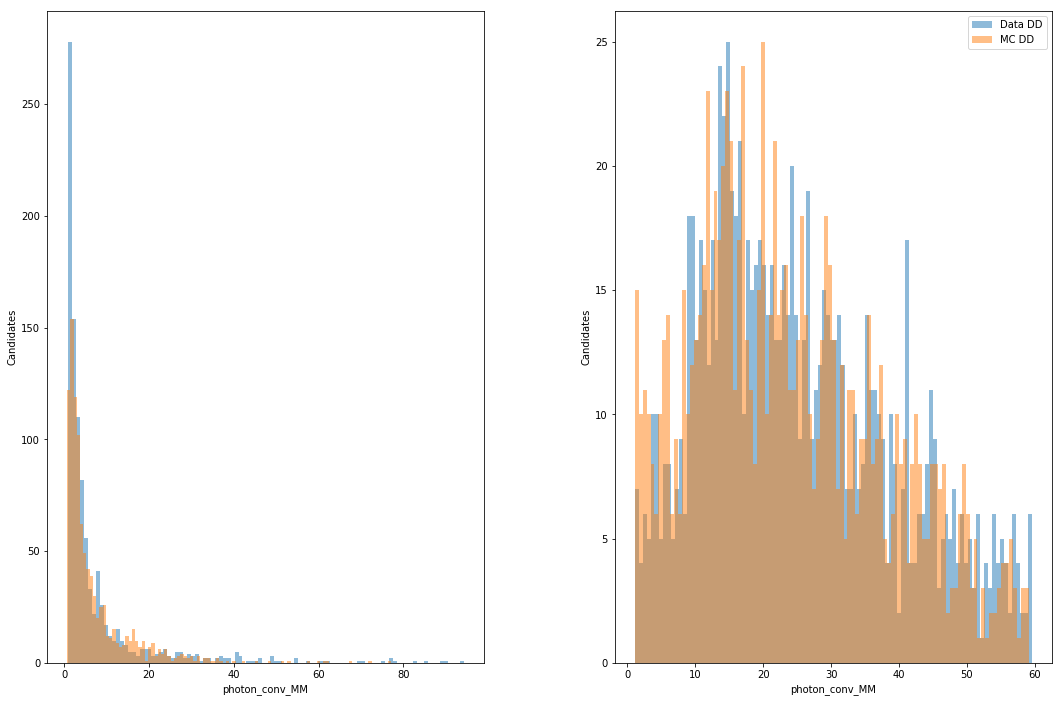

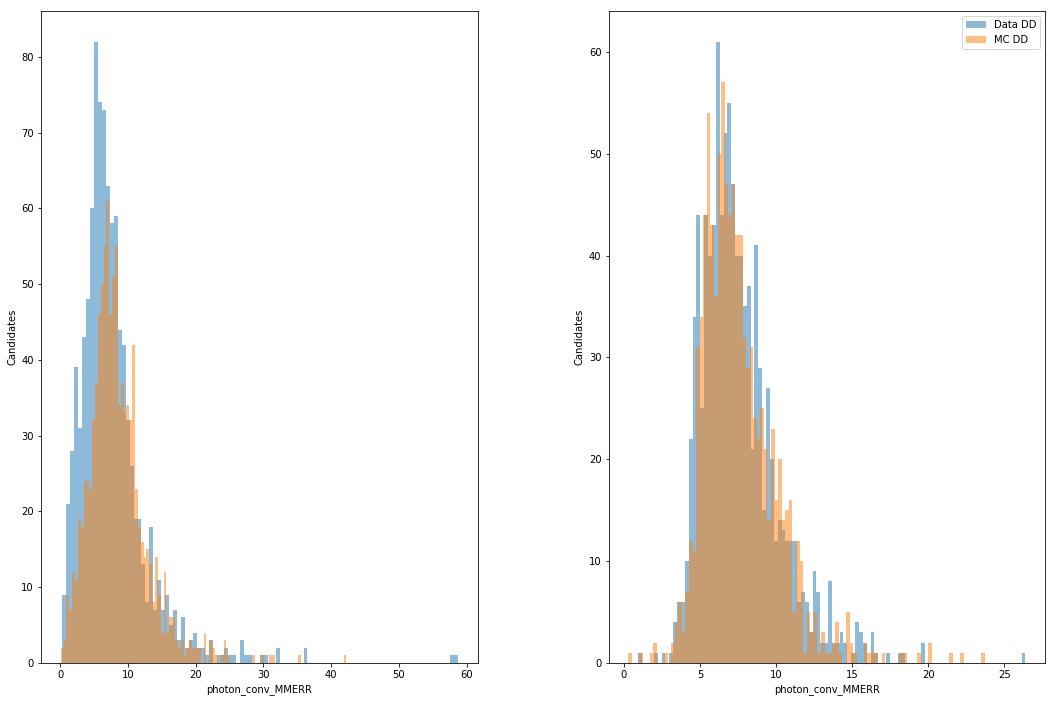

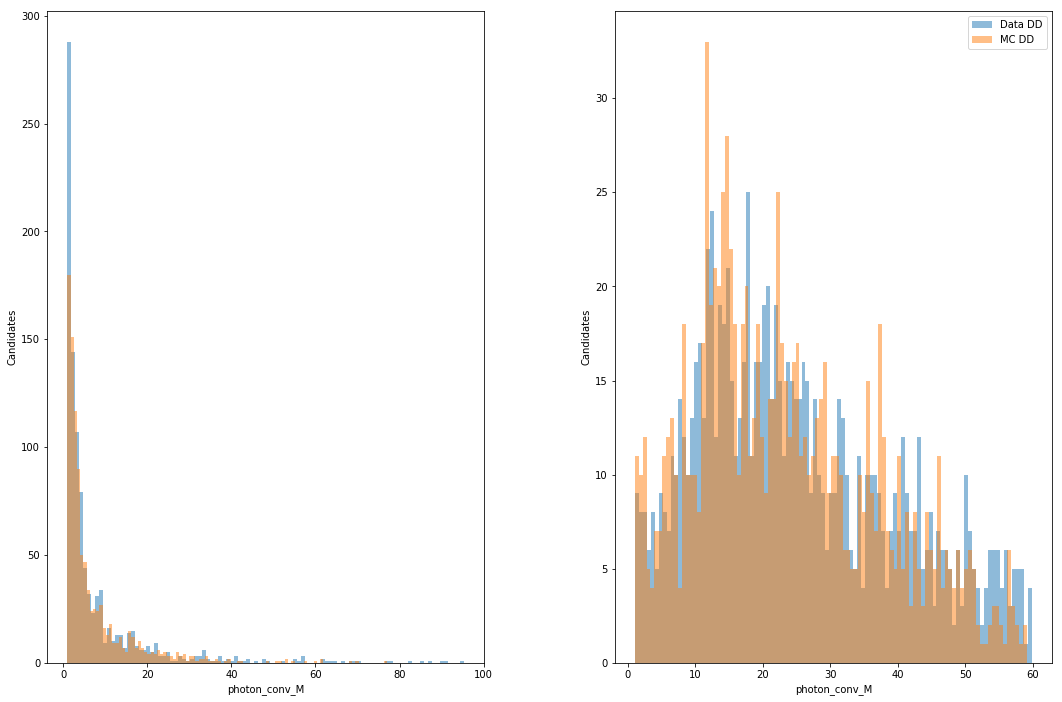

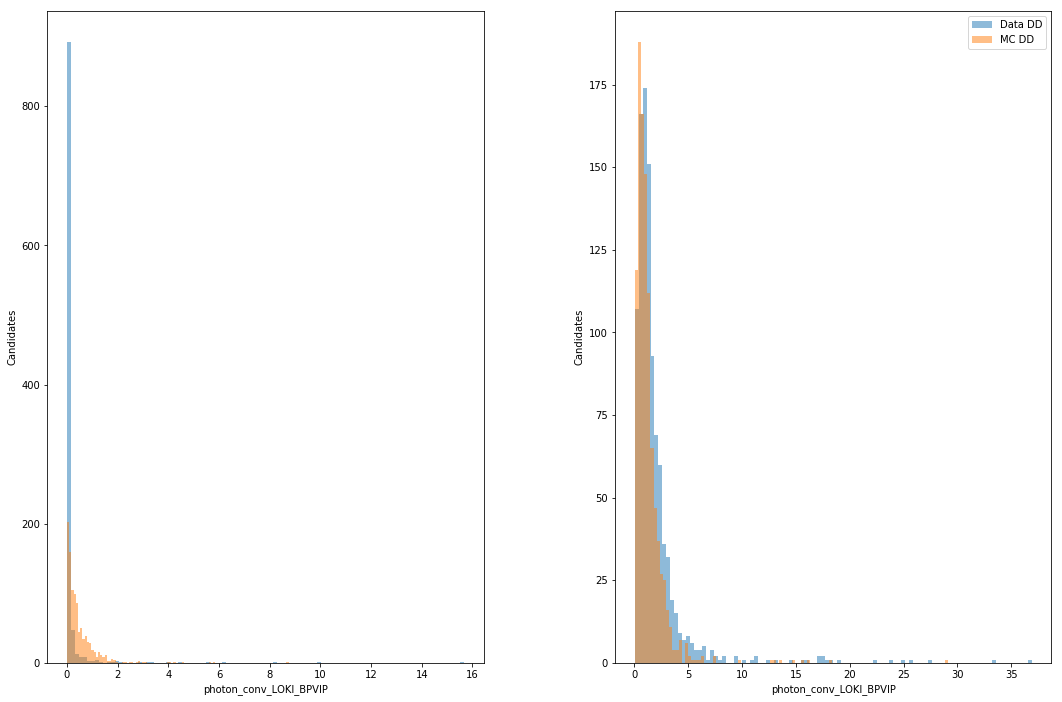

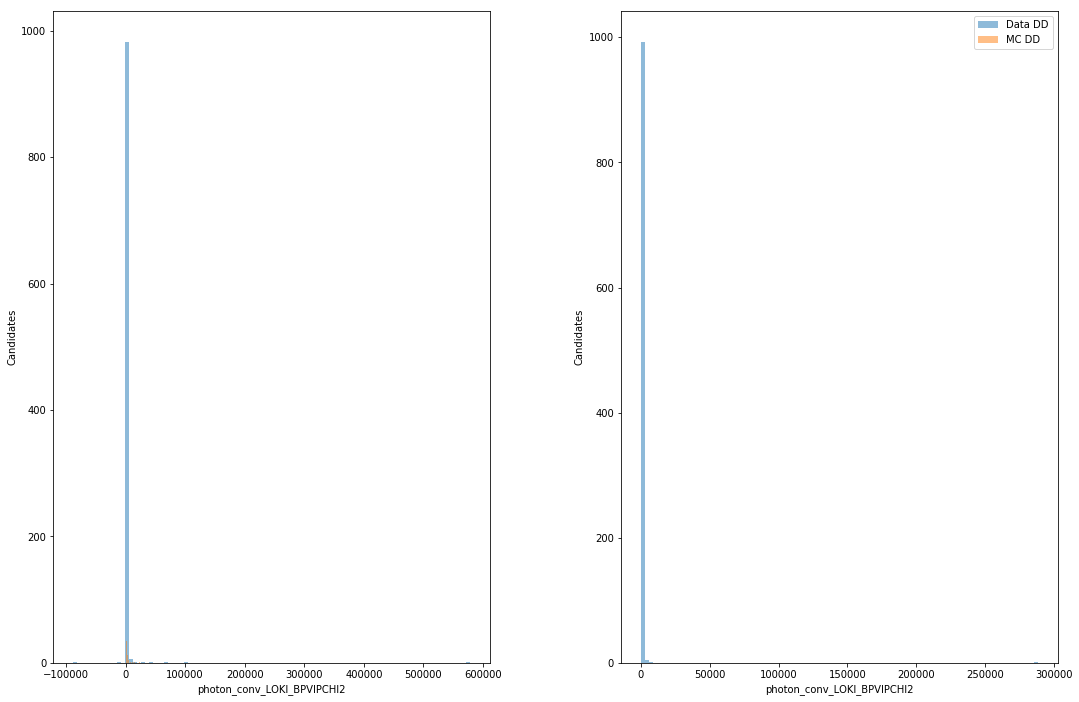

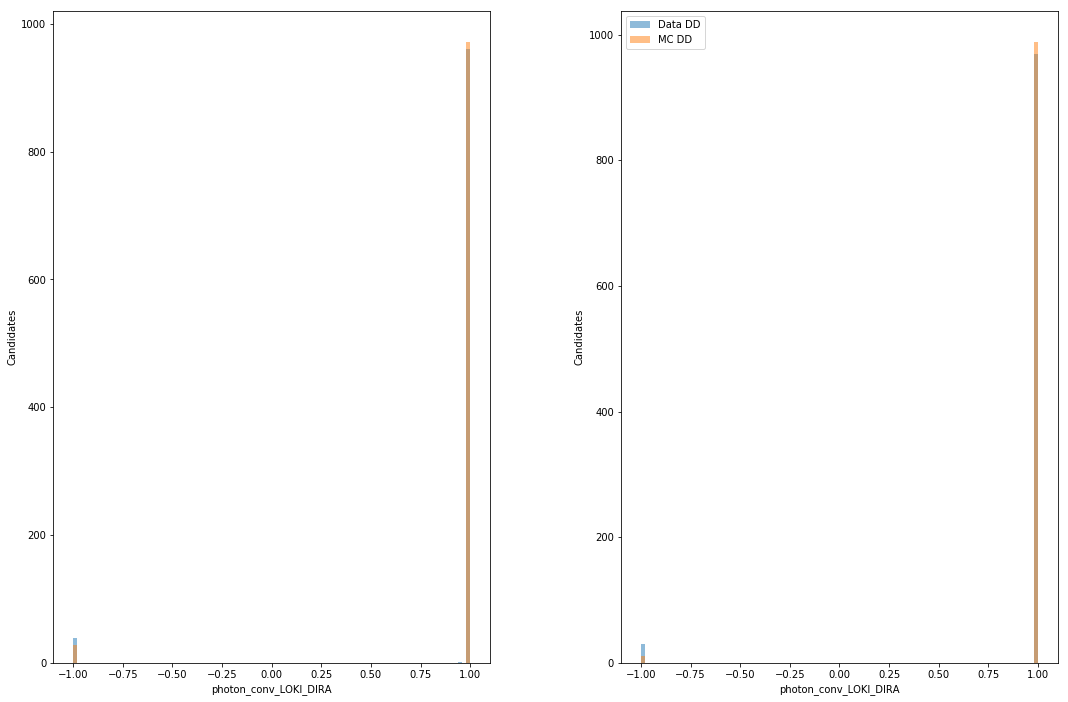

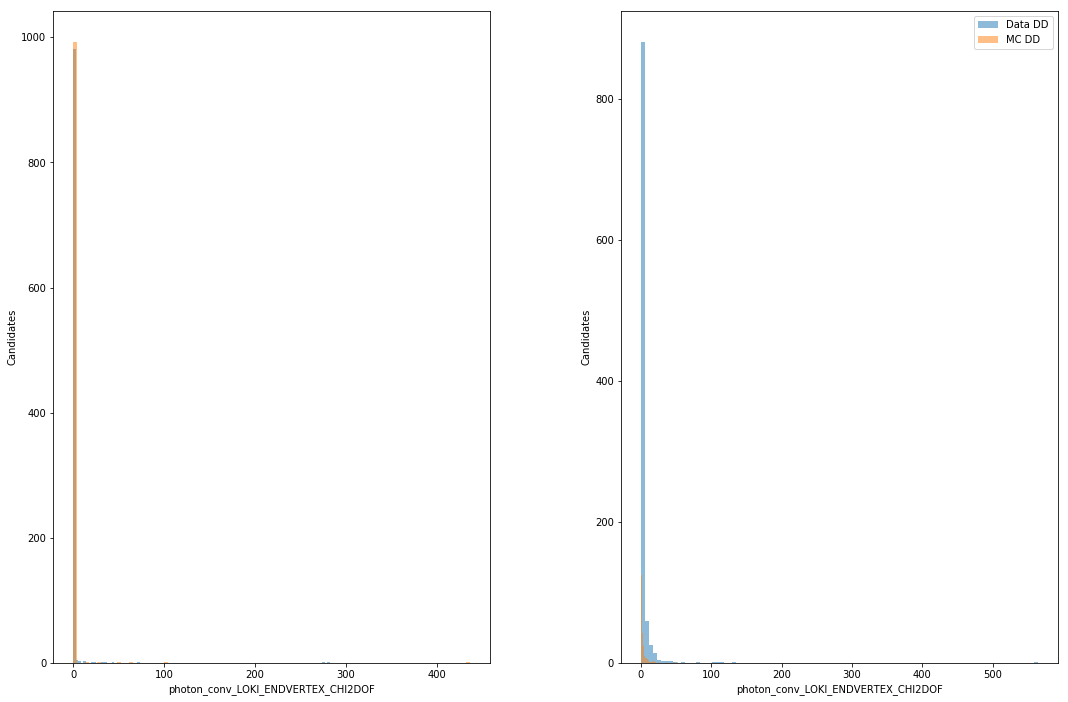

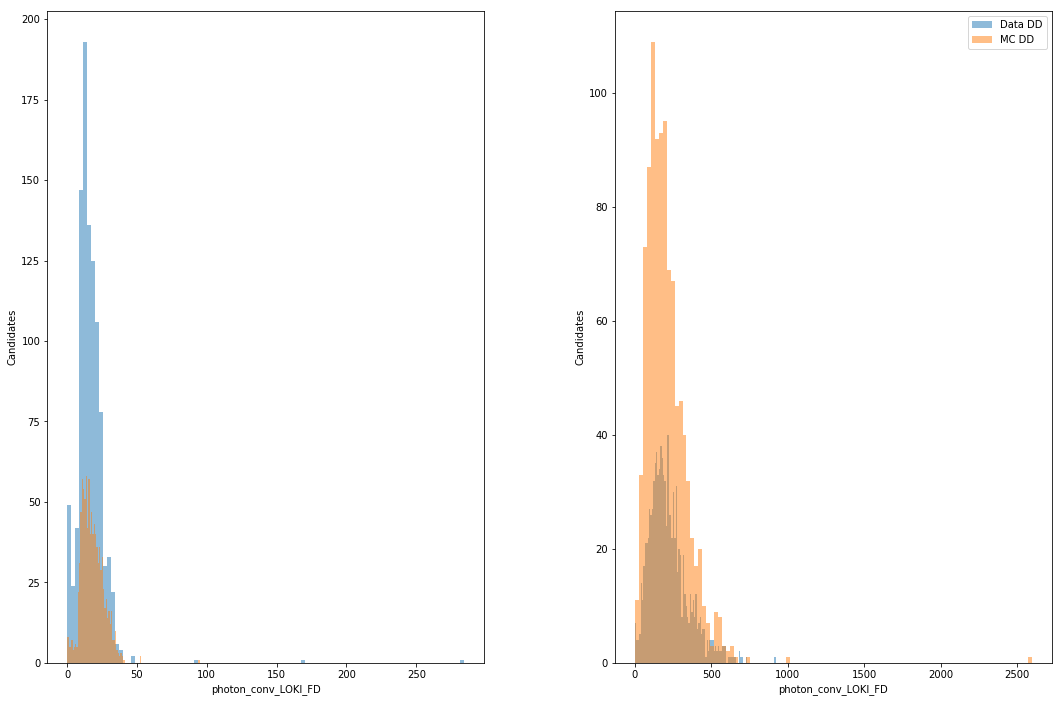

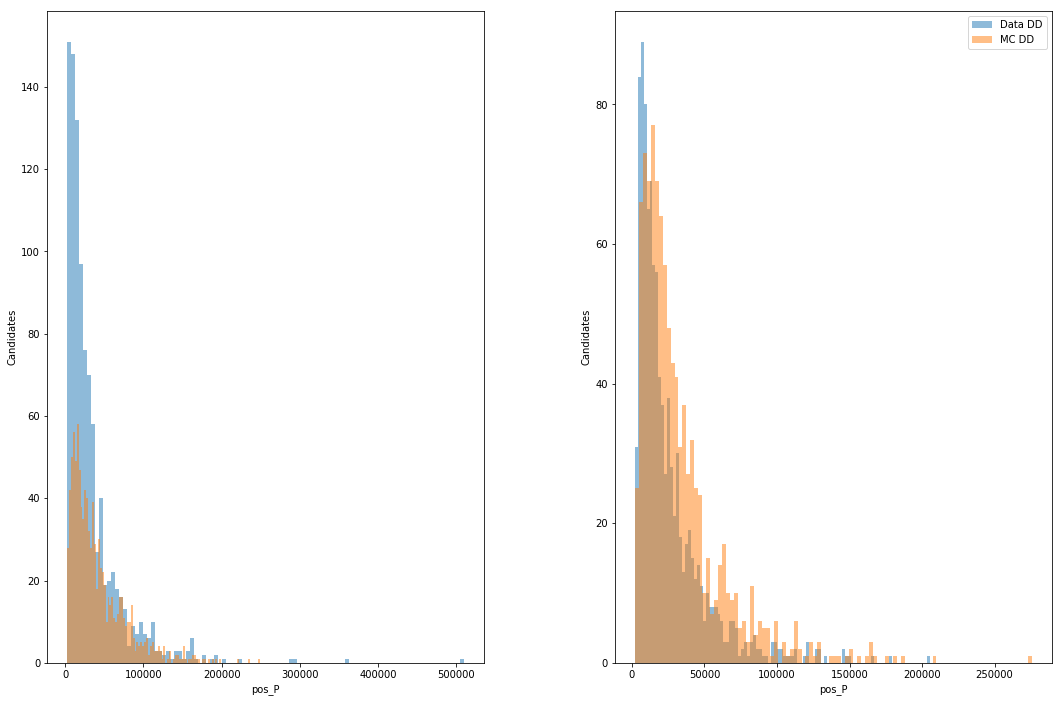

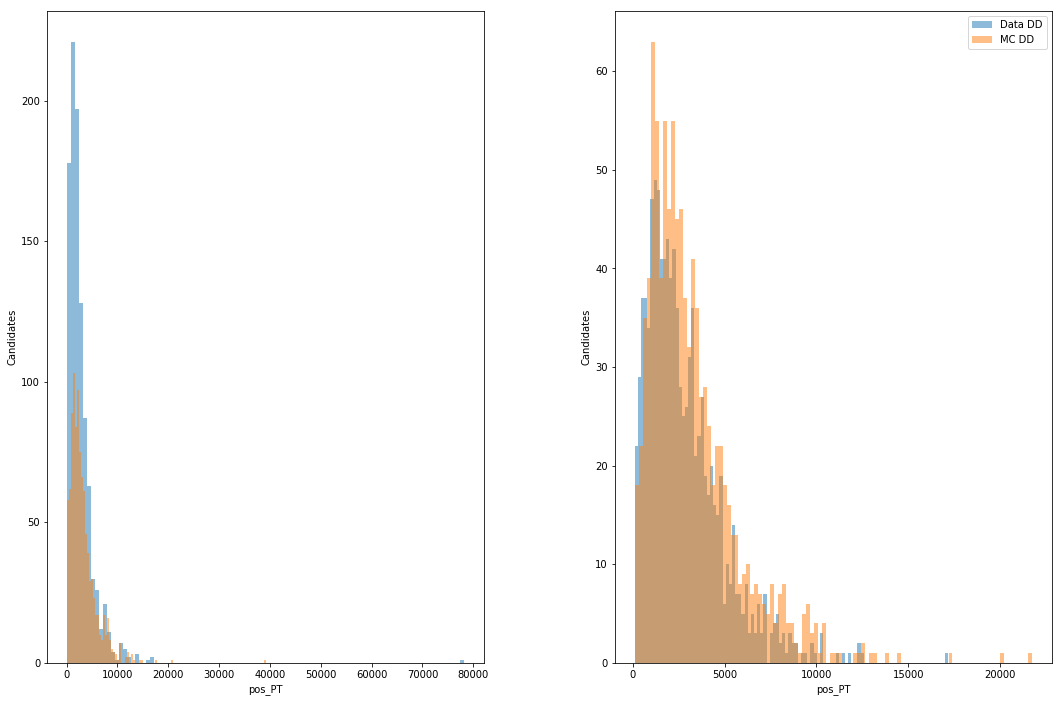

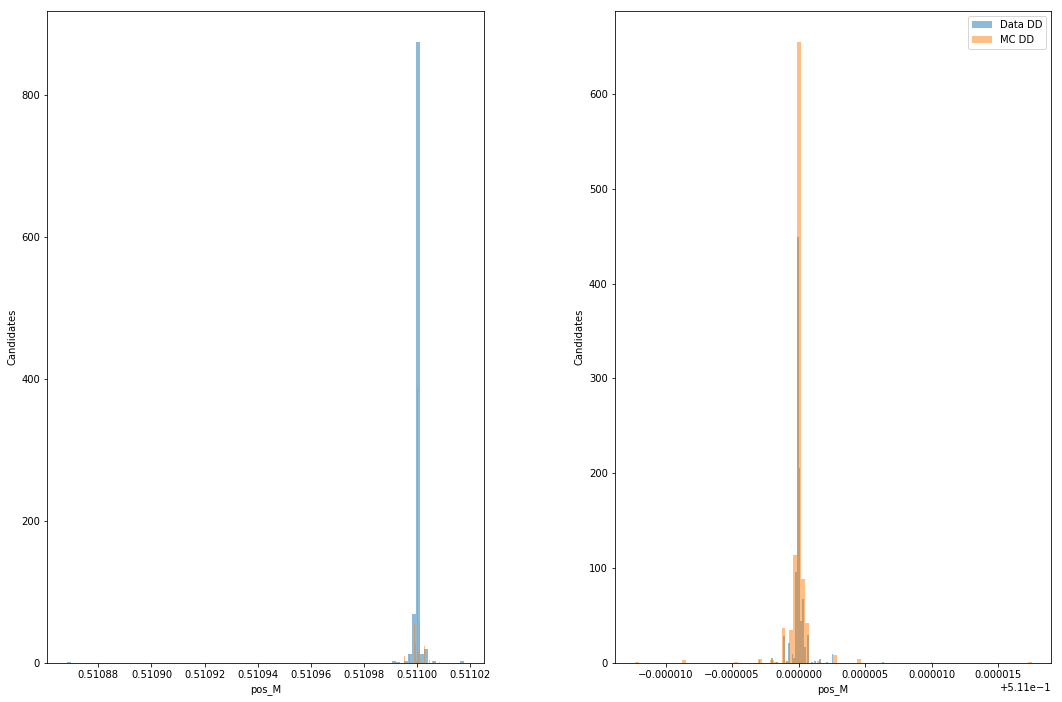

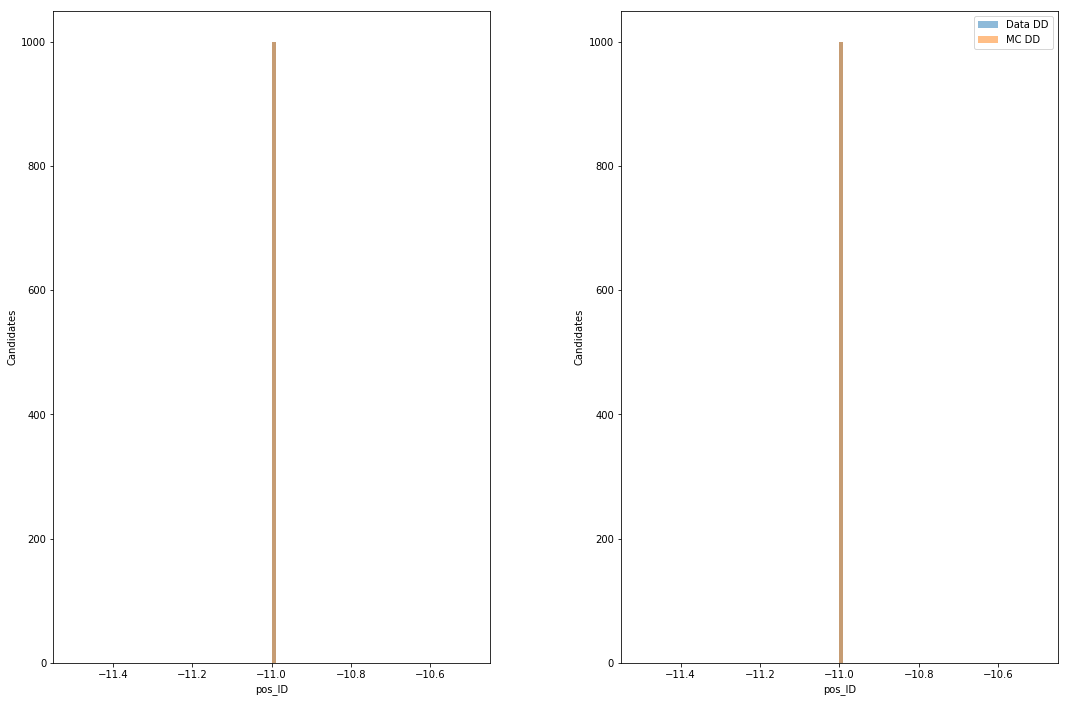

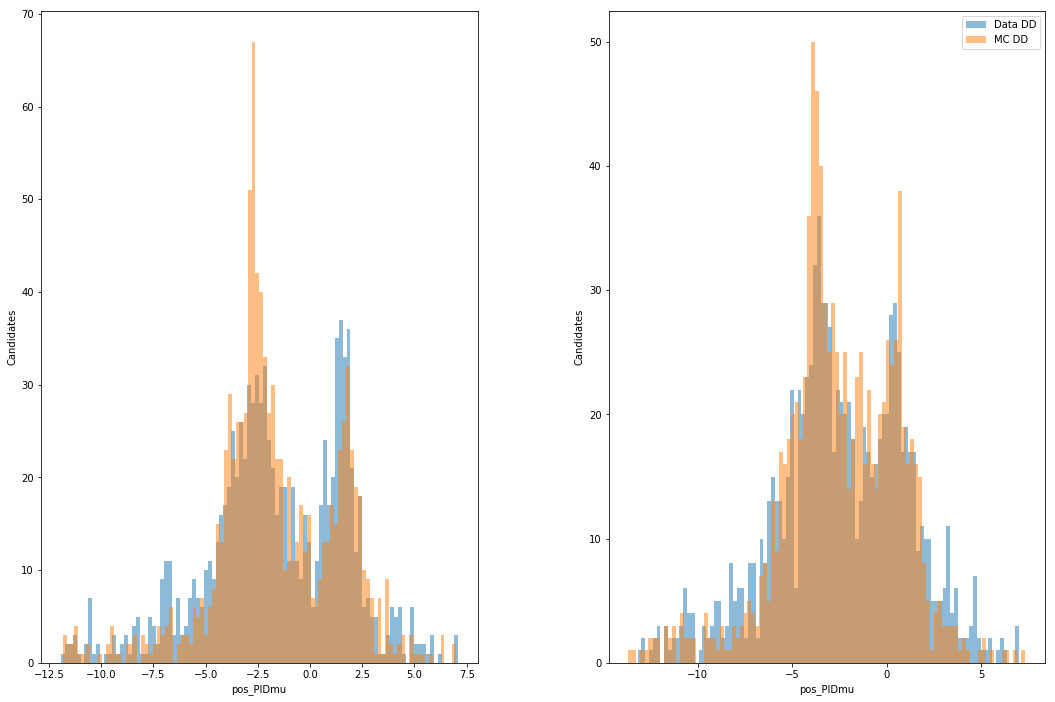

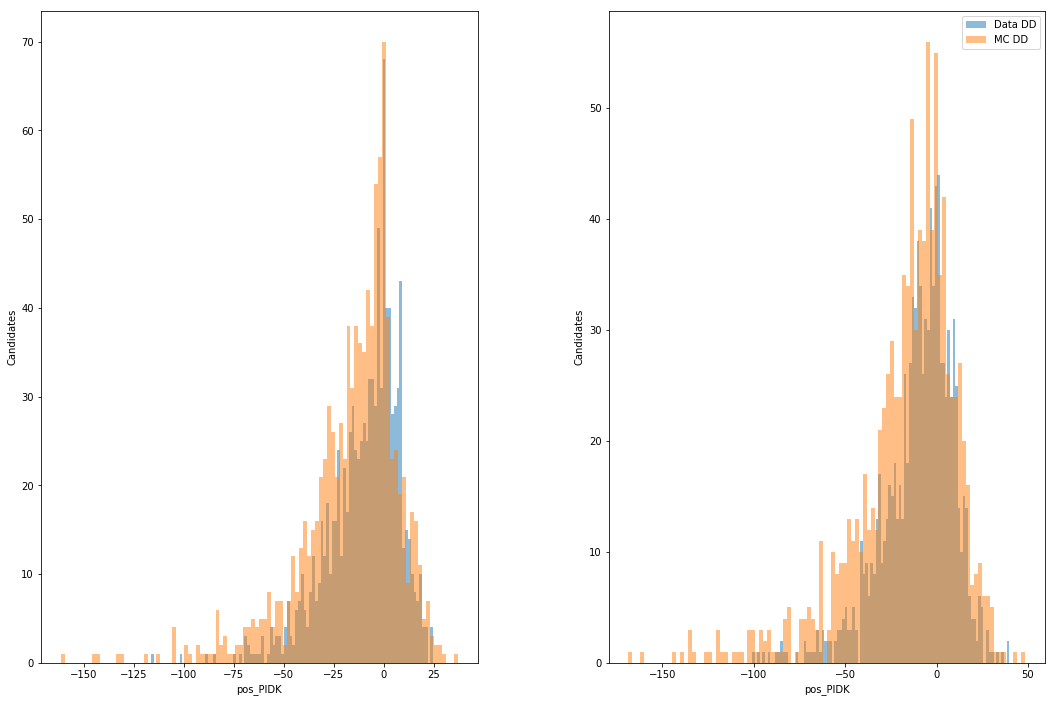

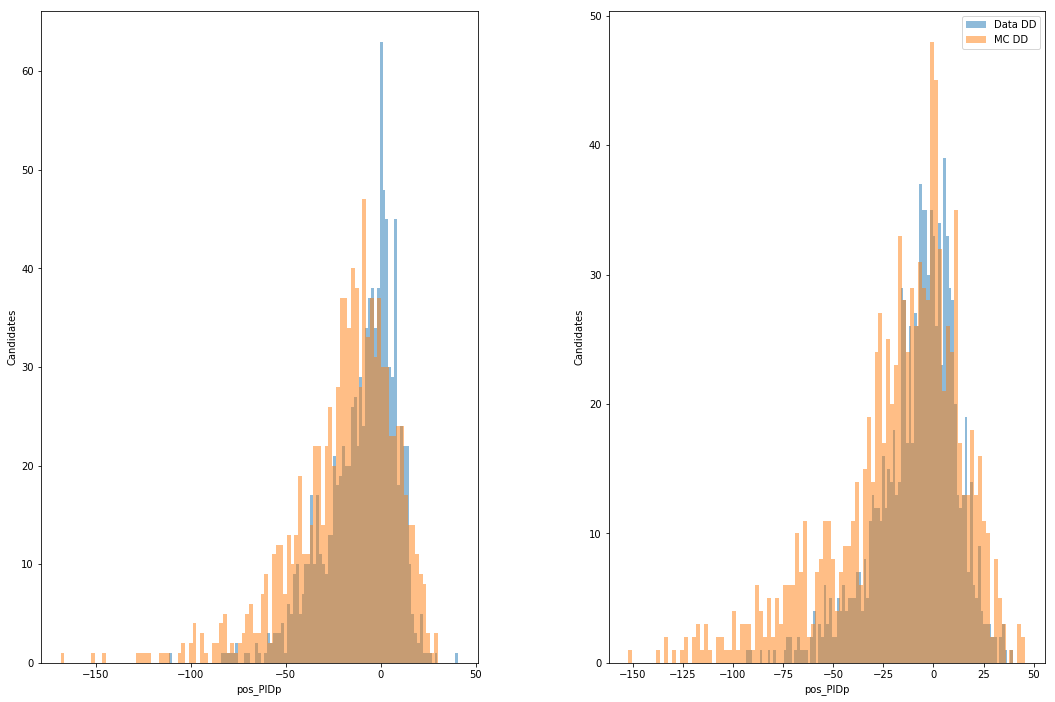

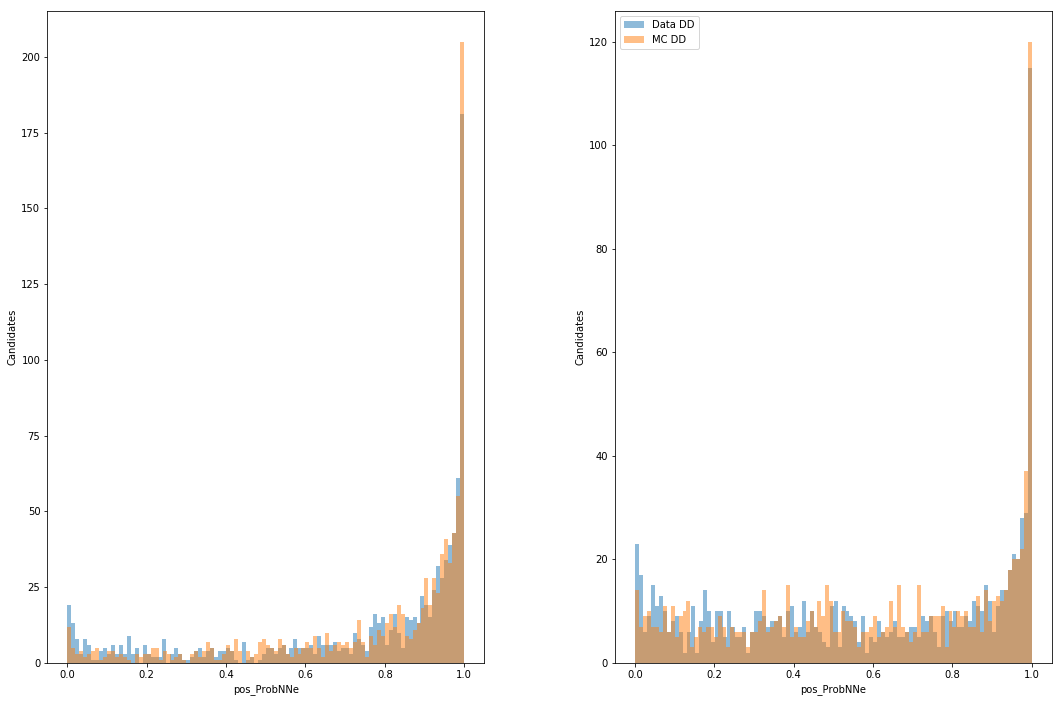

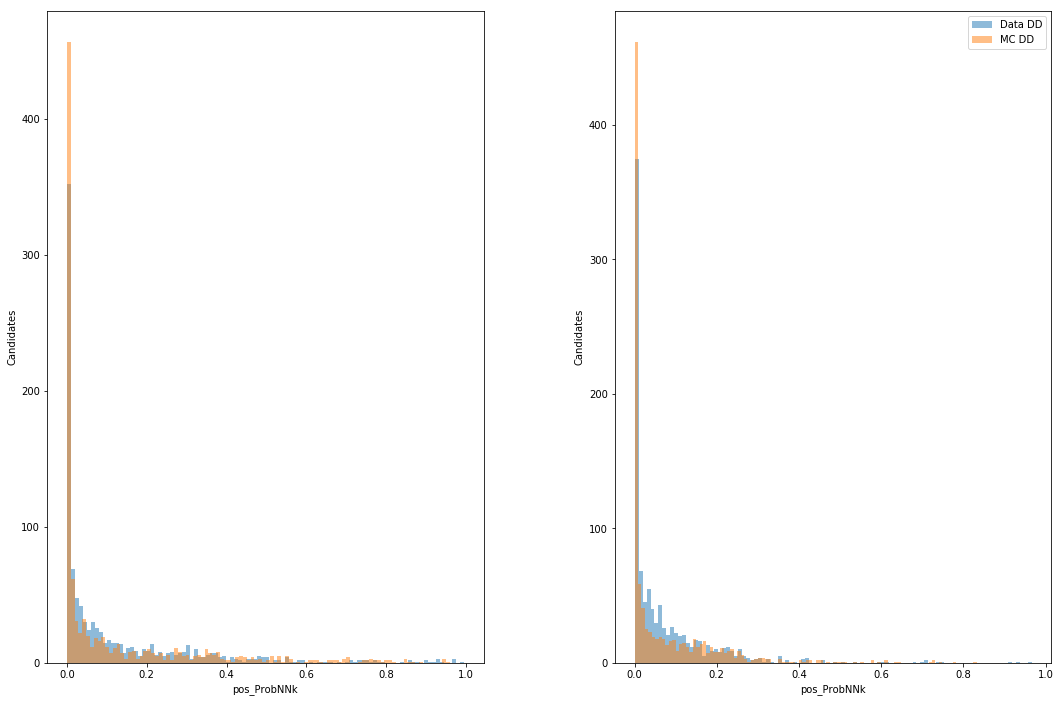

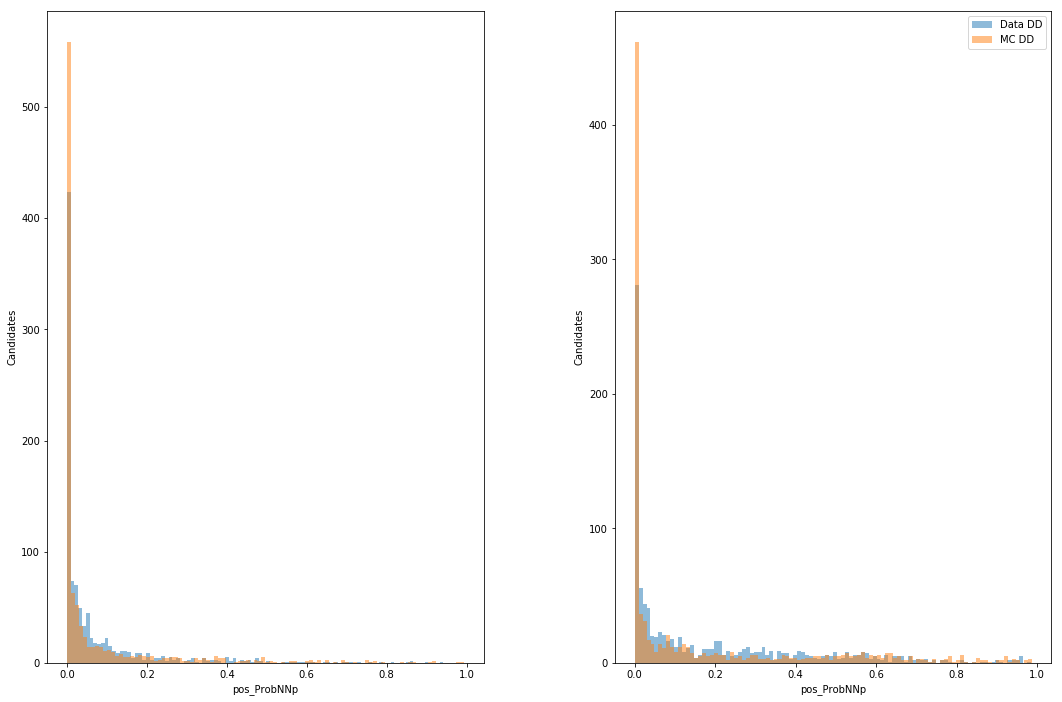

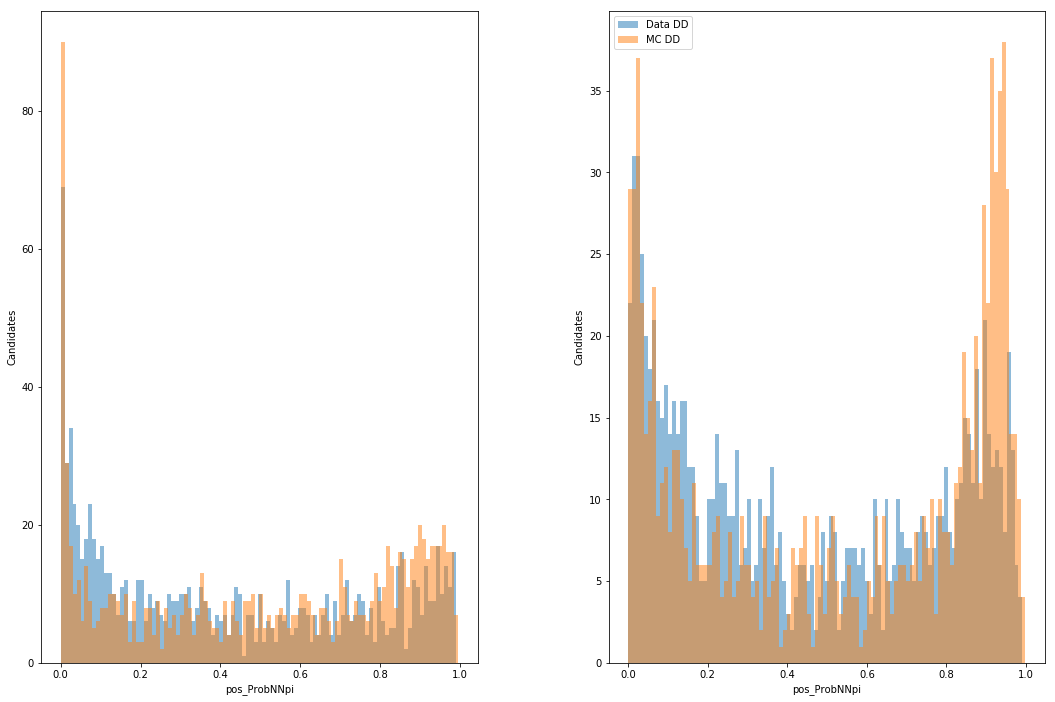

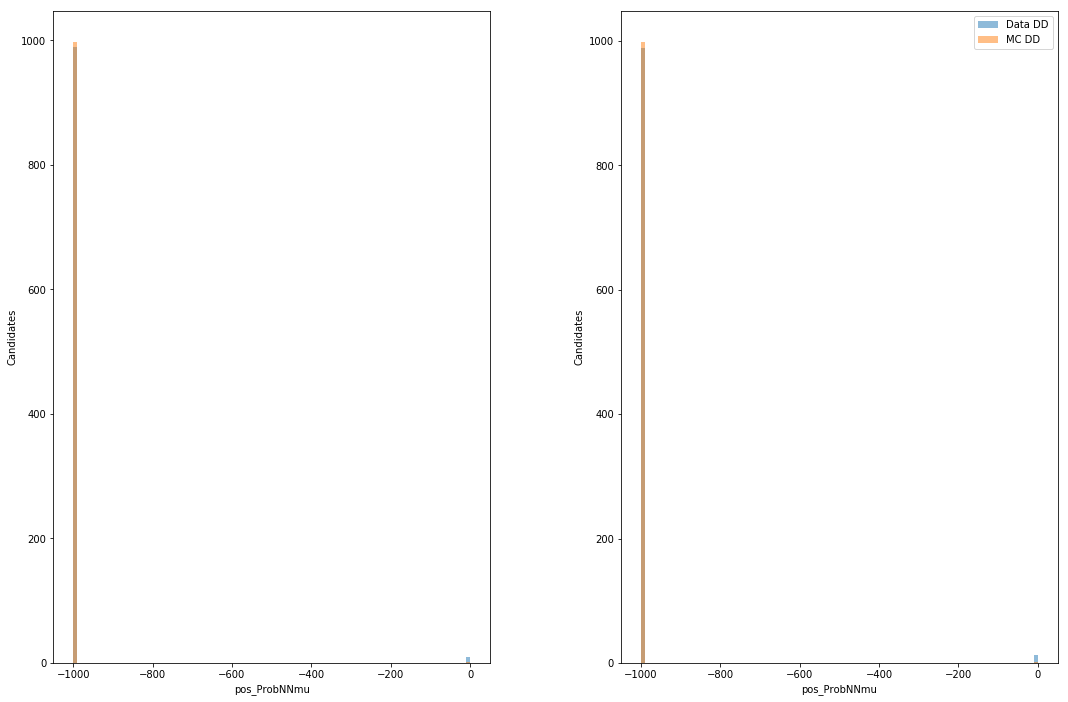

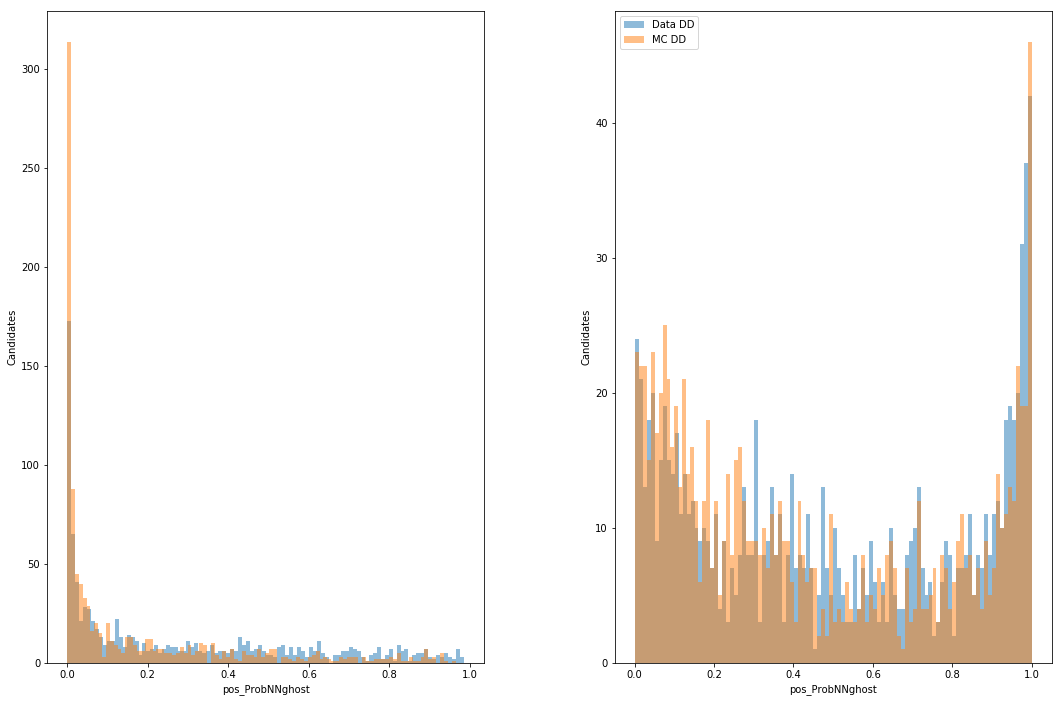

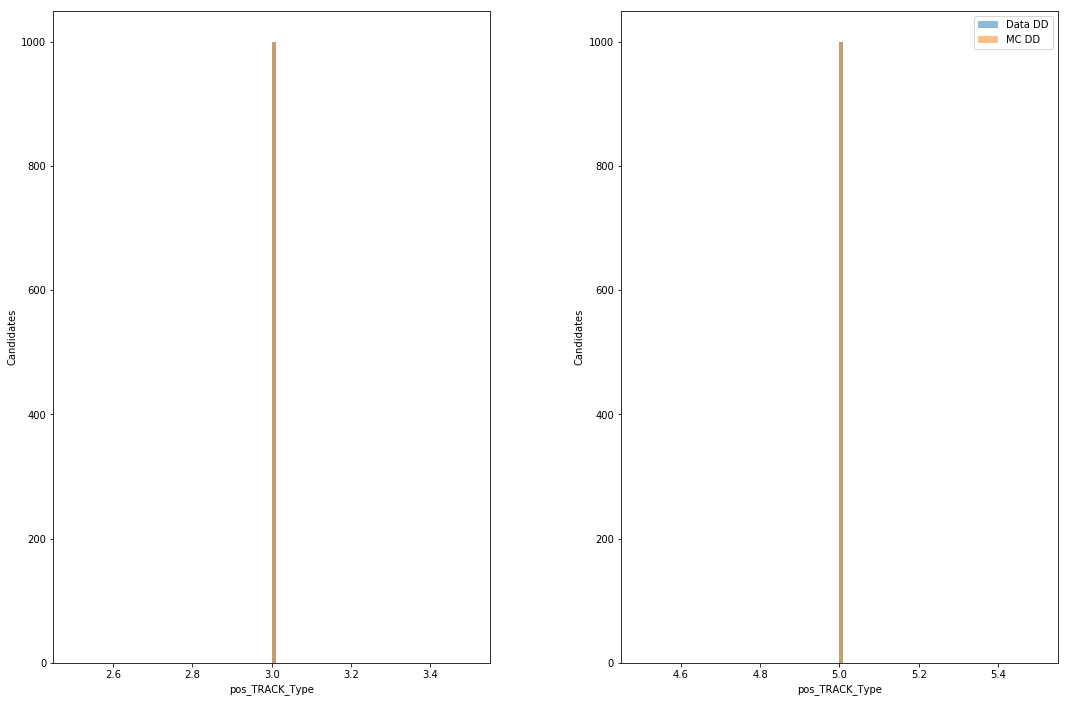

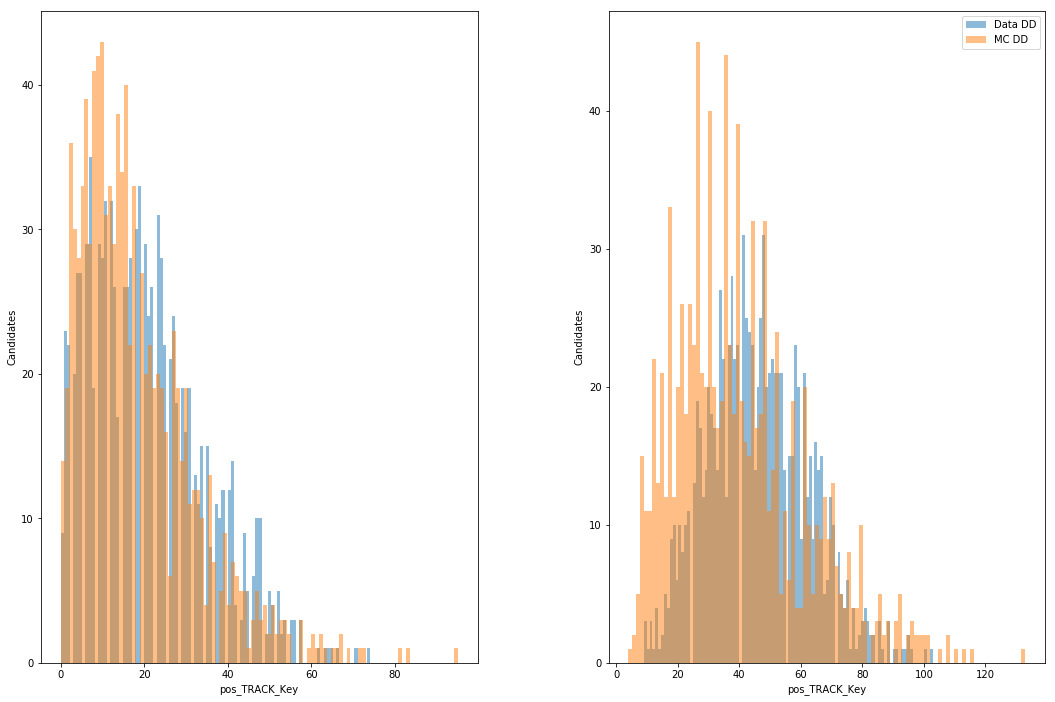

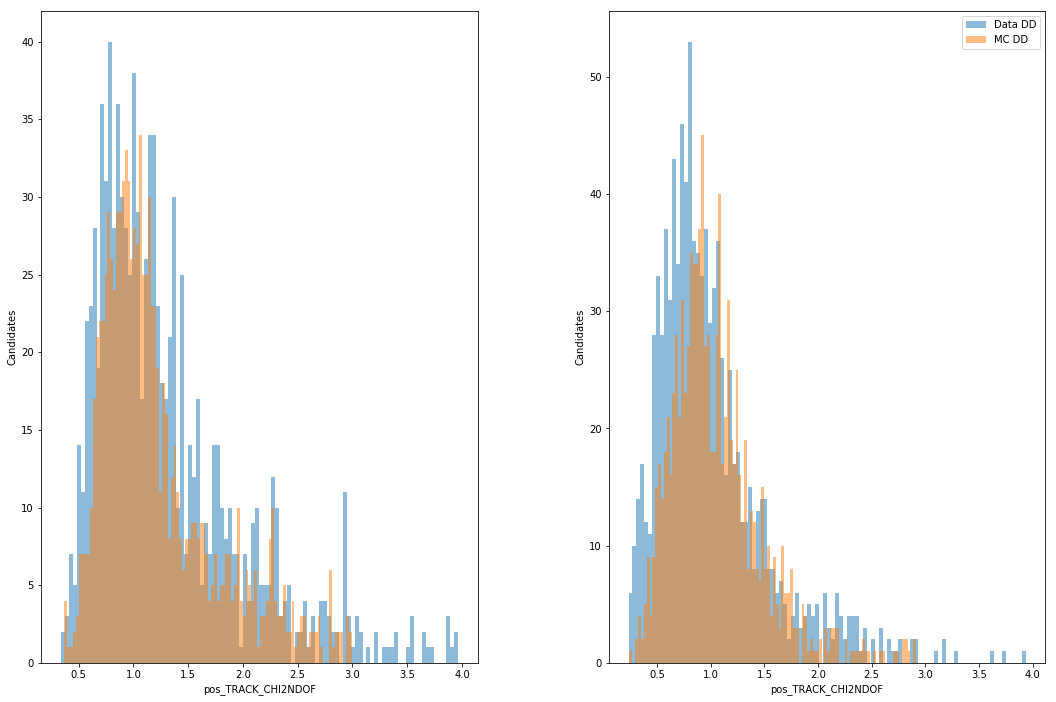

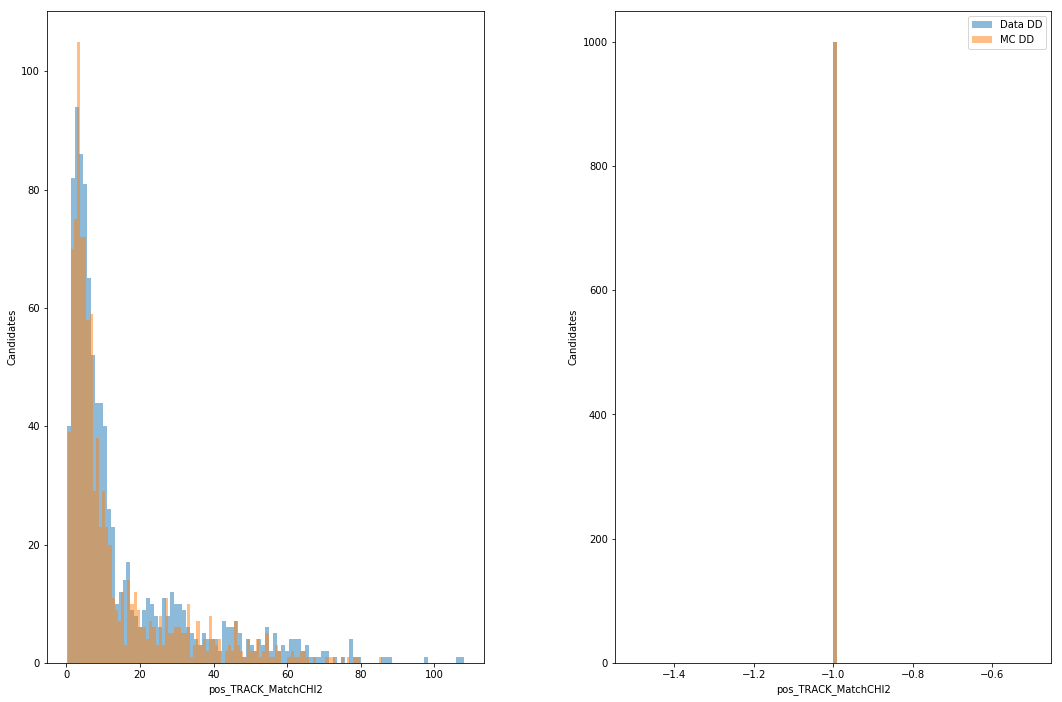

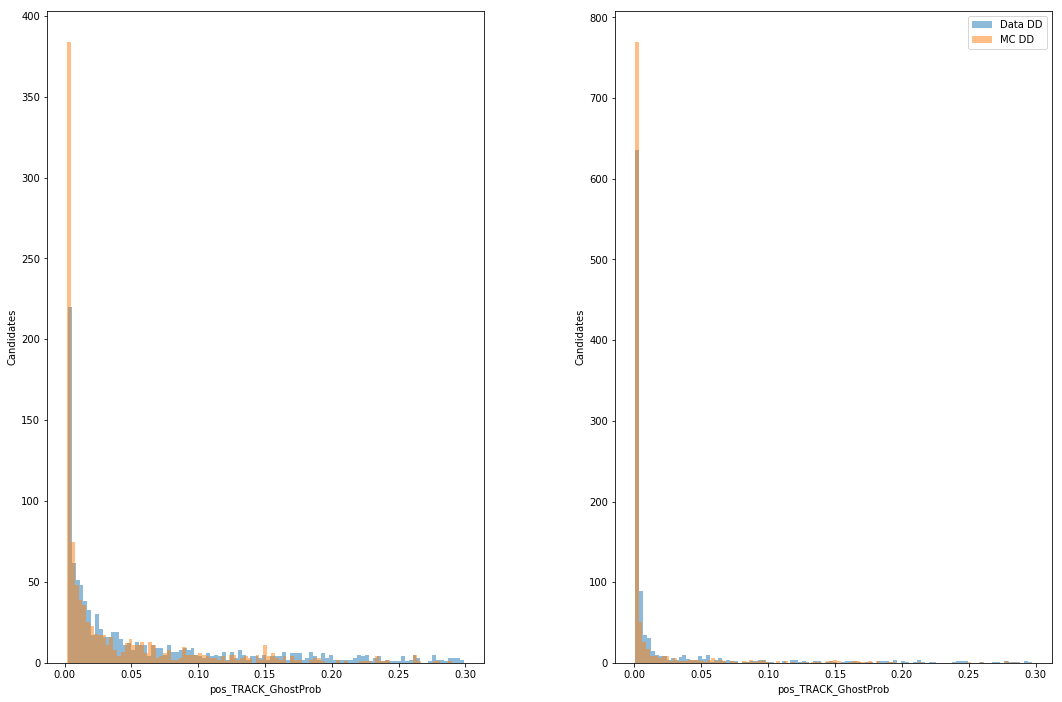

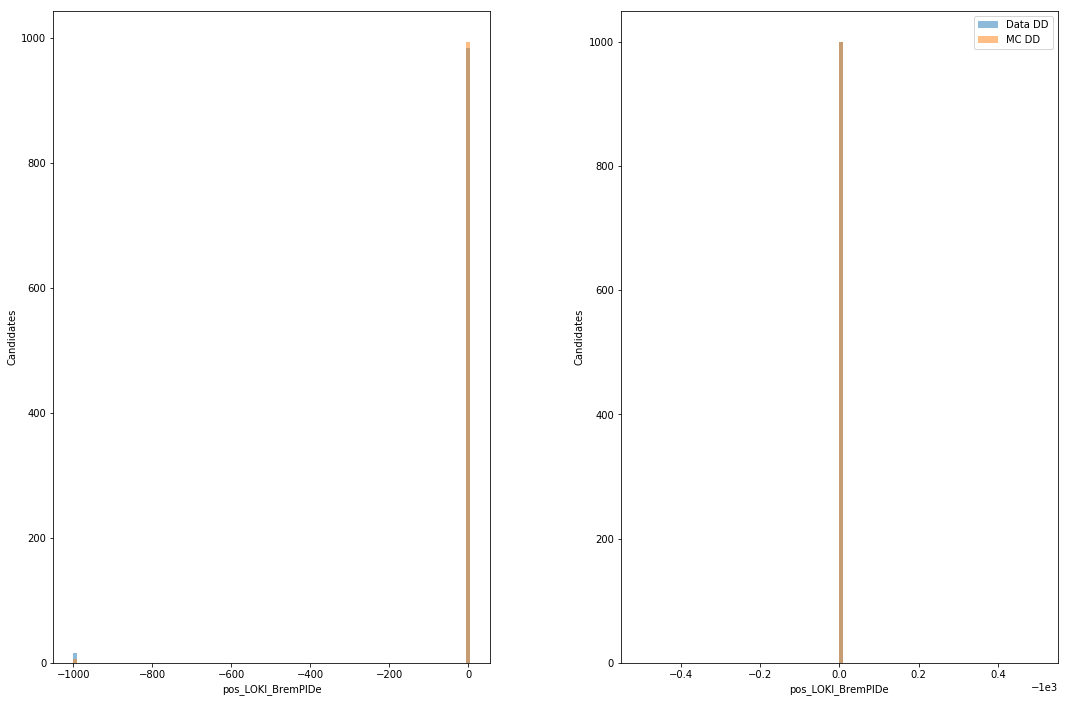

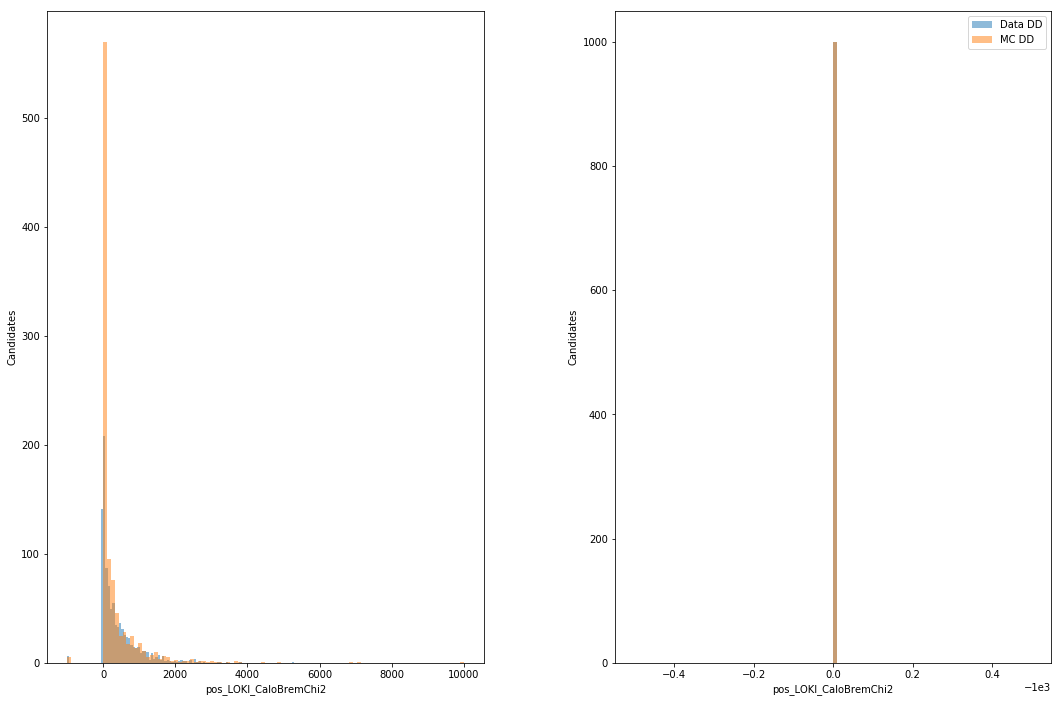

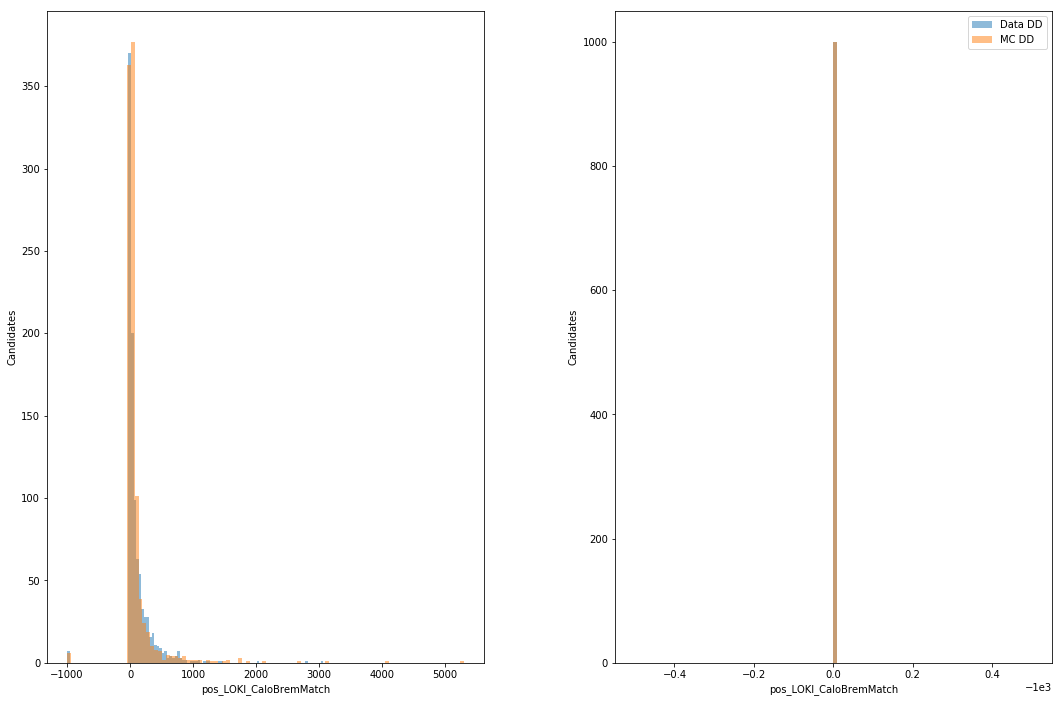

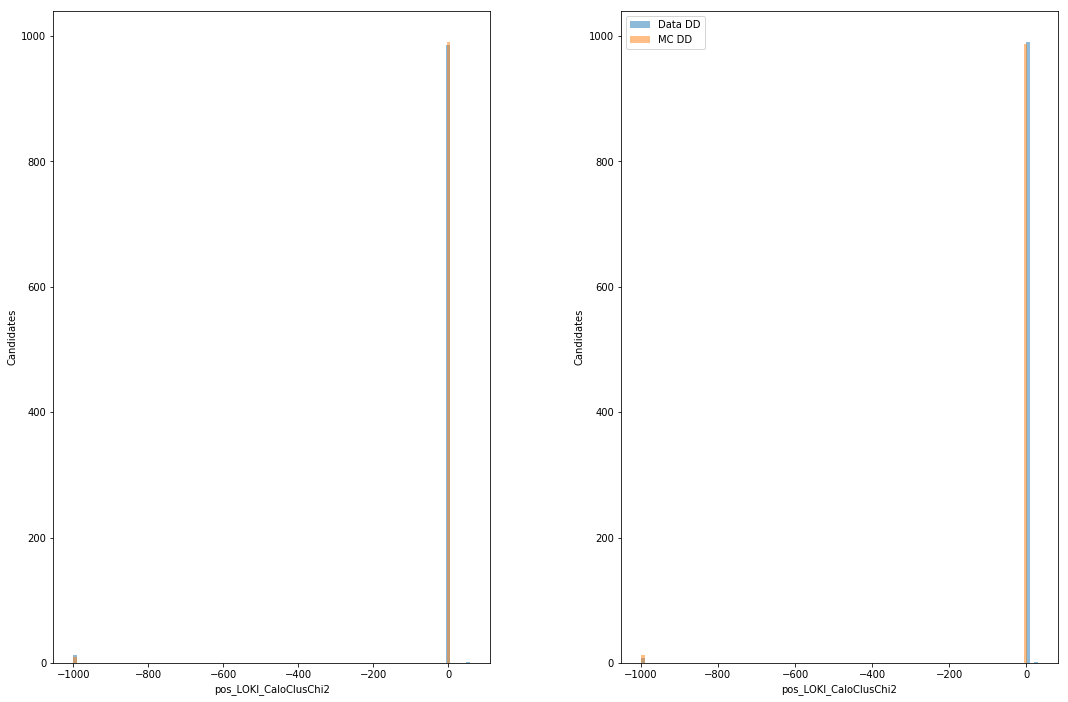

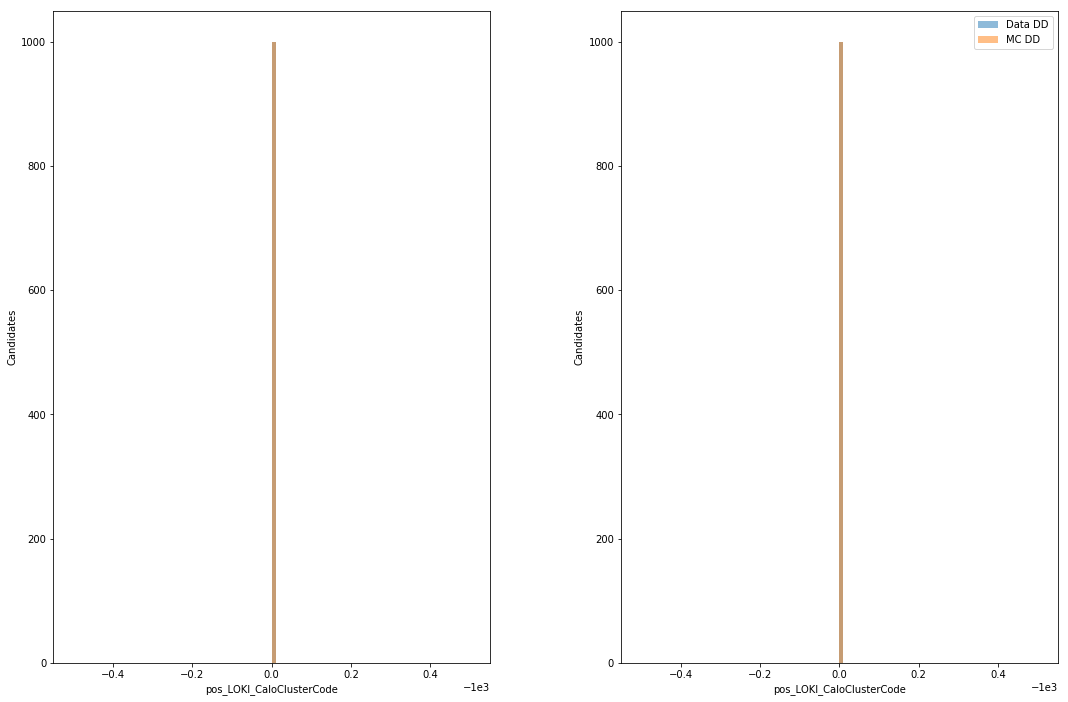

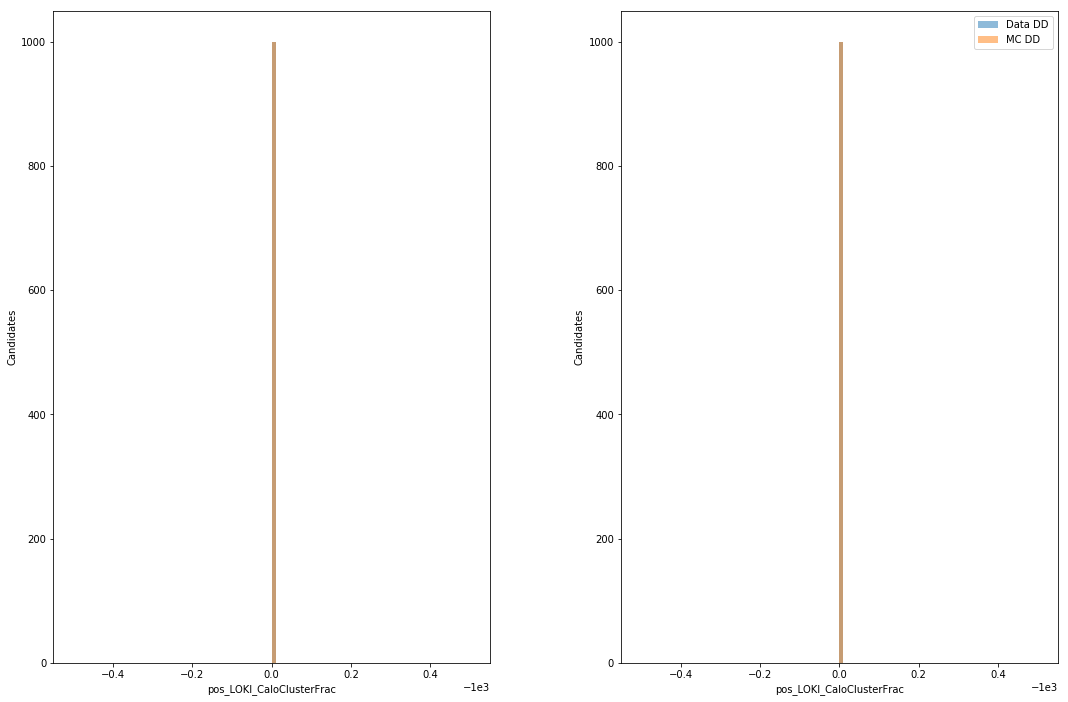

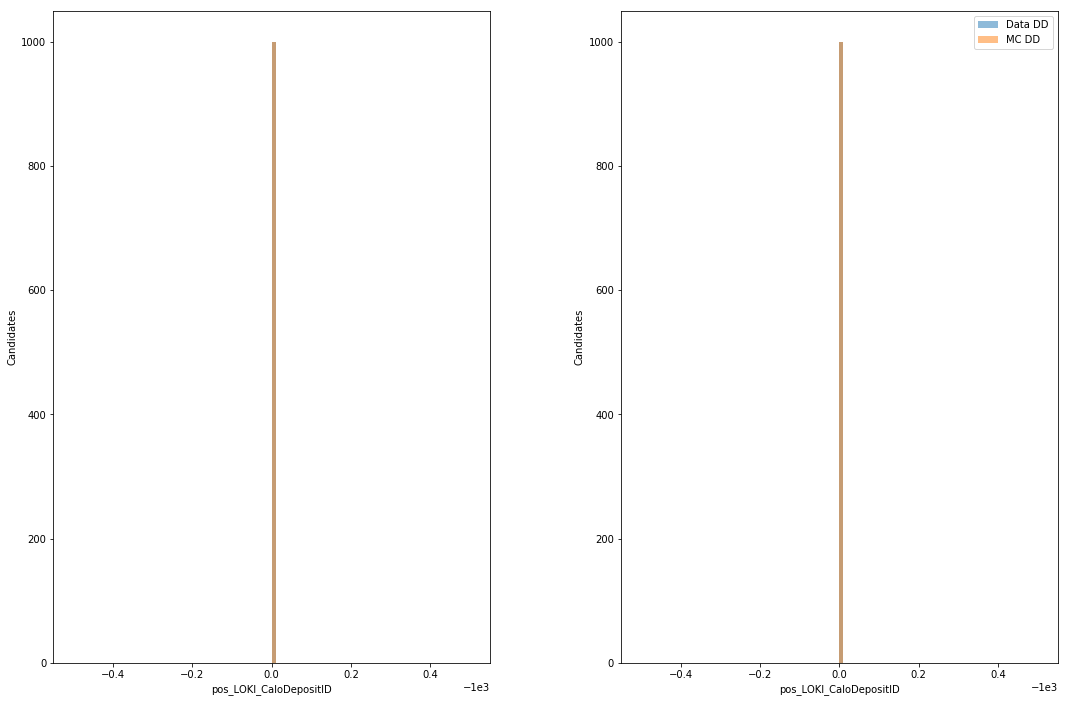

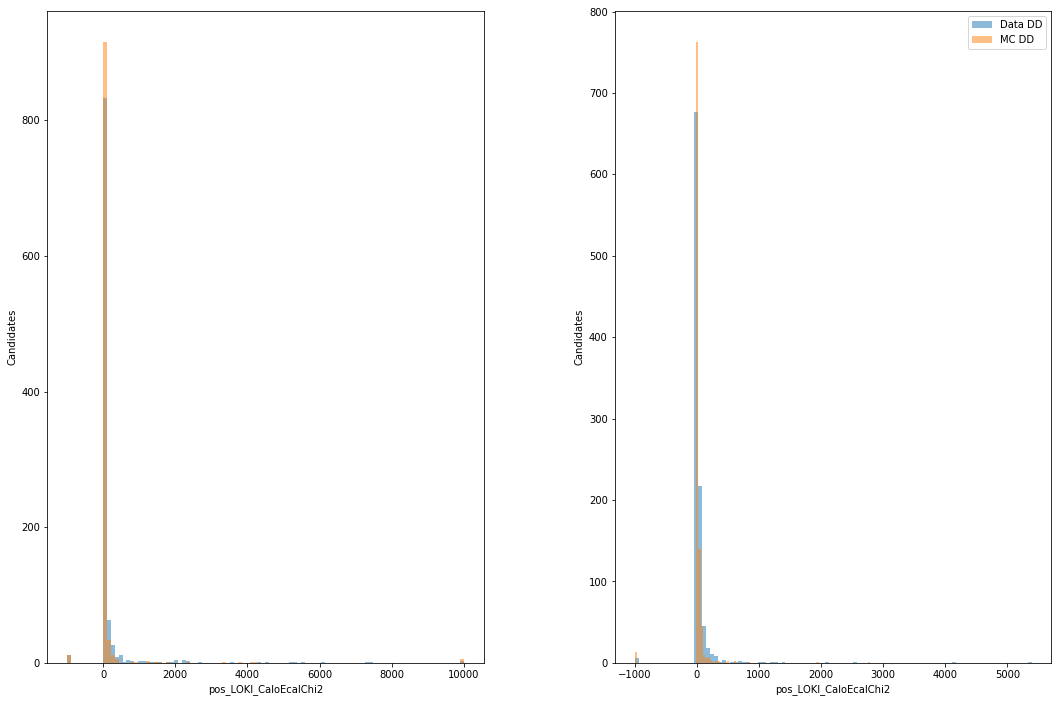

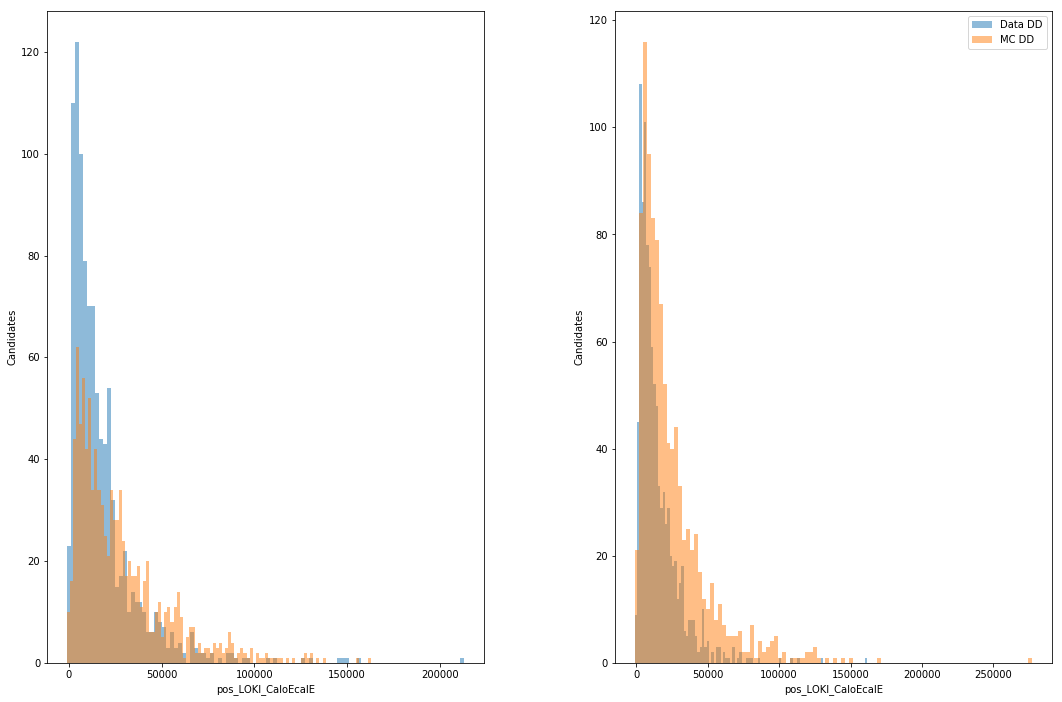

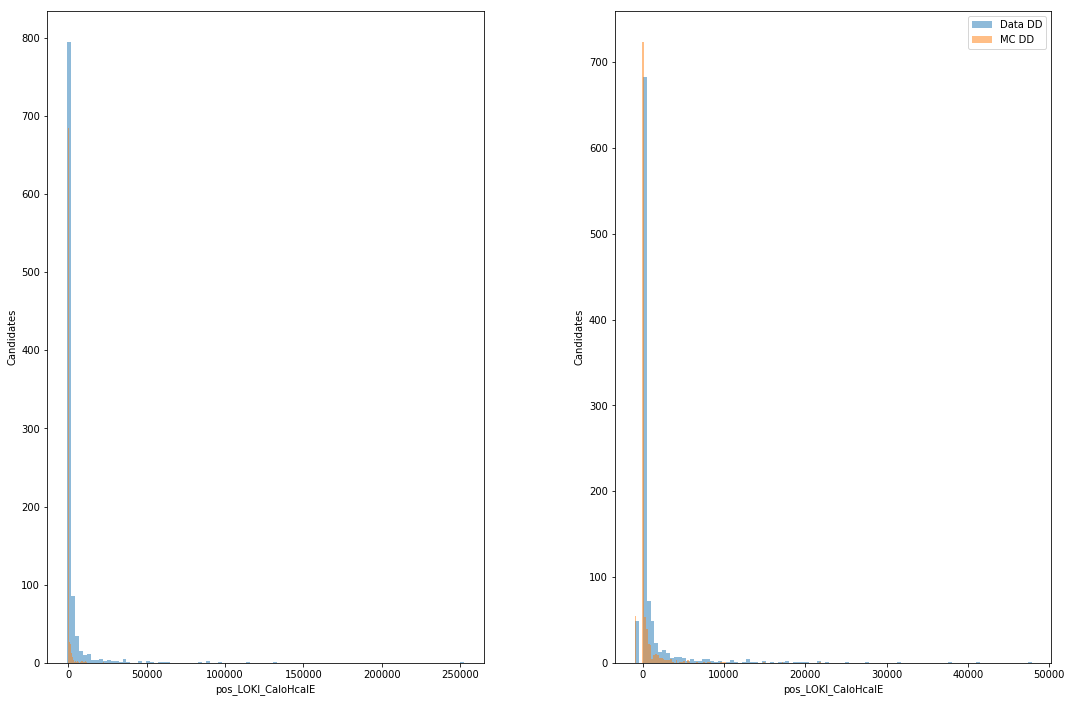

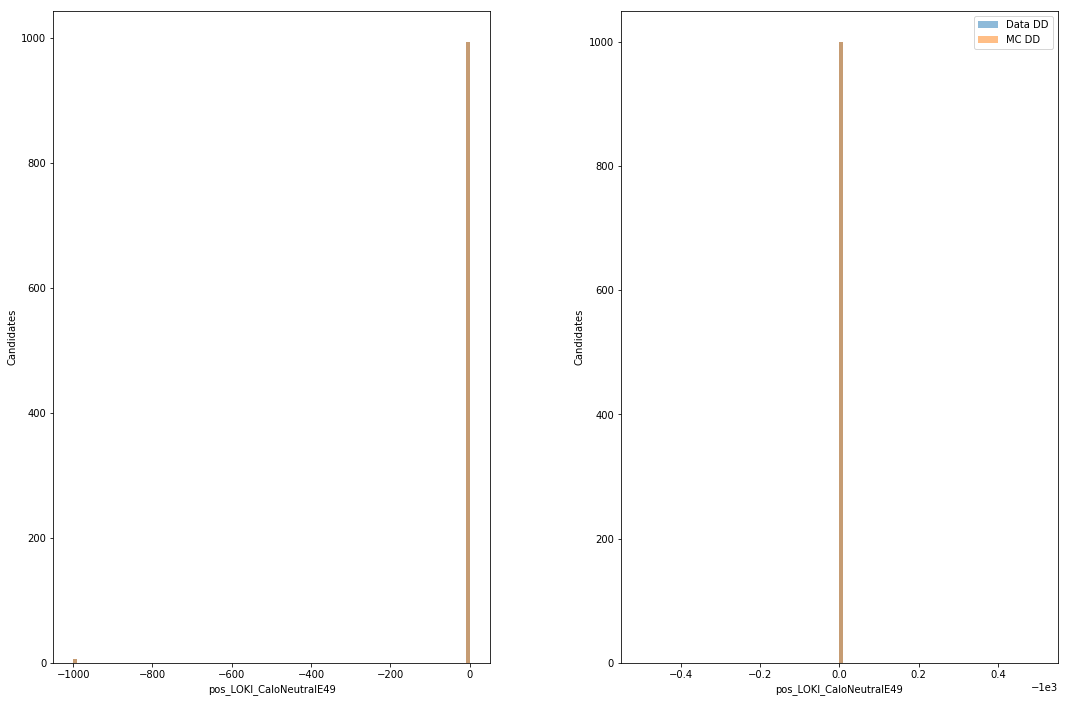

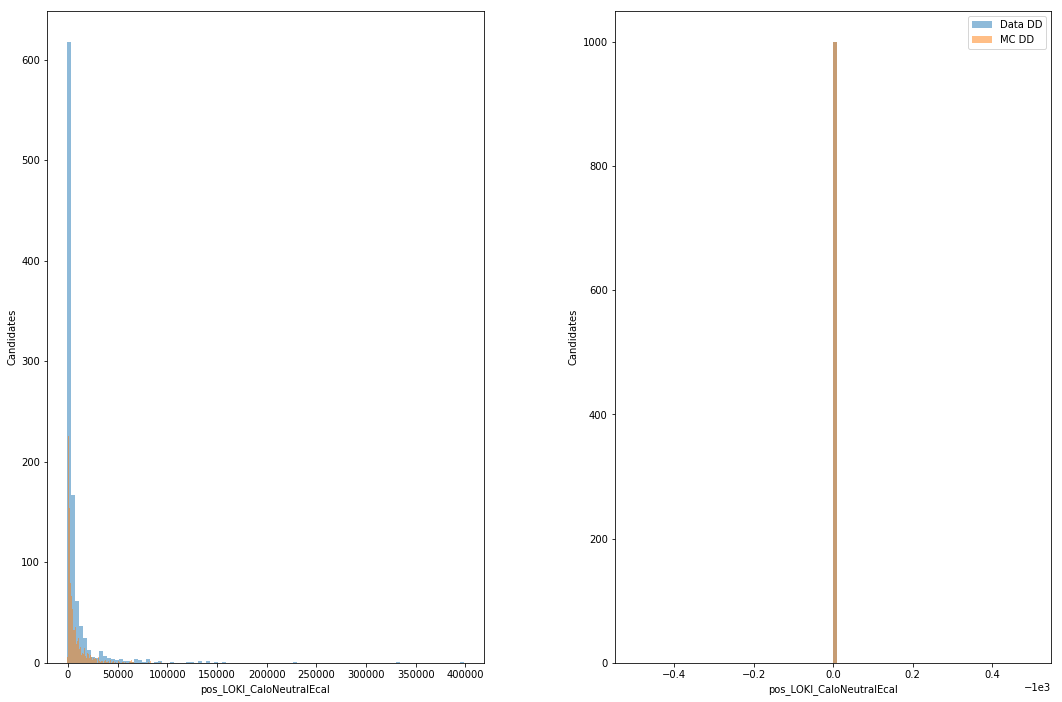

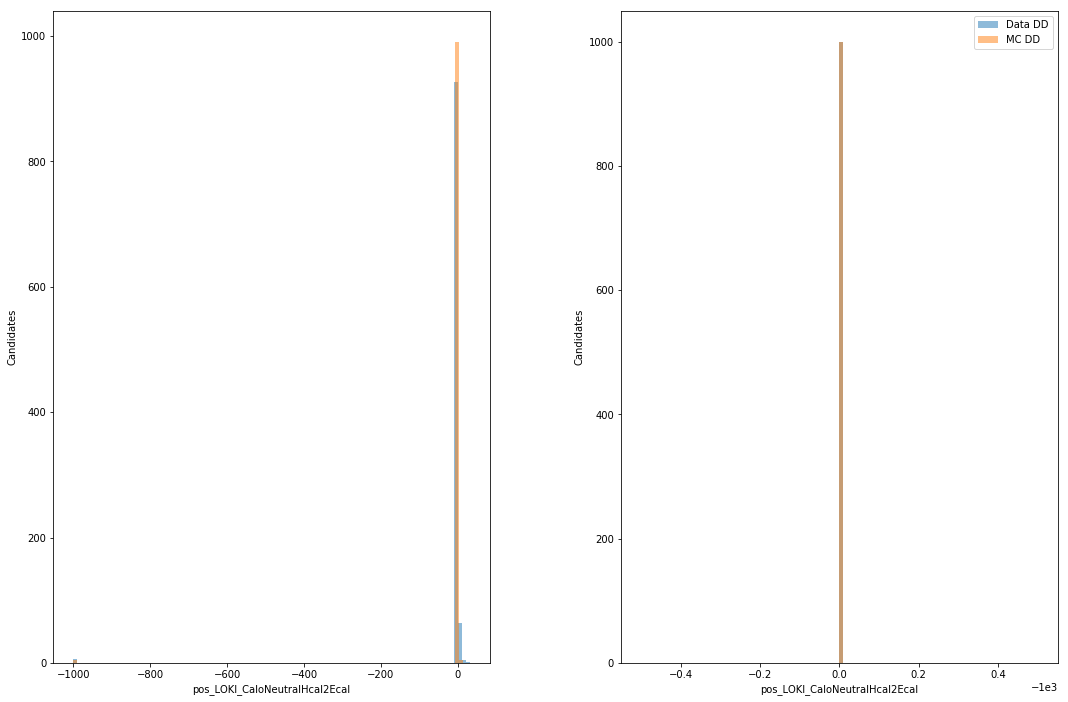

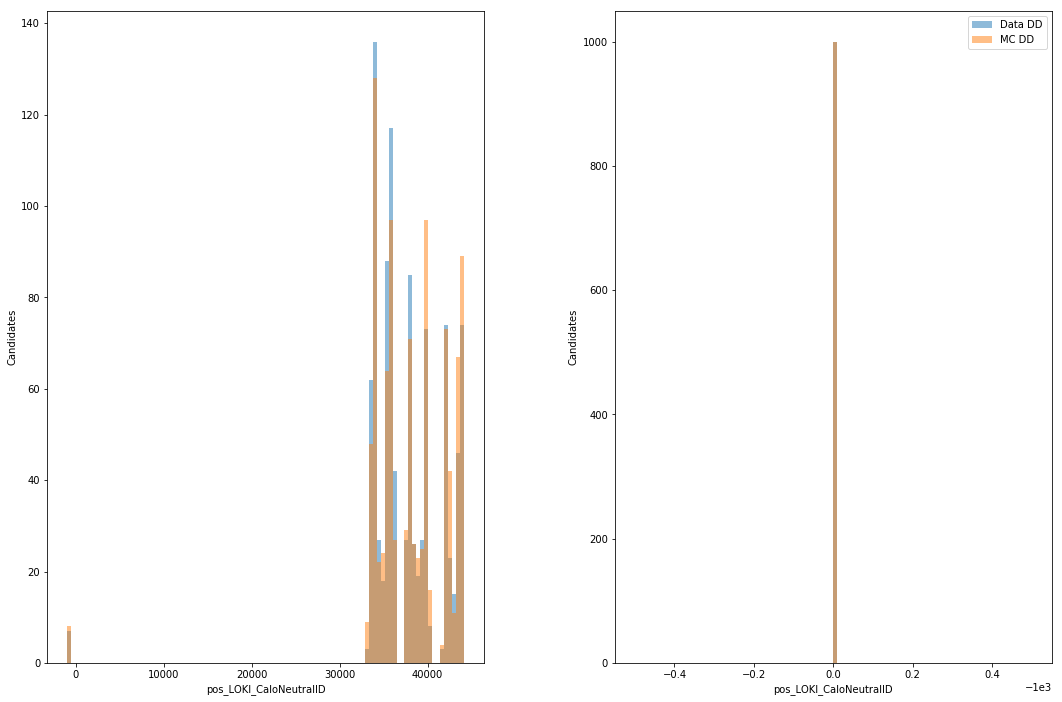

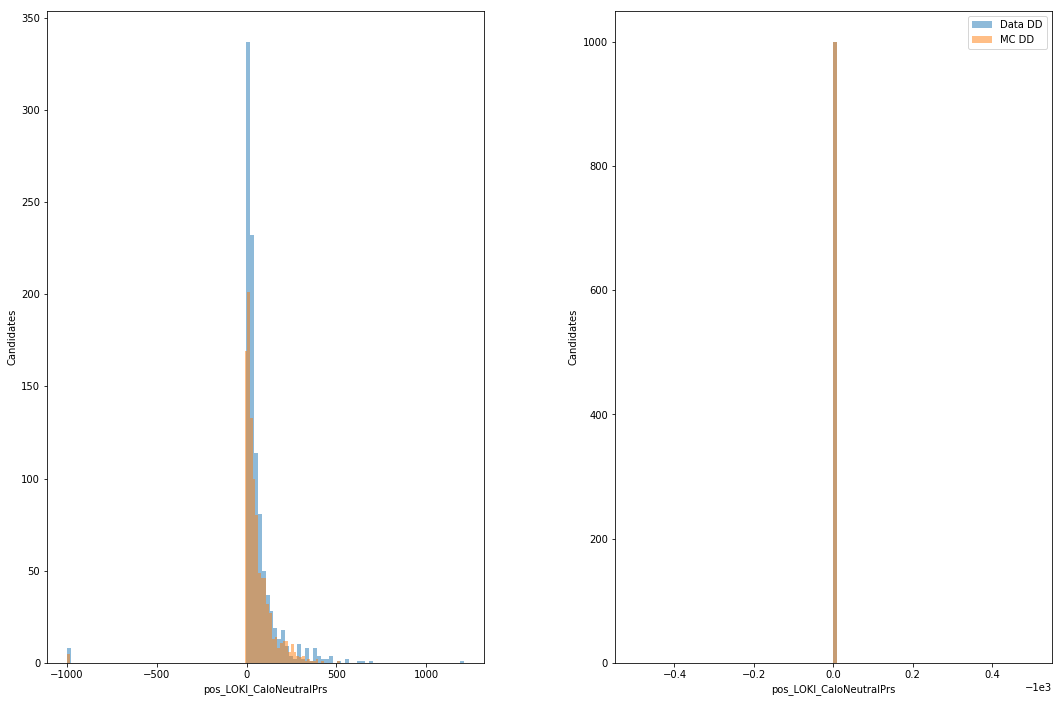

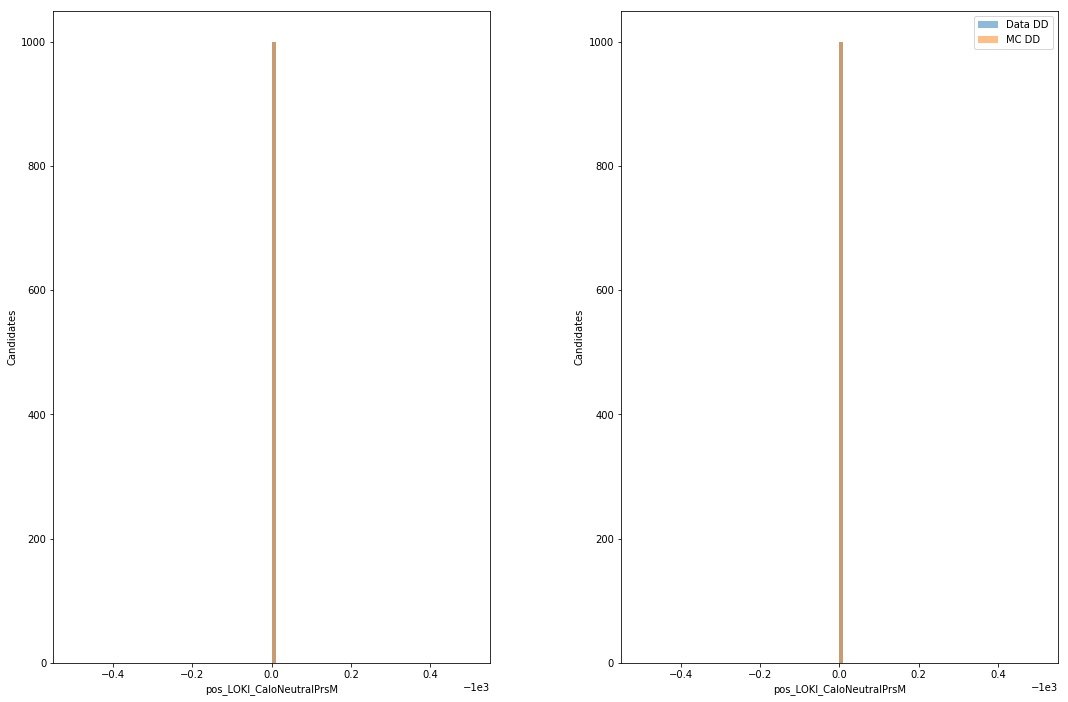

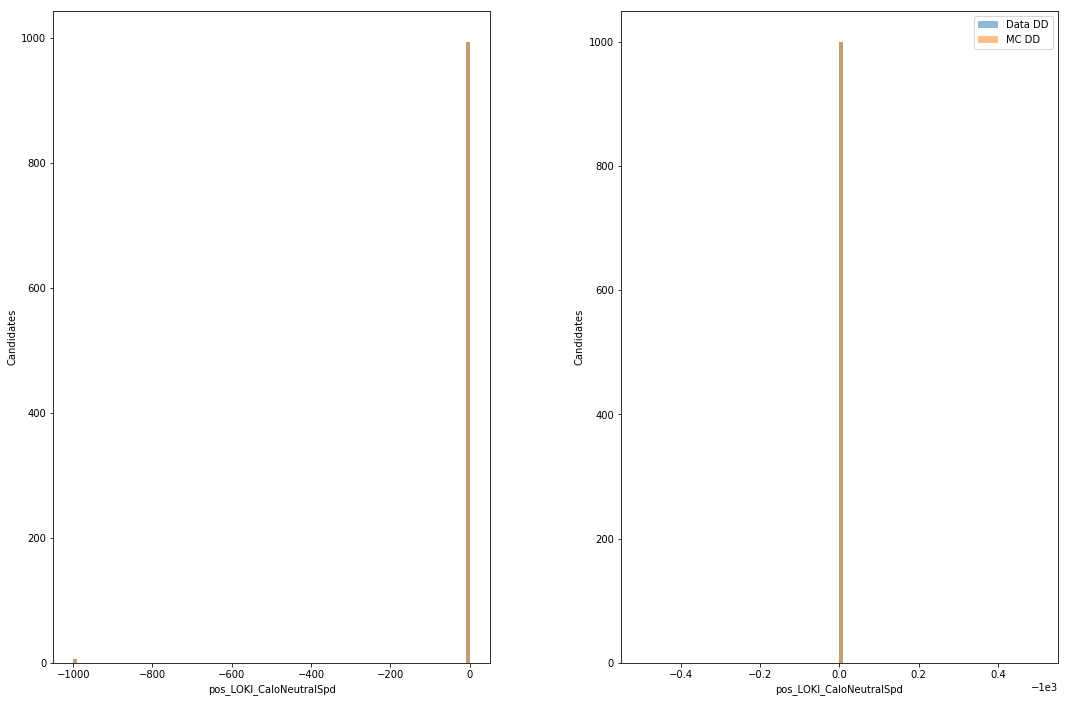

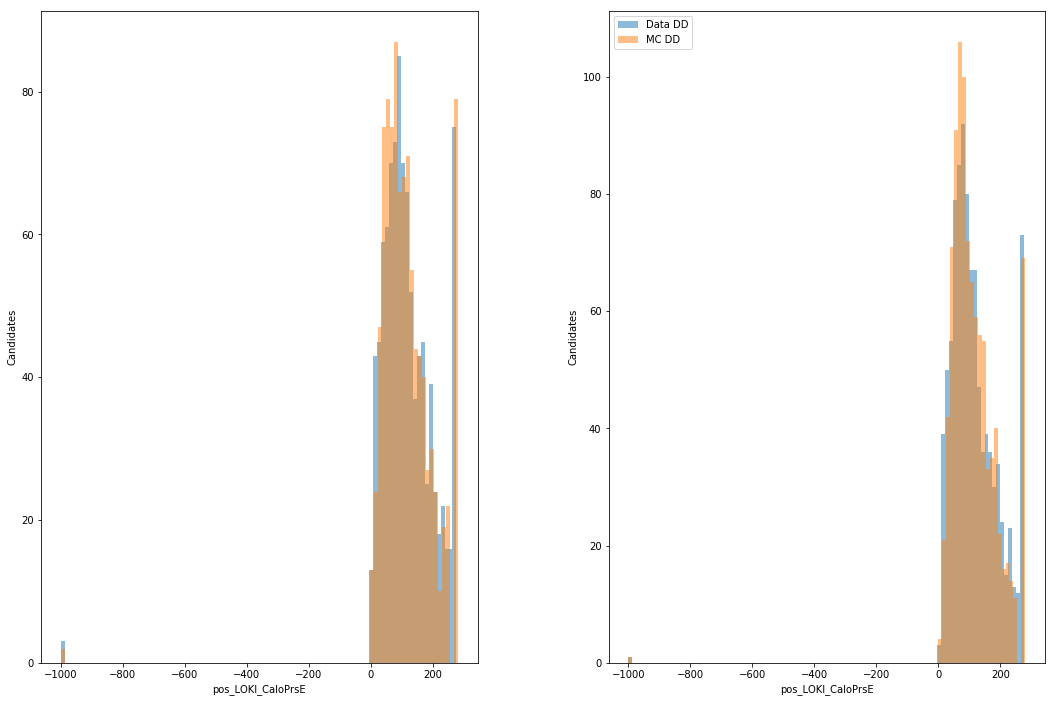

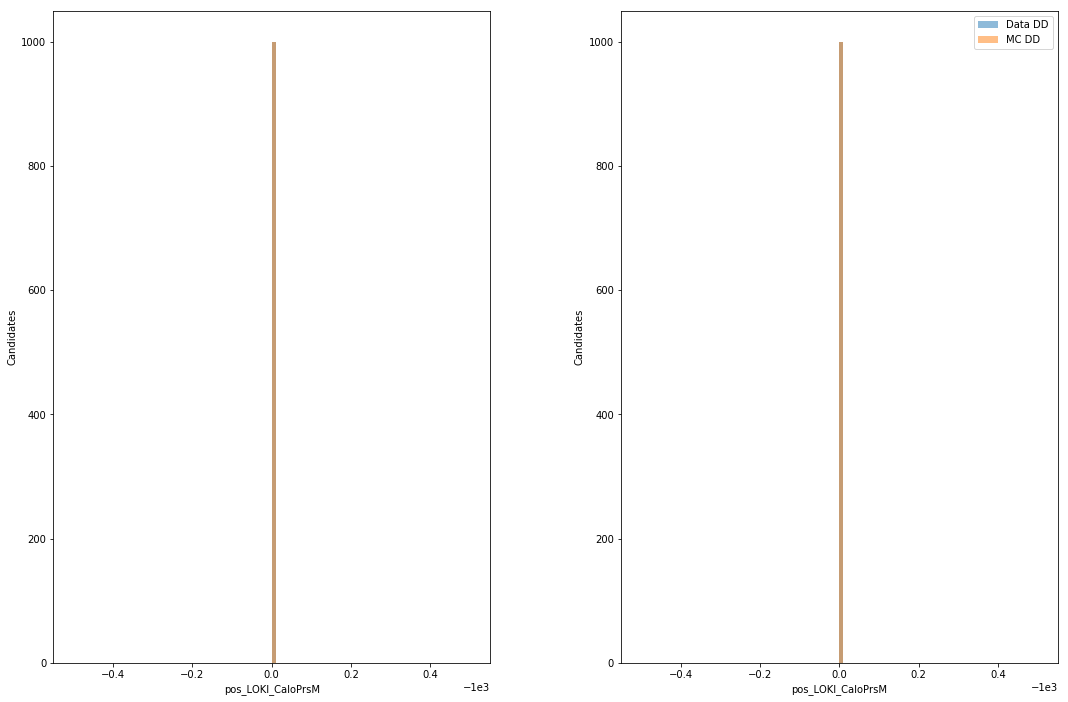

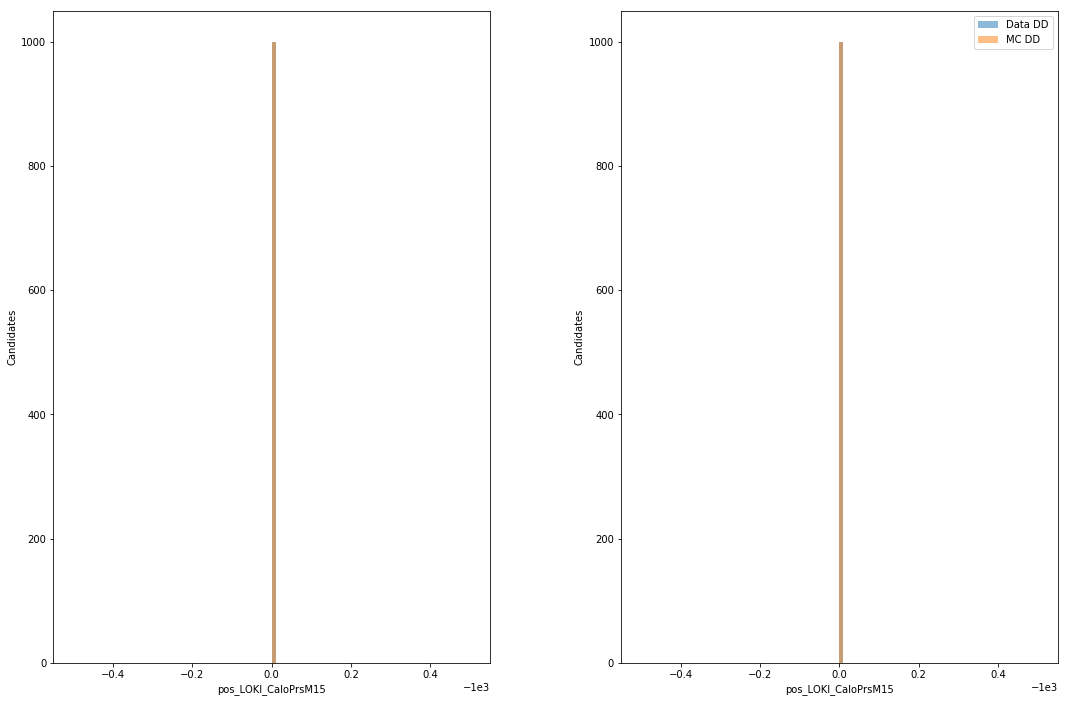

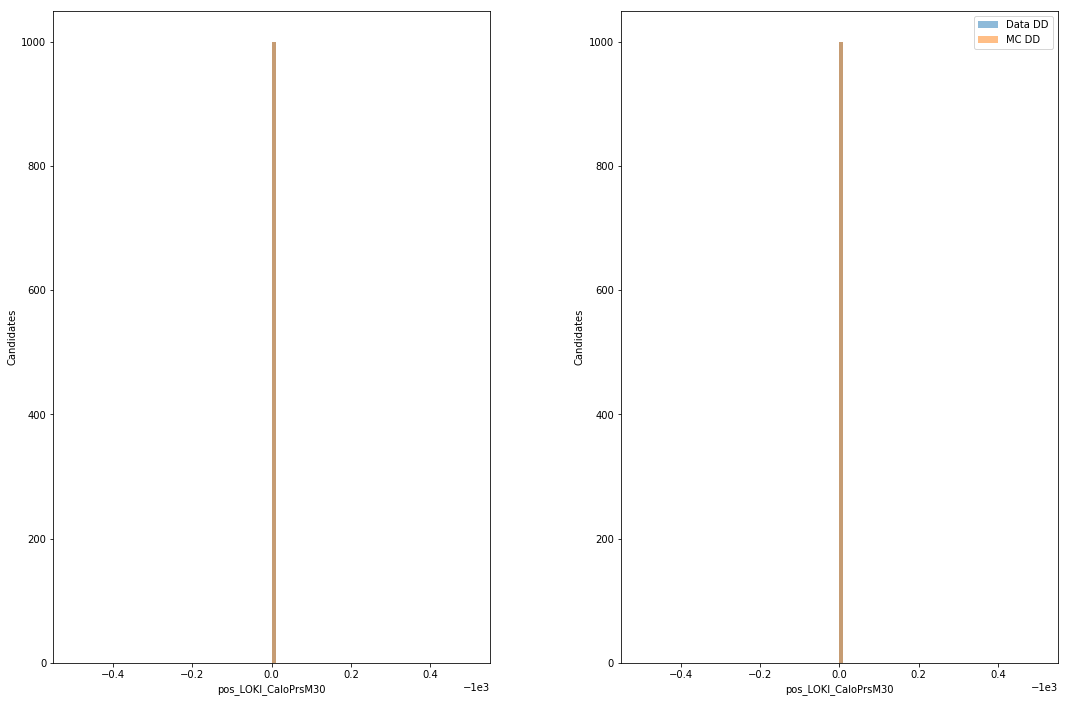

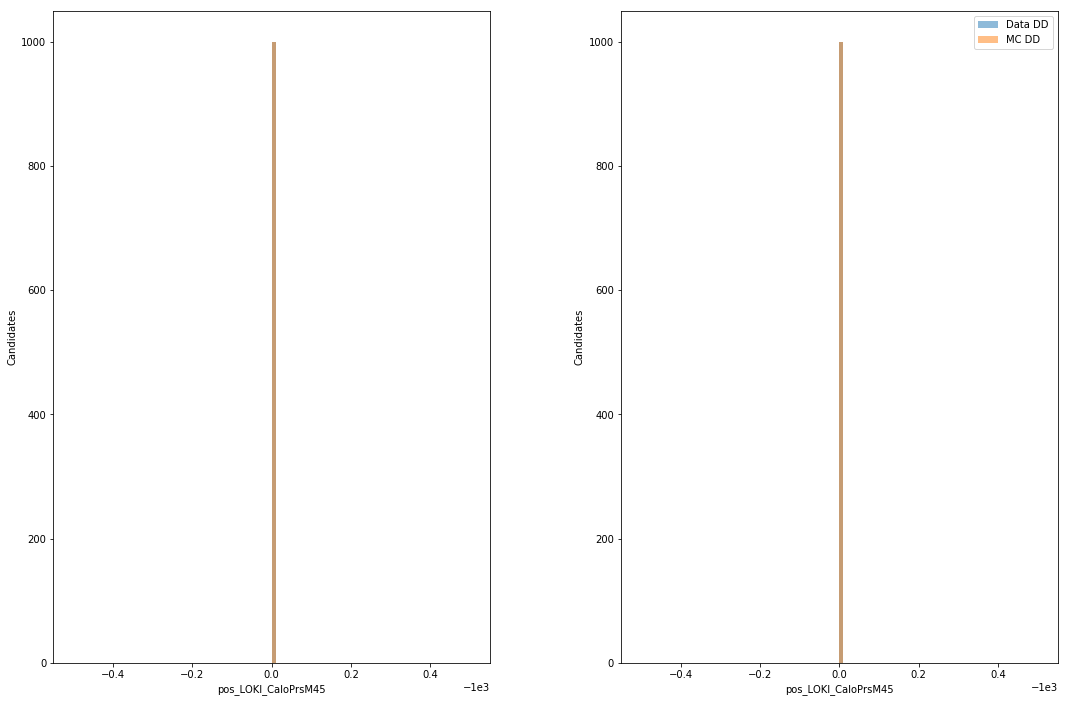

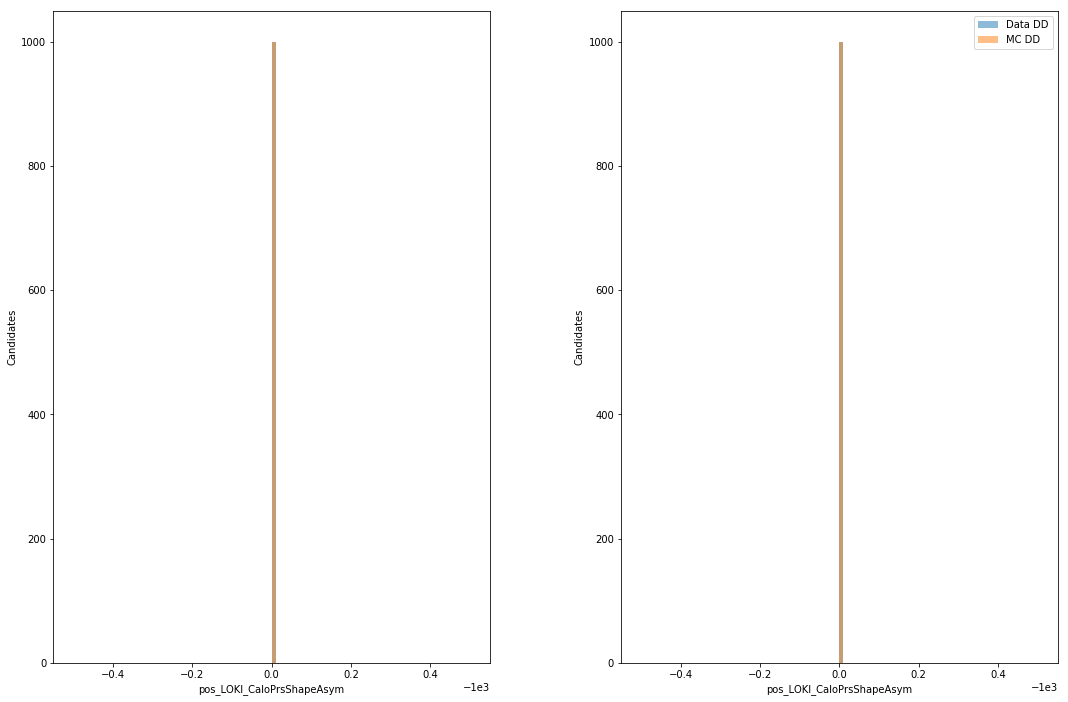

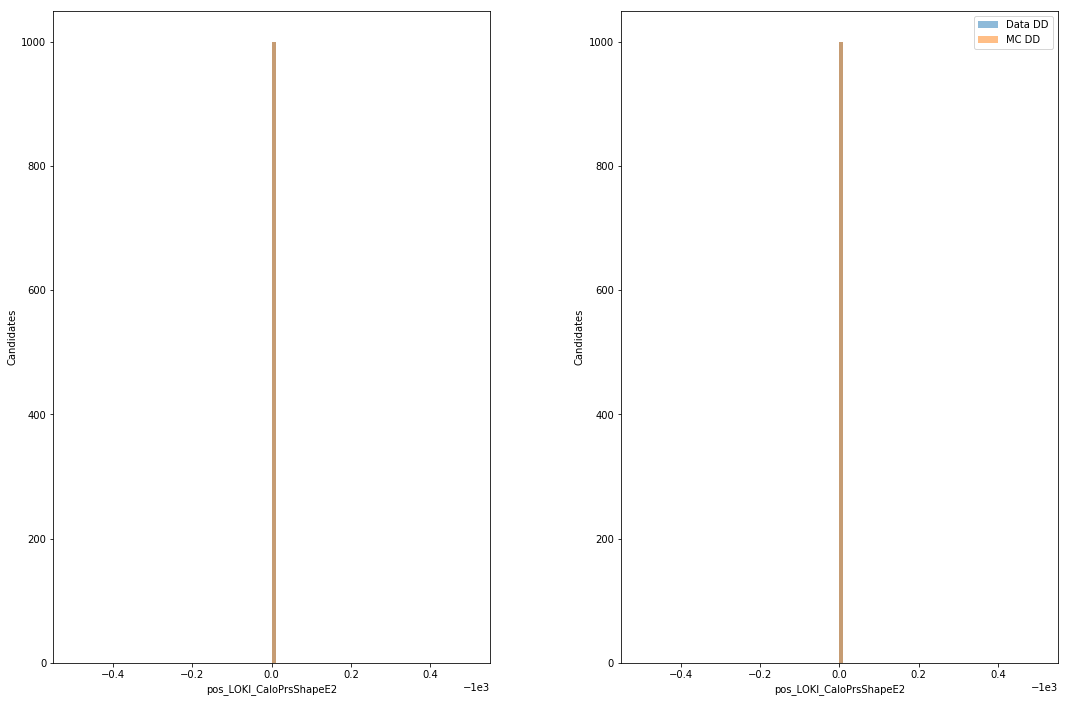

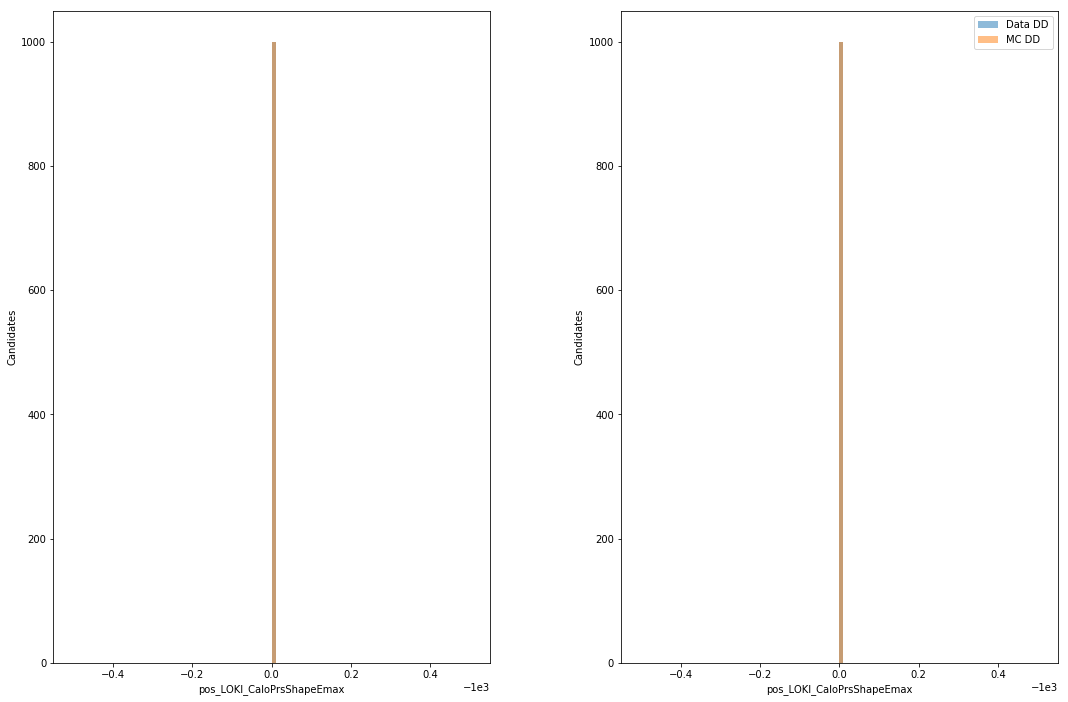

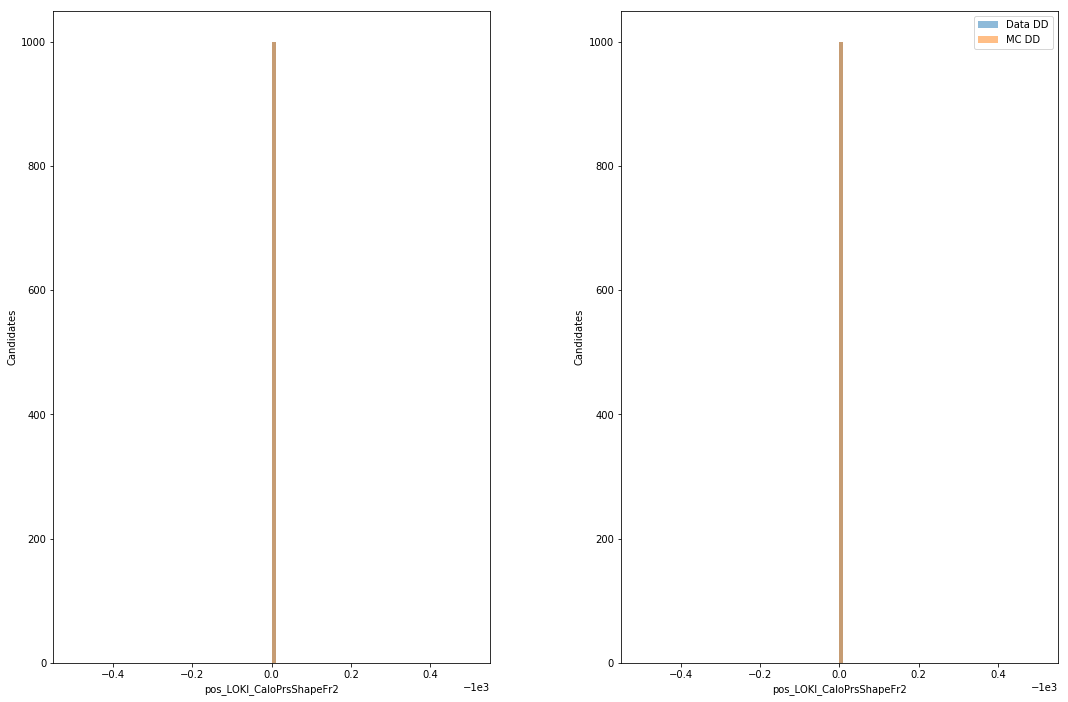

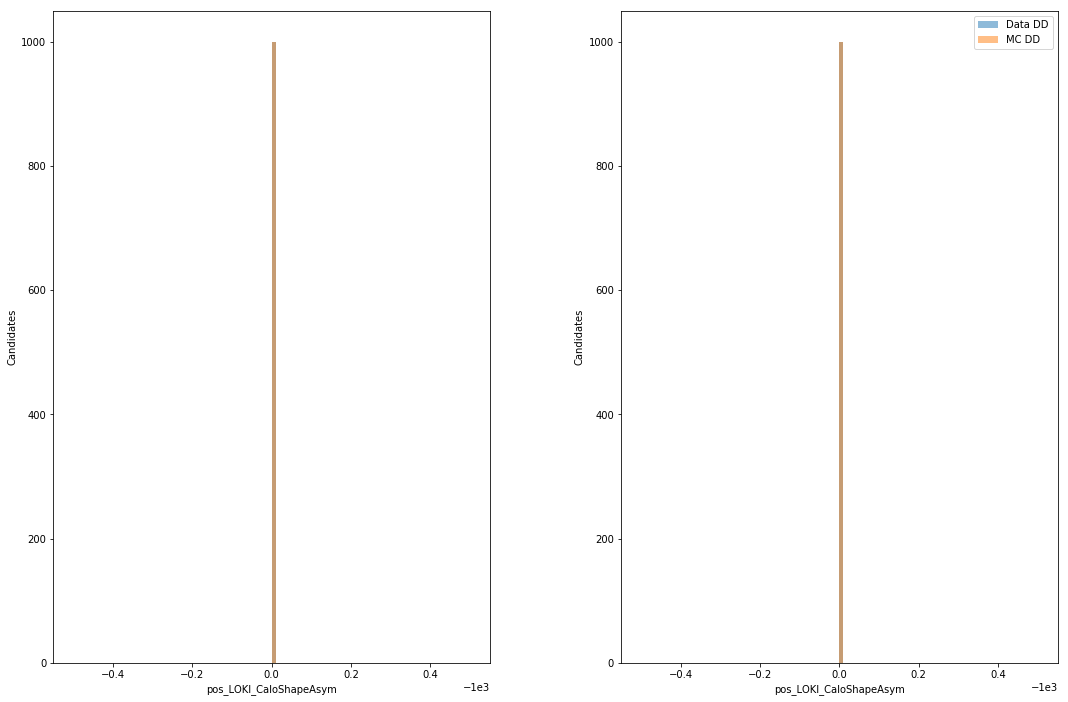

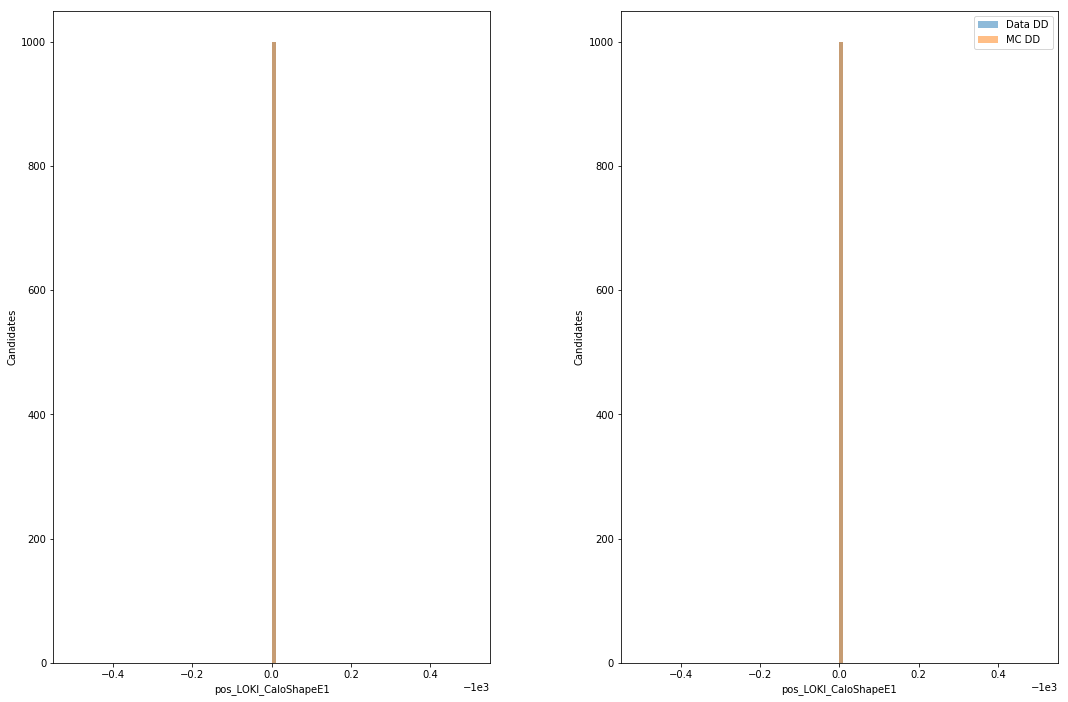

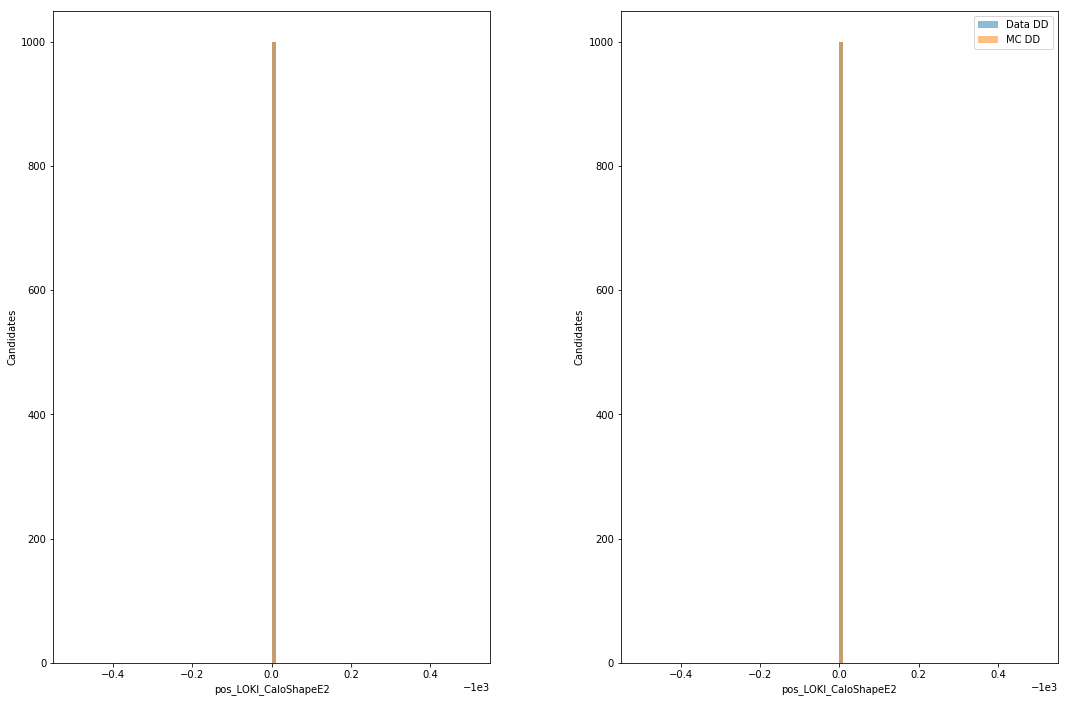

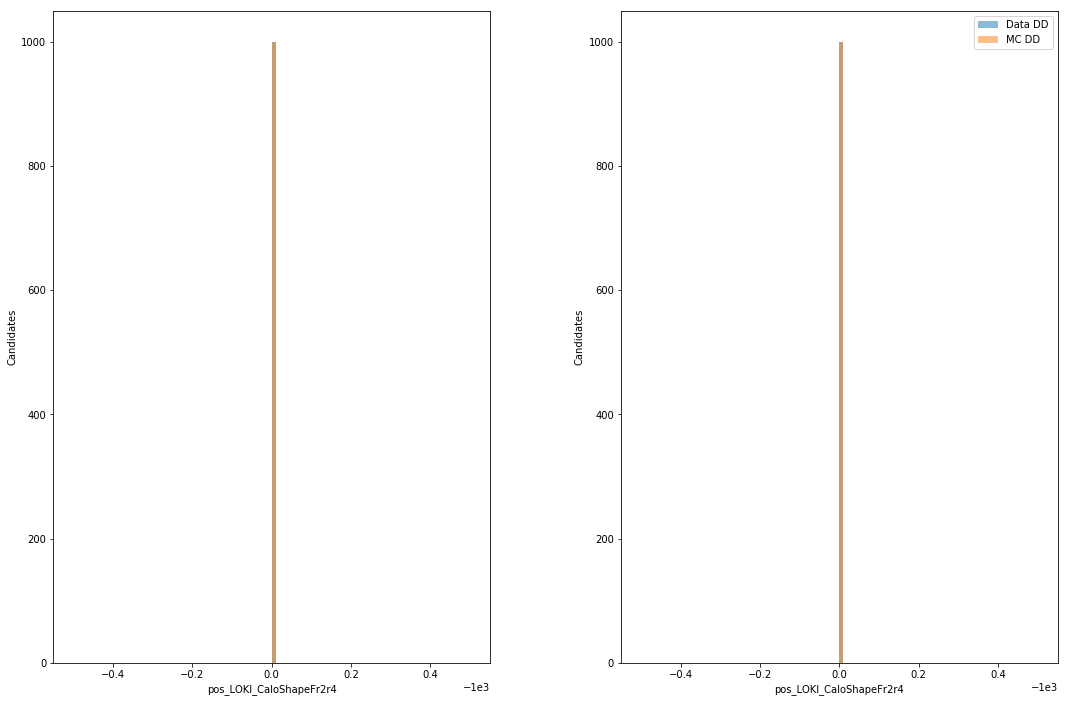

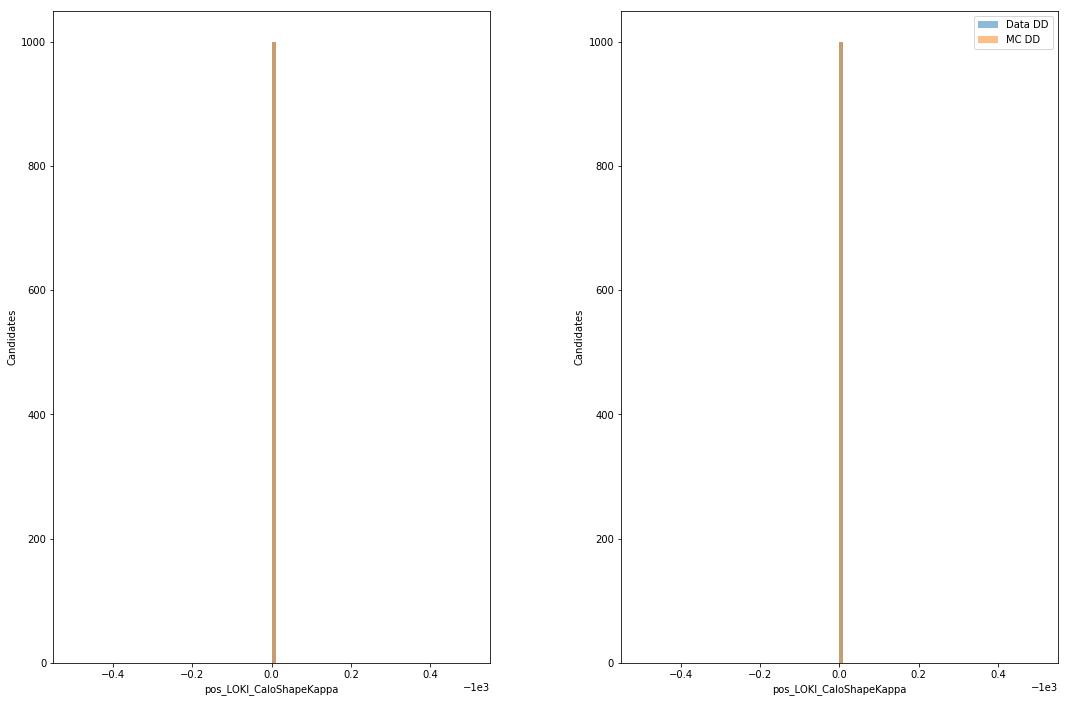

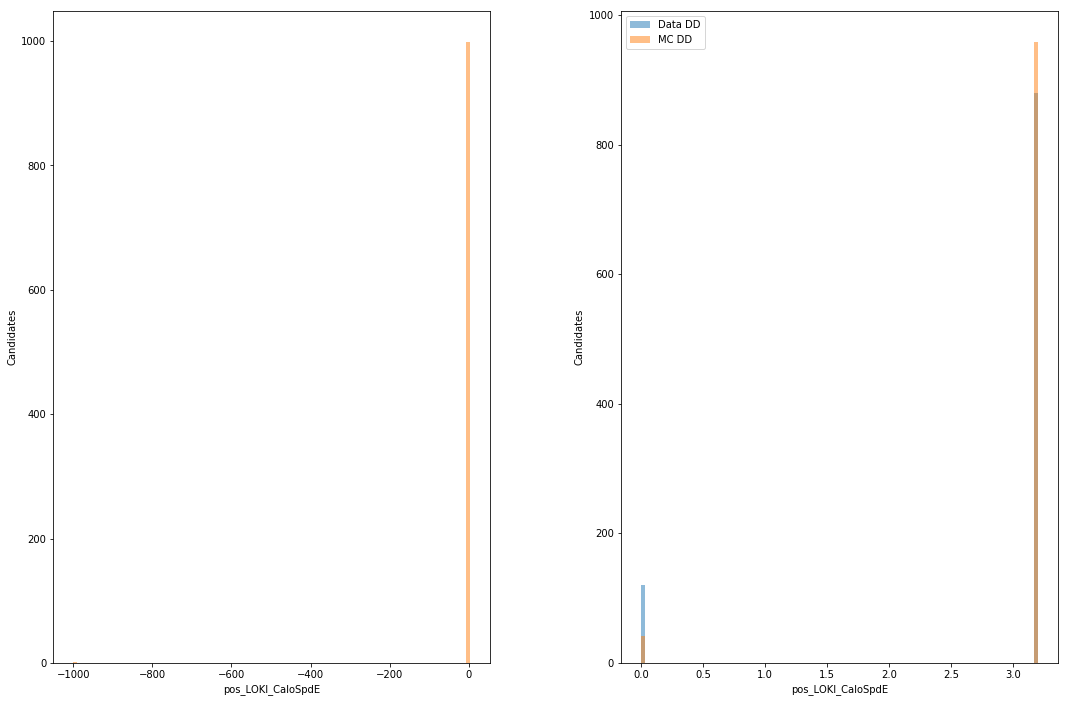

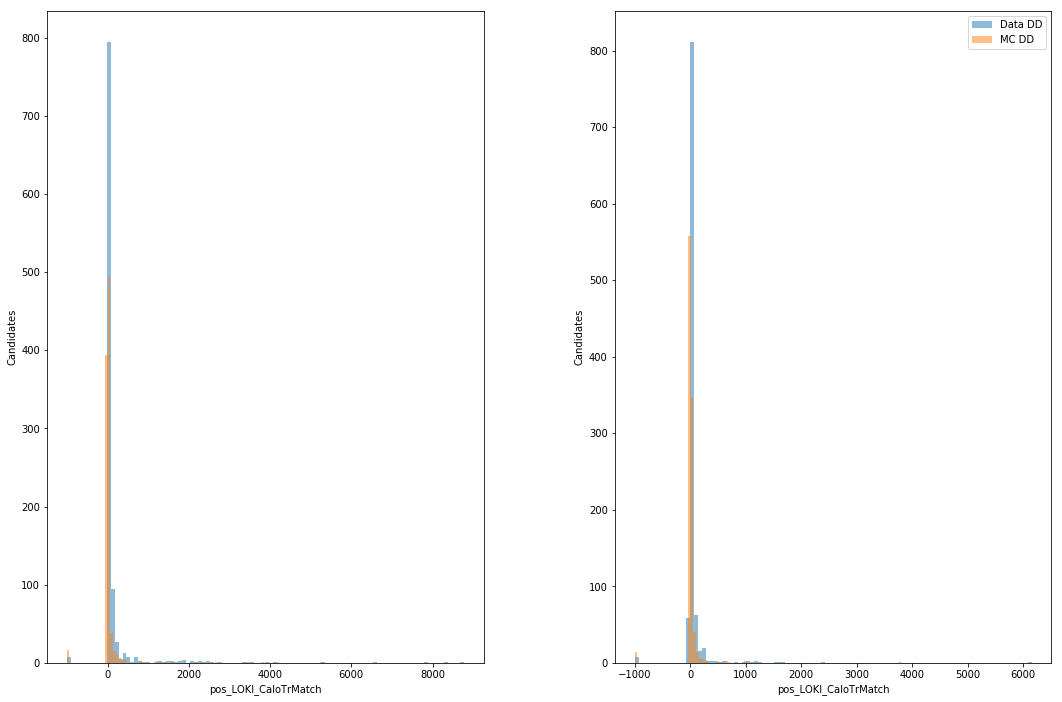

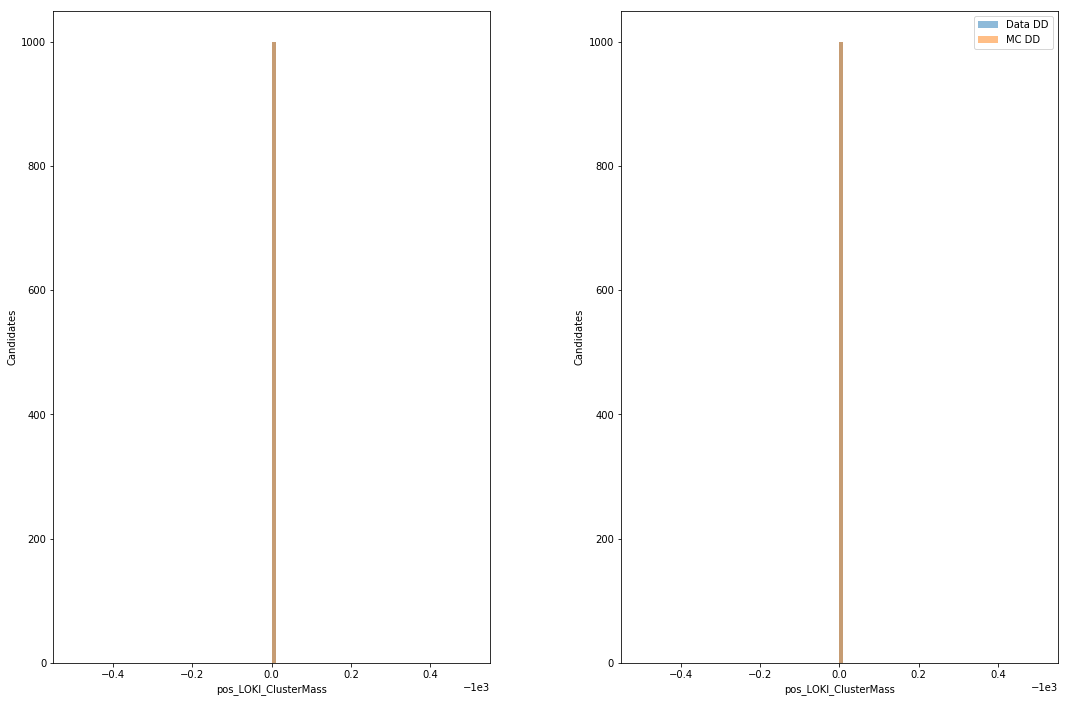

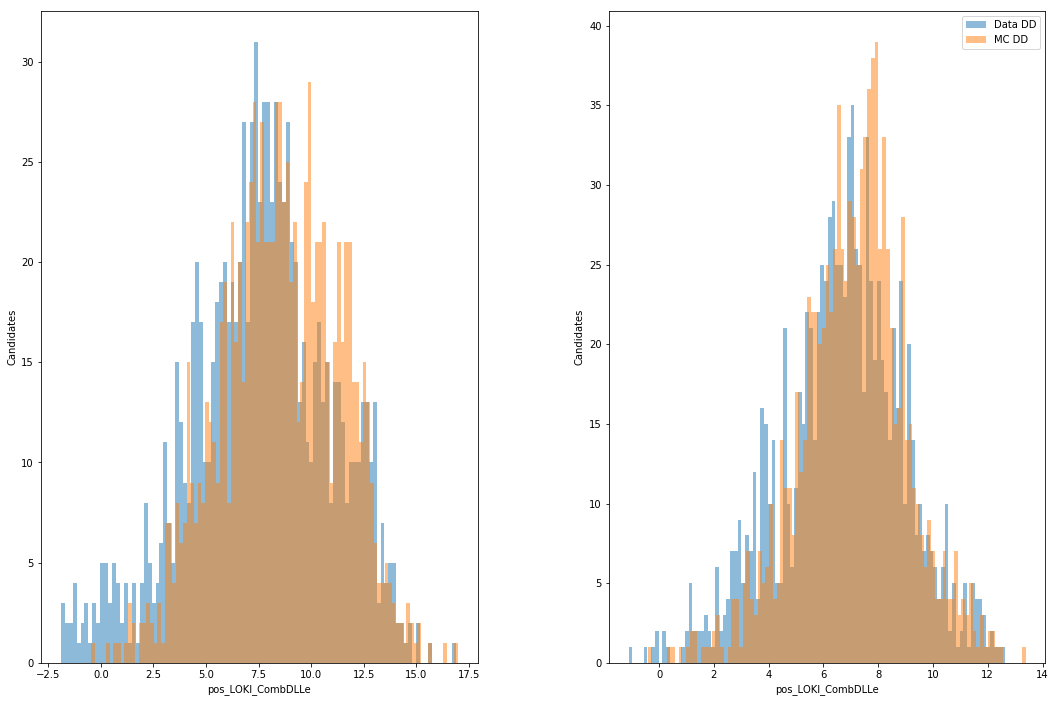

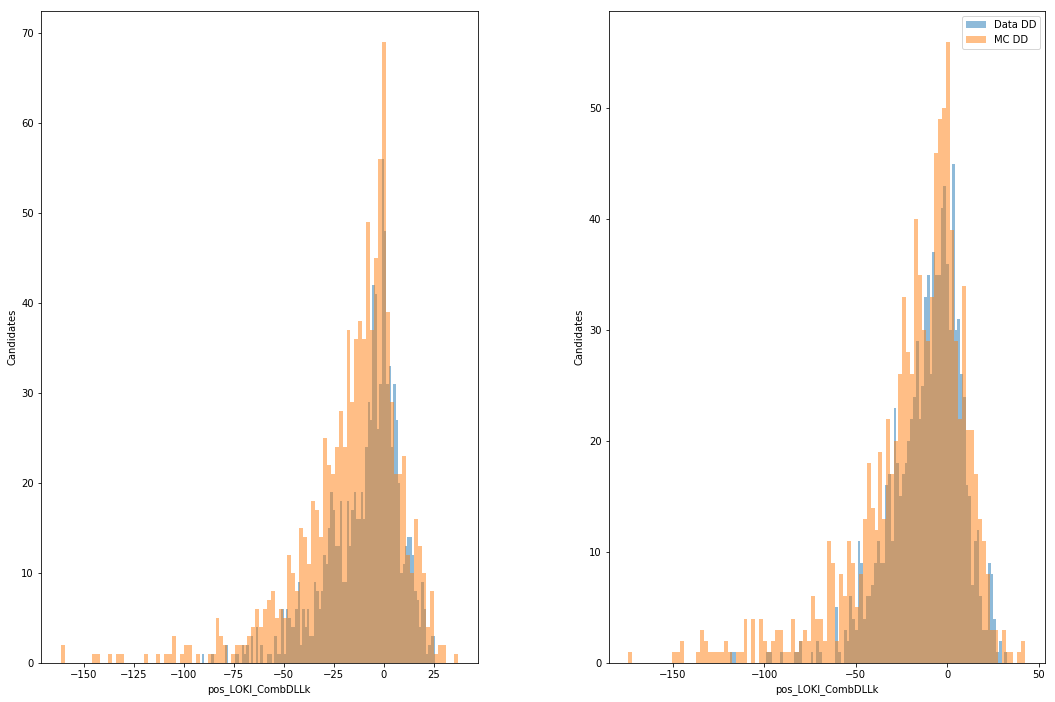

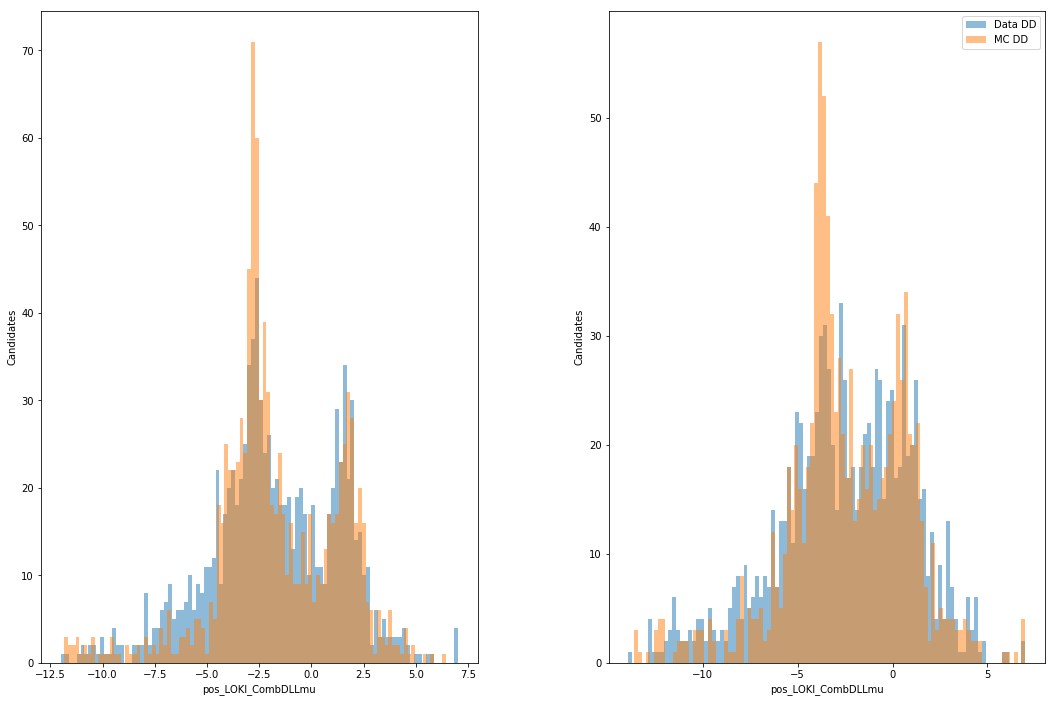

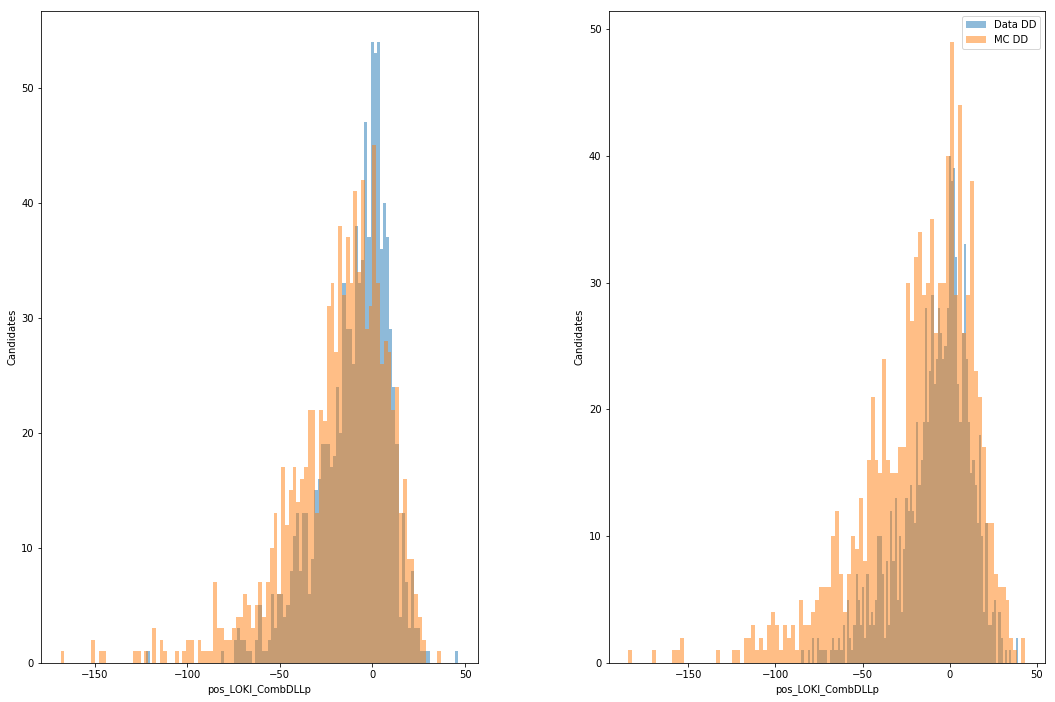

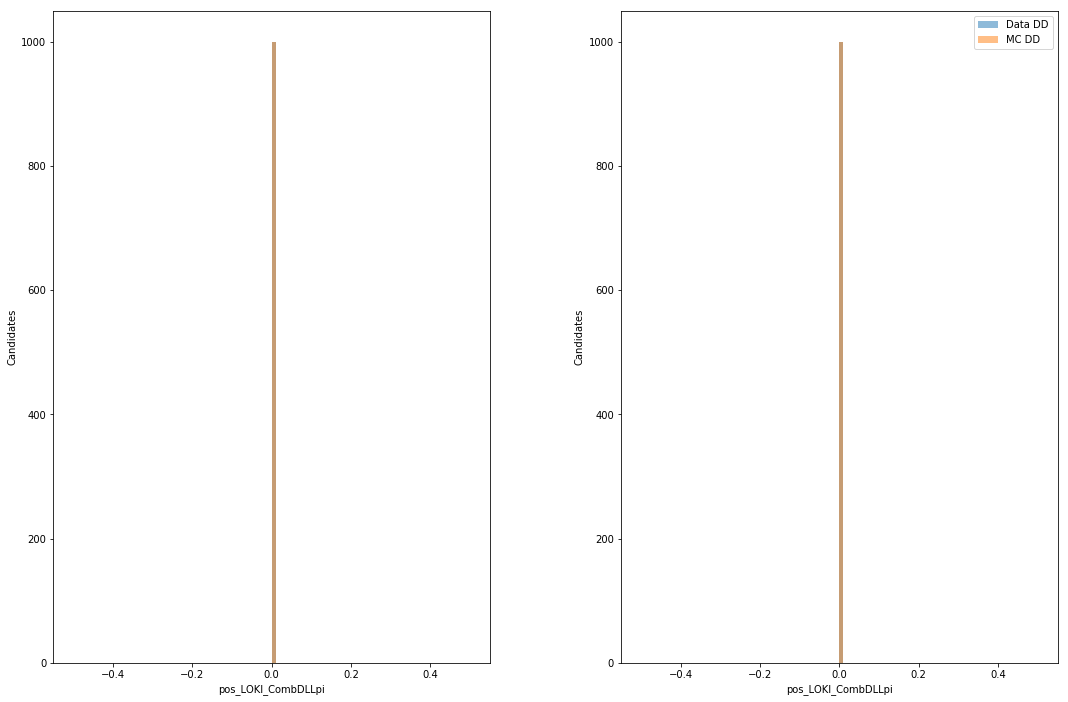

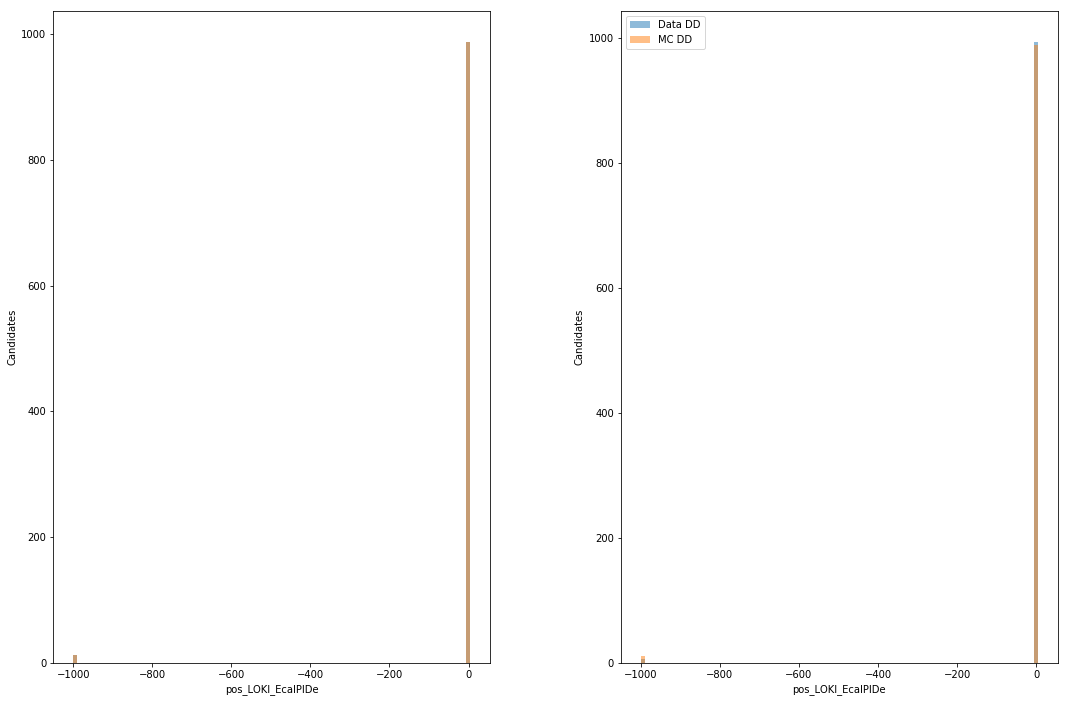

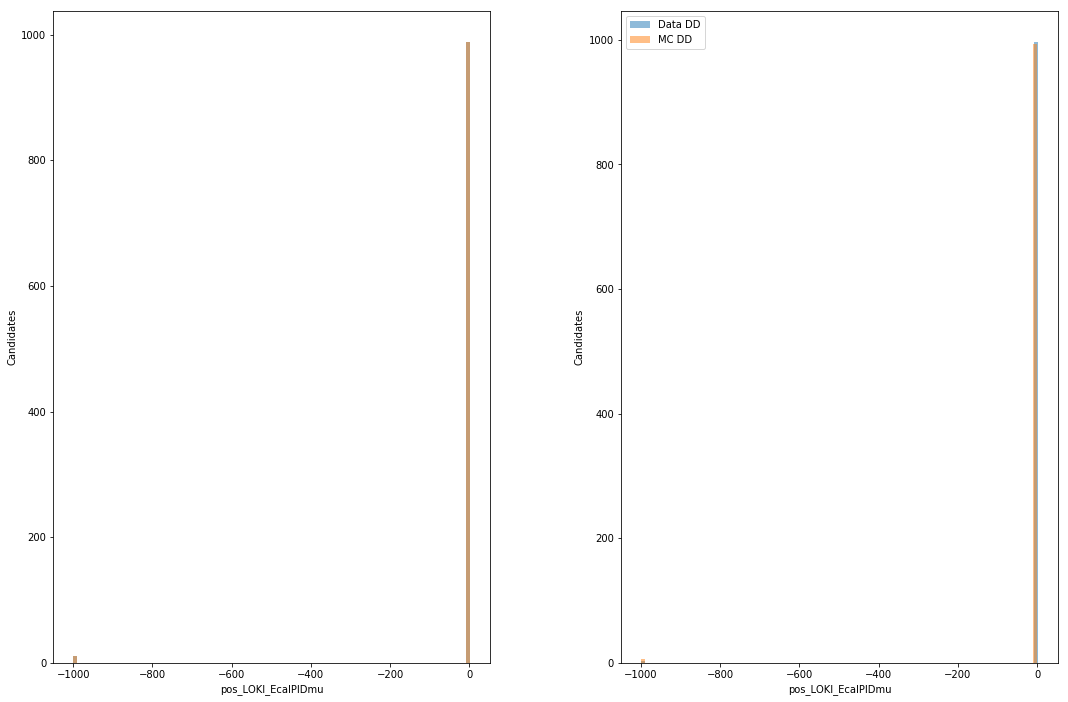

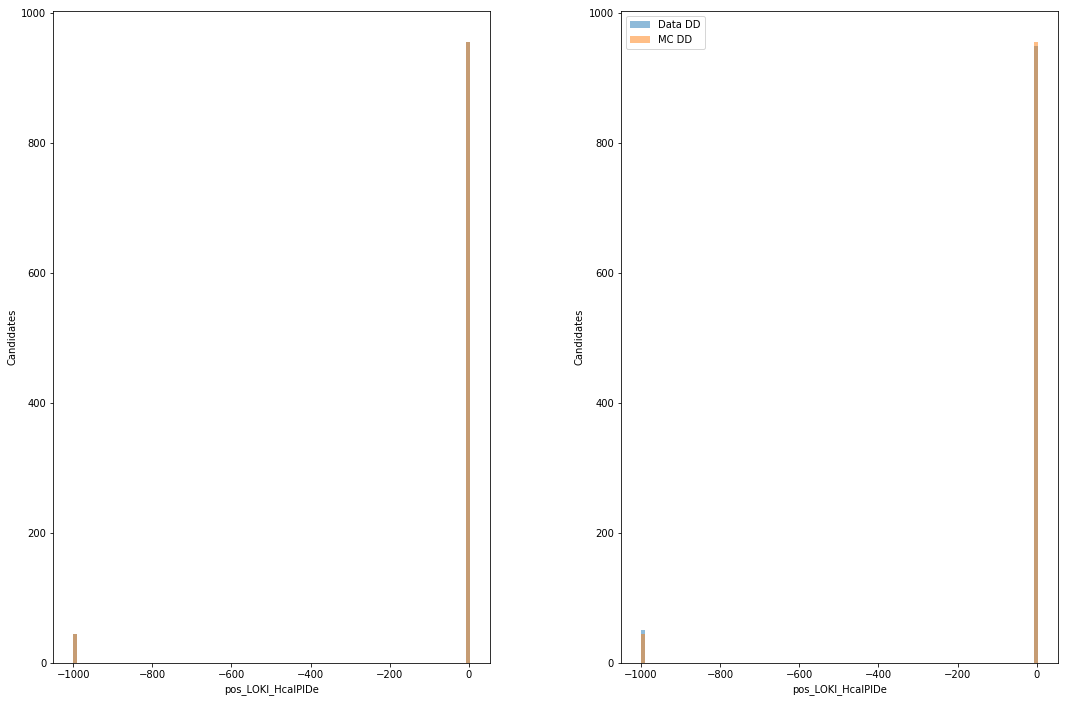

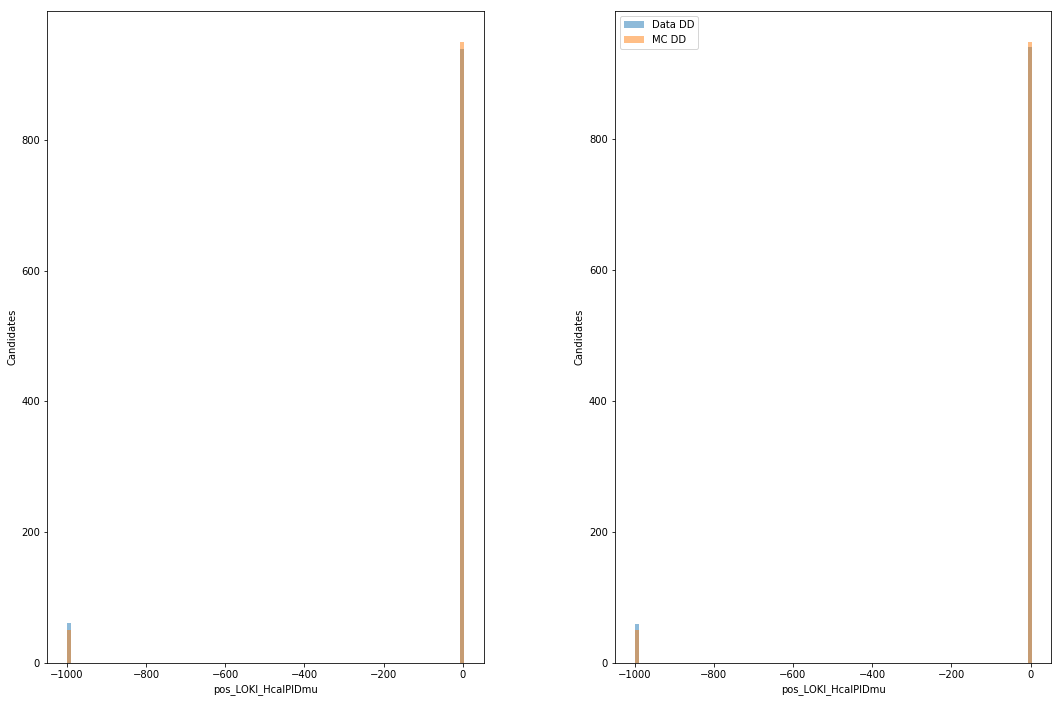

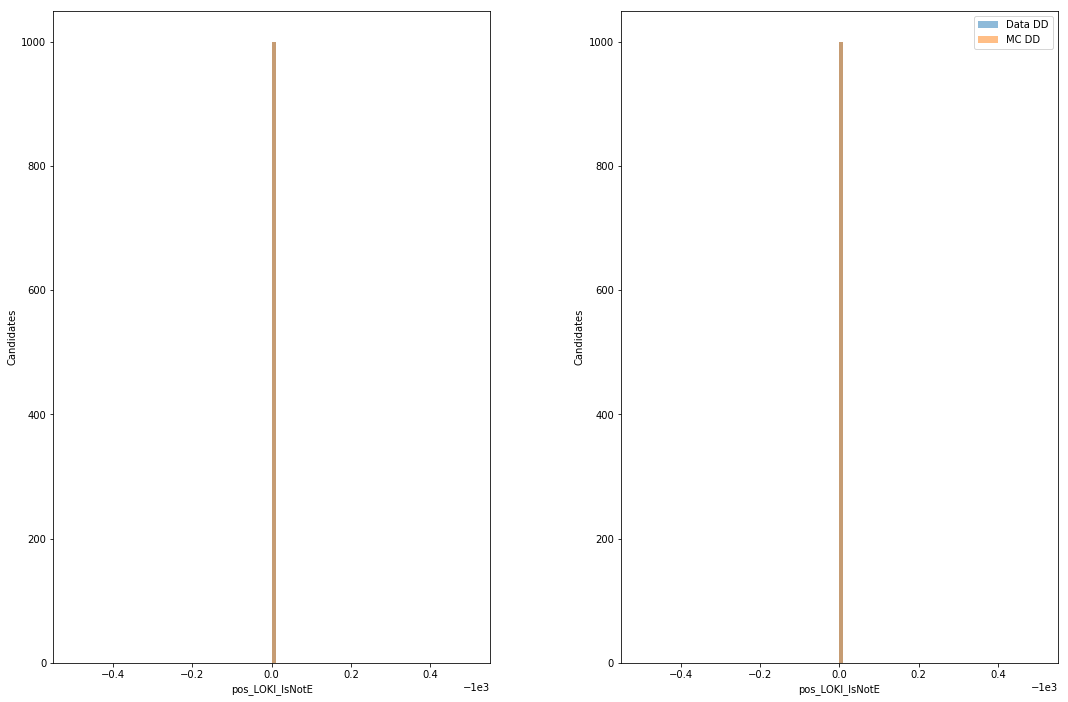

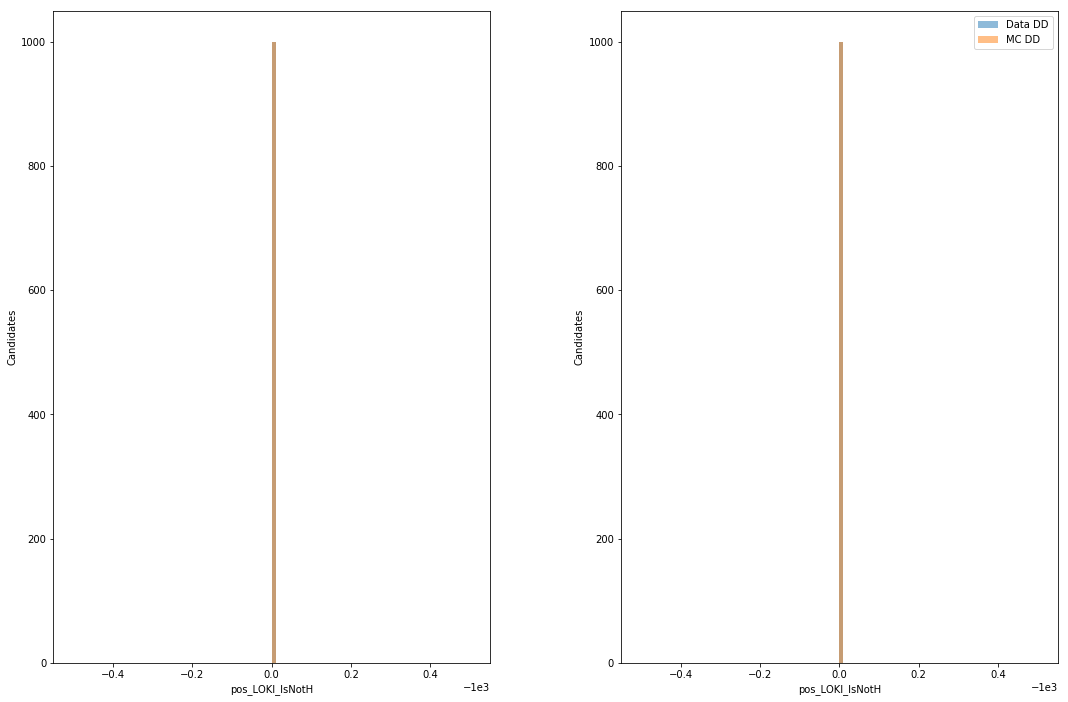

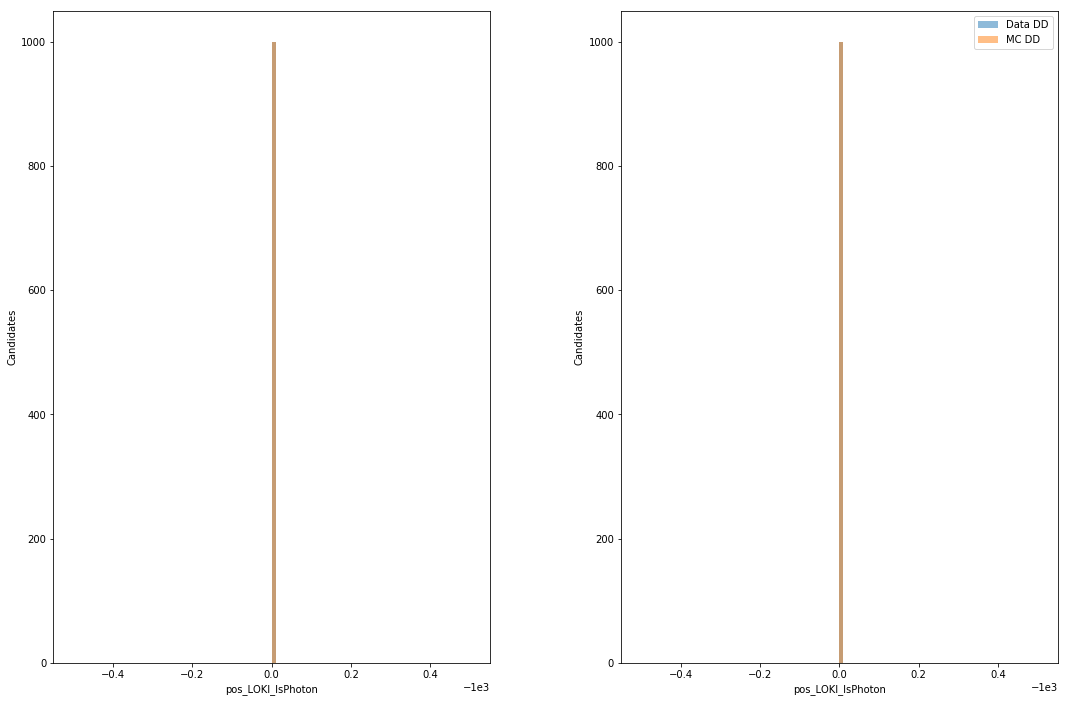

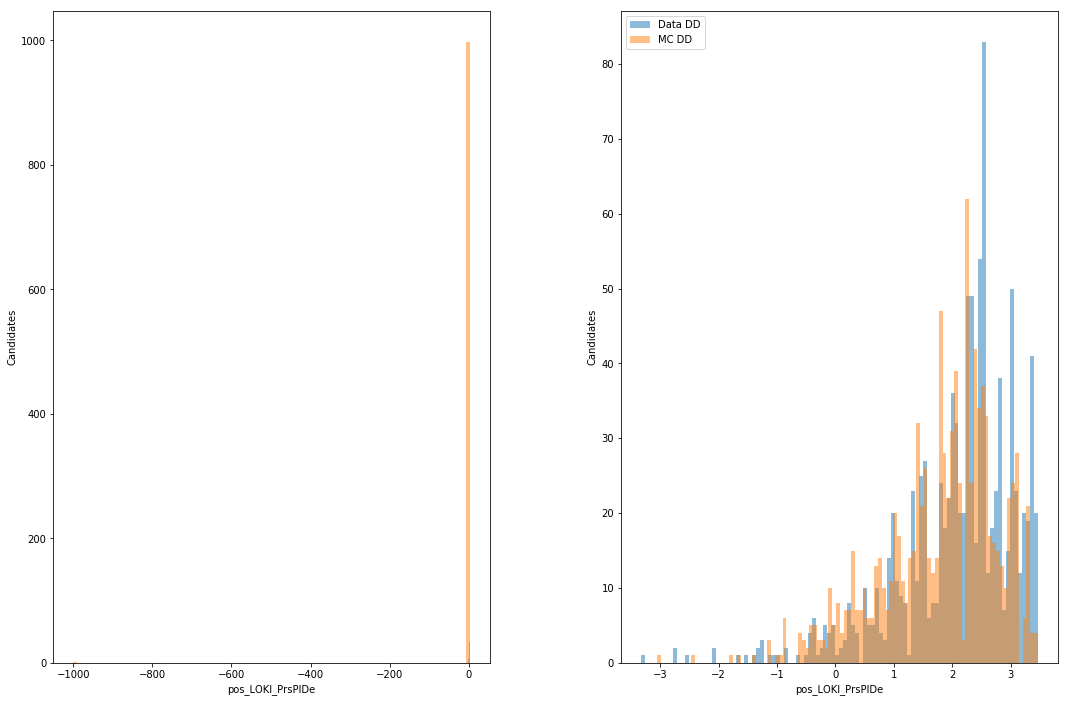

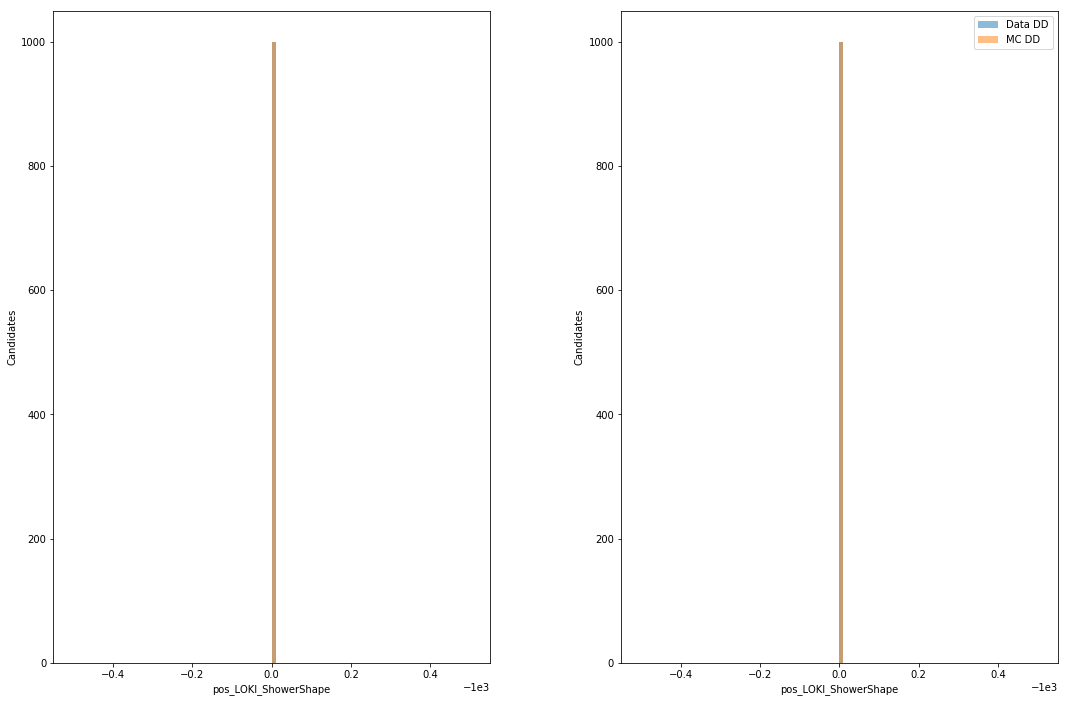

In [25]:
# Plot conv. photon variables
for m in range(len(convVars)):
    fig, axes = plt.subplots(1, 2, figsize=(18, 12))
    for n, t in enumerate(topos):
        if t == "None":
            continue
        vname = convVars[m]
        h_mm_data = dsets[n].sample(n=1000).hist(column=[vname], ax=axes[n], label = "Data %s" % t
                                                   , bins = 100, alpha=0.5)
        h_mm_mc = dsets_mc[n].sample(n=1000).hist(column=[vname], ax=axes[n], label = "MC %s" % t
                                                   , bins = 100, alpha=0.5)
        prepPlot(axes[n], convVars[m], "Candidates")
        plt.legend()
    plt.show()

In [ ]:
# Variables with the most promise:
# LL
varsCaloChosen = ['calog_ShowerShape', 'calog_LOKI_CaloNeutralE49'
         , 'calog_LOKI_CaloNeutralPrsM', 'calog_LOKI_CaloNeutralSpd'
         , 'calog_LOKI_IsPhoton']
varsConvChosen = [
    'photon_conv_PT', 'photon_conv_MMERR'
    , 'photon_conv_LOKI_ENDVERTEX_CHI2DOF', 'pos_LOKI_CaloEcalE'
]
varsConvLLChosen = ['photon_conv_LOKI_BPVIP']